# Project Name: House Prices
#  Regression Techniques

1 import labraries
2.Data Analysis
3.cleaning data
4.basic model building
5.correlation
6.outlier Treatment
7.skewness
5.Feature Selection
6.Model Building


# 1.import labrary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import math


In [2]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

# 2.load the datasets train and test

In [3]:
d_tr=pd.read_csv(r"C:\Users\Shree\Downloads\previously\Property_Price_Train.csv")

In [4]:
d_tr.head()

Id  Building_Class Zoning_Class  Lot_Extent  Lot_Size Road_Type Lane_Type  \
0   1              60          RLD        65.0      8450     Paved       NaN   
1   2              20          RLD        80.0      9600     Paved       NaN   
2   3              60          RLD        68.0     11250     Paved       NaN   
3   4              70          RLD        60.0      9550     Paved       NaN   
4   5              60          RLD        84.0     14260     Paved       NaN   

  Property_Shape Land_Outline Utility_Type Lot_Configuration Property_Slope  \
0            Reg          Lvl       AllPub                 I             GS   
1            Reg          Lvl       AllPub              FR2P             GS   
2            IR1          Lvl       AllPub                 I             GS   
3            IR1          Lvl       AllPub                 C             GS   
4            IR1          Lvl       AllPub              FR2P             GS   

  Neighborhood Condition1 Condition2 House_Type House_Design  \
0      CollgCr       Norm       Norm       1Fam       2Story   
1      Veenker      Feedr       Norm       1Fam       1Story   
2      CollgCr       Norm       Norm       1Fam       2Story   
3      Crawfor       Norm       Norm       1Fam       2Story   
4      NoRidge       Norm       Norm       1Fam       2Story   

   Overall_Material  House_Condition  Construction_Year  Remodel_Year  \
0                 7                5               2003          2003   
1                 6                8               1976          1976   
2                 7                5               2001          2002   
3                 7                5               1915          1970   
4                 8                5               2000          2000   

  Roof_Design Roof_Quality Exterior1st Exterior2nd Brick_Veneer_Type  \
0       Gable           SS     VinylSd     VinylSd           BrkFace   
1       Gable           SS     MetalSd     MetalSd              None   
2       Gable           SS     VinylSd     VinylSd           BrkFace   
3       Gable           SS     Wd Sdng     Wd Shng              None   
4       Gable           SS     VinylSd     VinylSd           BrkFace   

   Brick_Veneer_Area Exterior_Material Exterior_Condition Foundation_Type  \
0              196.0                Gd                 TA              PC   
1                0.0                TA                 TA              CB   
2              162.0                Gd                 TA              PC   
3                0.0                TA                 TA              BT   
4              350.0                Gd                 TA              PC   

  Basement_Height Basement_Condition Exposure_Level BsmtFinType1  BsmtFinSF1  \
0              Gd                 TA             No          GLQ         706   
1              Gd                 TA             Gd          ALQ         978   
2              Gd                 TA             Mn          GLQ         486   
3              TA                 Gd             No          ALQ         216   
4              Gd                 TA             Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  Total_Basement_Area Heating_Type  \
0          Unf           0        150                  856         GasA   
1          Unf           0        284                 1262         GasA   
2          Unf           0        434                  920         GasA   
3          Unf           0        540                  756         GasA   
4          Unf           0        490                 1145         GasA   

  Heating_Quality Air_Conditioning Electrical_System  First_Floor_Area  \
0              Ex                Y             SBrkr               856   
1              Ex                Y             SBrkr              1262   
2              Ex                Y             SBrkr               920   
3              Gd                Y             SBrkr               961   
4              Ex        

In [5]:
d_tr.tail()

Id  Building_Class Zoning_Class  Lot_Extent  Lot_Size Road_Type  \
1454  1455              20          FVR        62.0      7500     Paved   
1455  1456              60          RLD        62.0      7917     Paved   
1456  1457              20          RLD        85.0     13175     Paved   
1457  1458              70          RLD        66.0      9042     Paved   
1458  1459              20          RLD        68.0      9717     Paved   

     Lane_Type Property_Shape Land_Outline Utility_Type Lot_Configuration  \
1454     Paved            Reg          Lvl       AllPub                 I   
1455       NaN            Reg          Lvl       AllPub                 I   
1456       NaN            Reg          Lvl       AllPub                 I   
1457       NaN            Reg          Lvl       AllPub                 I   
1458       NaN            Reg          Lvl       AllPub                 I   

     Property_Slope Neighborhood Condition1 Condition2 House_Type  \
1454             GS      Somerst       Norm       Norm       1Fam   
1455             GS      Gilbert       Norm       Norm       1Fam   
1456             GS       NWAmes       Norm       Norm       1Fam   
1457             GS      Crawfor       Norm       Norm       1Fam   
1458             GS        NAmes       Norm       Norm       1Fam   

     House_Design  Overall_Material  House_Condition  Construction_Year  \
1454       1Story                 7                5               2004   
1455       2Story                 6                5               1999   
1456       1Story                 6                6               1978   
1457       2Story                 7                9               1941   
1458       1Story                 5                6               1950   

      Remodel_Year Roof_Design Roof_Quality Exterior1st Exterior2nd  \
1454          2005       Gable           SS     VinylSd     VinylSd   
1455          2000       Gable           SS     VinylSd     VinylSd   
1456          1988       Gable           SS     Plywood     Plywood   
1457          2006       Gable           SS     CemntBd     CmentBd   
1458          1996         Hip           SS     MetalSd     MetalSd   

     Brick_Veneer_Type  Brick_Veneer_Area Exterior_Material  \
1454              None                0.0                Gd   
1455              None                0.0                TA   
1456             Stone              119.0                TA   
1457              None                0.0                Ex   
1458              None                0.0                TA   

     Exterior_Condition Foundation_Type Basement_Height Basement_Condition  \
1454                 TA              PC              Gd                 TA   
1455                 TA              PC              Gd                 TA   
1456                 TA              CB              Gd                 TA   
1457                 Gd               S              TA                 Gd   
1458                 TA              CB              TA                 TA   

     Exposure_Level BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1454             No          GLQ         410          Unf           0   
1455             No          Unf           0          Unf           0   
1456             No          ALQ         790          Rec         163   
1457             No          GLQ         275          Unf           0   
1458             Mn          GLQ          49          Rec        1029   

      BsmtUnfSF  Total_Basement_Area Heating_Type Heating_Quality  \
1454        811                 1221         GasA              Ex   
1455        953                  953         GasA              Ex   
1456        589                 1542         GasA              TA   
1457        877                 1152         GasA              Ex   
1458          0                 1078         GasA              Gd   

     Air_Conditioning Electrical_System  First_Floor_Area  Second_Floor_Area  \
1454               

In [6]:
d_tr.describe()

Id  Building_Class   Lot_Extent       Lot_Size  \
count  1459.000000     1459.000000  1200.000000    1459.000000   
mean    730.000000       56.922550    70.045833   10517.225497   
std     421.321334       42.304033    24.294456    9984.675721   
min       1.000000       20.000000    21.000000    1300.000000   
25%     365.500000       20.000000    59.000000    7549.000000   
50%     730.000000       50.000000    69.000000    9477.000000   
75%    1094.500000       70.000000    80.000000   11603.000000   
max    1459.000000      190.000000   313.000000  215245.000000   

       Overall_Material  House_Condition  Construction_Year  Remodel_Year  \
count       1459.000000      1459.000000        1459.000000   1459.000000   
mean           6.100069         5.575051        1971.272104   1984.879369   
std            1.383171         1.113125          30.212814     20.645927   
min            1.000000         1.000000        1872.000000   1950.000000   
25%            5.000000         5.000000        1954.000000   1967.000000   
50%            6.000000         5.000000        1973.000000   1994.000000   
75%            7.000000         6.000000        2000.000000   2004.000000   
max           10.000000         9.000000        2010.000000   2010.000000   

       Brick_Veneer_Area   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count         1451.00000  1459.000000  1459.000000  1459.000000   
mean           103.75672   443.374914    46.382454   567.535984   
std            181.10815   456.142186   161.248500   441.874057   
min              0.00000     0.000000     0.000000     0.000000   
25%              0.00000     0.000000     0.000000   223.500000   
50%              0.00000   383.000000     0.000000   479.000000   
75%            166.00000   712.000000     0.000000   808.000000   
max           1600.00000  5644.000000  1474.000000  2336.000000   

       Total_Basement_Area  First_Floor_Area  Second_Floor_Area  LowQualFinSF  \
count          1459.000000       1459.000000        1459.000000   1459.000000   
mean           1057.293352       1162.562714         347.230295      5.848526   
std             438.824912        386.712553         436.583480     48.639512   
min               0.000000        334.000000           0.000000      0.000000   
25%             795.500000        882.000000           0.000000      0.000000   
50%             991.000000       1086.000000           0.000000      0.000000   
75%            1298.500000       1391.500000         728.000000      0.000000   
max            6110.000000       4692.000000        2065.000000    572.000000   

       Grade_Living_Area  Underground_Full_Bathroom  \
count        1459.000000                1459.000000   
mean         1515.641535                   0.424949   
std           525.616607                   0.518870   
min           334.000000                   0.000000   
25%          1129.000000                   0.000000   
50%          1464.000000                   0.000000   
75%          1777.500000                   1.000000   
max          5642.000000                   3.000000   

       Underground_Half_Bathroom  Full_Bathroom_Above_Grade  \
count                1459.000000                1459.000000   
mean                    0.057574                   1.565456   
std                     0.238830                   0.550906   
min                     0.000000                   0.000000   
25%                     0.000000                   1.000000   
50%                     0.000000                   2.000000   
75%                     0.000000                   2.000000   
max                     2.000000                   3.000000   

       Half_Bathroom_Above_Grade  Bedroom_Above_Grade  Kitchen_Above_Grade  \
count                1459.000000          1459.000000          1459.000000   
mean                    0.382454             2.866347             1.046607   
std                     0.502798             0.816050             0.220410   
min              

In [7]:
d1=d_tr["Id"]
d_tr=d_tr.drop("Id",axis=1)

In [8]:
d_ts=pd.read_csv(r"C:\Users\Shree\Downloads\previously\Property_Price_Test.csv")

In [9]:
d_ts.head()

Id  Building_Class Zoning_Class  Lot_Extent      Lot_Size Road_Type  \
0  1461              20          RHD        80.0  16104.819760     Paved   
1  1462              20          RLD        81.0  15639.150810     Paved   
2  1463              60          RLD        74.0   3849.428920     Paved   
3  1464              60          RLD        78.0   4955.447942     Paved   
4  1465             120          RLD        43.0   3046.604942     Paved   

  Lane_Type Property_Shape Land_Outline Utility_Type Lot_Configuration  \
0       NaN            Reg          Lvl       AllPub                 I   
1       NaN            IR1          Lvl       AllPub                 C   
2       NaN            IR1          Lvl       AllPub                 I   
3       NaN            IR1          Lvl       AllPub                 I   
4       NaN            IR1          HLS       AllPub                 I   

  Property_Slope Neighborhood Condition1 Condition2 House_Type House_Design  \
0             GS        NAmes      Feedr       Norm       1Fam       1Story   
1             GS        NAmes       Norm       Norm       1Fam       1Story   
2             GS      Gilbert       Norm       Norm       1Fam       2Story   
3             GS      Gilbert       Norm       Norm       1Fam       2Story   
4             GS      StoneBr       Norm       Norm     TwnhsE       1Story   

   Overall_Material  House_Condition  Construction_Year  Remodel_Year  \
0                 5                6               1961          1961   
1                 6                6               1958          1958   
2                 5                5               1997          1998   
3                 6                6               1998          1998   
4                 8                5               1992          1992   

  Roof_Design Roof_Quality Exterior1st Exterior2nd Brick_Veneer_Type  \
0       Gable           SS     VinylSd     VinylSd              None   
1         Hip           SS     Wd Sdng     Wd Sdng           BrkFace   
2       Gable           SS     VinylSd     VinylSd              None   
3       Gable           SS     VinylSd     VinylSd           BrkFace   
4       Gable           SS     HdBoard     HdBoard              None   

   Brick_Veneer_Area Exterior_Material Exterior_Condition Foundation_Type  \
0                0.0                TA                 TA              CB   
1              108.0                TA                 TA              CB   
2                0.0                TA                 TA              PC   
3               20.0                TA                 TA              PC   
4                0.0                Gd                 TA              PC   

  Basement_Height Basement_Condition Exposure_Level BsmtFinType1  BsmtFinSF1  \
0              TA                 TA             No          Rec       468.0   
1              TA                 TA             No          ALQ       923.0   
2              Gd                 TA             No          GLQ       791.0   
3              TA                 TA             No          GLQ       602.0   
4              Gd                 TA             No          ALQ       263.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  Total_Basement_Area Heating_Type  \
0          LwQ       144.0      270.0                882.0         GasA   
1          Unf         0.0      406.0               1329.0         GasA   
2          Unf         0.0      137.0                928.0         GasA   
3          Unf         0.0      324.0                926.0         GasA   
4          Unf         0.0     1017.0               1280.0         GasA   

  Heating_Quality Air_Conditioning Electrical_System  First_Floor_Area  \
0              TA                Y             SBrkr               896   
1              TA                Y             SBrkr              1329   
2              Gd                Y             SBrkr               928   
3              Ex                Y             SBrkr             

In [10]:
numerical_features = [feature for feature in d_tr.columns if d_tr[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
d_tr[numerical_features].head()

Number of numerical variables:  37


Building_Class  Lot_Extent  Lot_Size  Overall_Material  House_Condition  \
0              60        65.0      8450                 7                5   
1              20        80.0      9600                 6                8   
2              60        68.0     11250                 7                5   
3              70        60.0      9550                 7                5   
4              60        84.0     14260                 8                5   

   Construction_Year  Remodel_Year  Brick_Veneer_Area  BsmtFinSF1  BsmtFinSF2  \
0               2003          2003              196.0         706           0   
1               1976          1976                0.0         978           0   
2               2001          2002              162.0         486           0   
3               1915          1970                0.0         216           0   
4               2000          2000              350.0         655           0   

   BsmtUnfSF  Total_Basement_Area  First_Floor_Area  Second_Floor_Area  \
0        150                  856               856                854   
1        284                 1262              1262                  0   
2        434                  920               920                866   
3        540                  756               961                756   
4        490                 1145              1145               1053   

   LowQualFinSF  Grade_Living_Area  Underground_Full_Bathroom  \
0             0               1710                          1   
1             0               1262                          0   
2             0               1786                          1   
3             0               1717                          1   
4             0               2198                          1   

   Underground_Half_Bathroom  Full_Bathroom_Above_Grade  \
0                          0                          2   
1                          1                          2   
2                          0                          2   
3                          0                          1   
4                          0                          2   

   Half_Bathroom_Above_Grade  Bedroom_Above_Grade  Kitchen_Above_Grade  \
0                          1                    3                    1   
1                          0                    3                    1   
2                          1                    3                    1   
3                          0                    3                    1   
4                          1                    4                    1   

   Rooms_Above_Grade  Fireplaces  Garage_Built_Year  Garage_Size  Garage_Area  \
0                  8           0             2003.0            2  1085.793744   
1                  6           1             1976.0            2   196.316304   
2                  6           1             2001.0            2   218.068403   
3                  7           1             1998.0            3   696.996439   
4                  9           1             2000.0            3   568.859882   

   W_Deck_Area  Open_Lobby_Area  Enclosed_Lobby_Area  Three_Season_Lobby_Area  \
0   163.788080        69.596115            20.337934                        0   
1   198.900074        74.716033            15.039392                        0   
2    26.127533        32.085268           -46.232198                        0   
3    46.948018        40.181415            60.921821                        0   
4   -10.626105        20.755323            21.788818                        0   

   Screen_Lobby_Area  Pool_Area  Miscellaneous_Value  Month_Sold  Year_Sold  \
0                  0          0                    0           2       2008   
1                  0          0                    0           5       2007   
2                  0          0                    0           9       2008   
3                  0          0                    0           2       2006   
4                  0          0           

In [11]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['Construction_Year', 'Remodel_Year', 'Garage_Built_Year', 'Year_Sold']

In [12]:
# let's explore the content of these year variables
for feature in year_feature:
    print(feature, d_tr[feature].unique())

Construction_Year [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
Remodel_Year [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
Garage_Built_Year [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005

Text(0.5, 1.0, 'House Price vs YearSold')

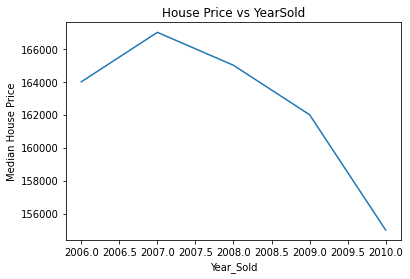

In [13]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

d_tr.groupby('Year_Sold')['Sale_Price'].median().plot()
plt.xlabel('Year_Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

In [14]:
year_feature

['Construction_Year', 'Remodel_Year', 'Garage_Built_Year', 'Year_Sold']

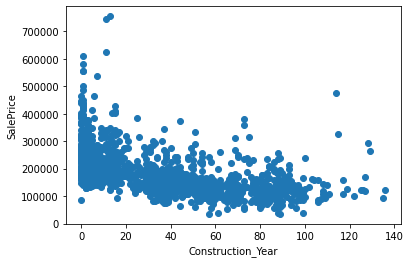

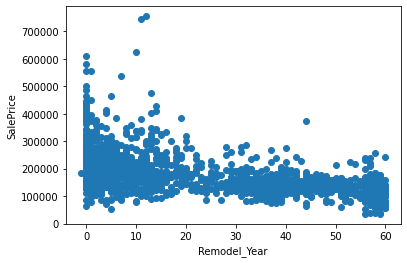

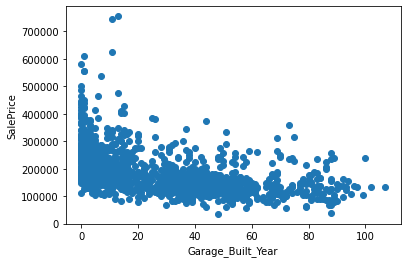

In [15]:
for feature in year_feature:
    if feature!='Year_Sold':
        data=d_tr.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['Year_Sold']-data[feature]

        plt.scatter(data[feature],data['Sale_Price'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [16]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(d_tr[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [17]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


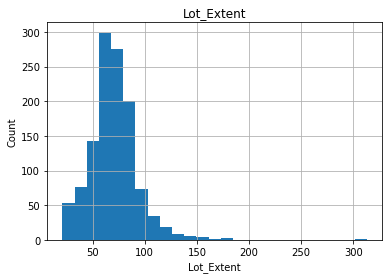

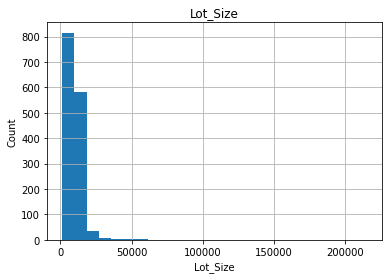

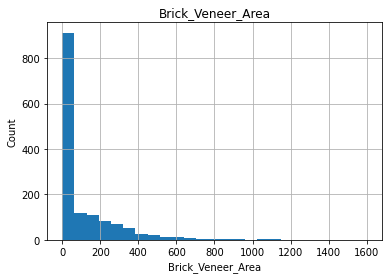

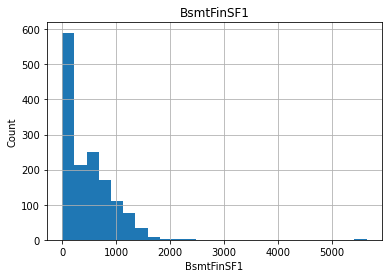

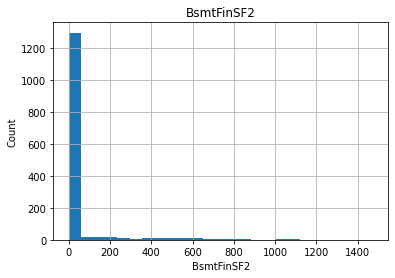

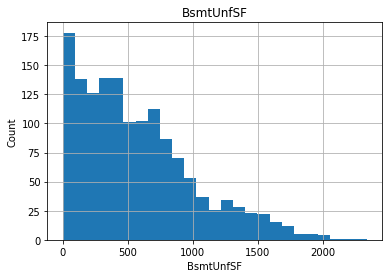

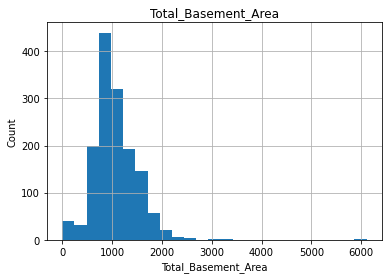

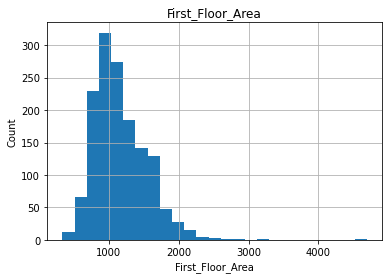

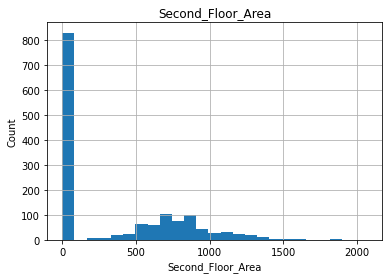

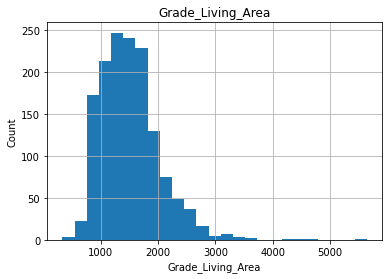

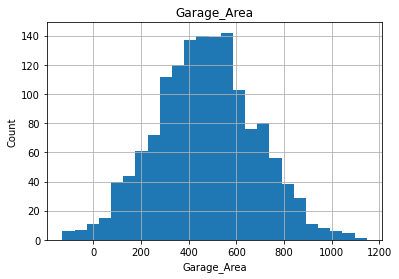

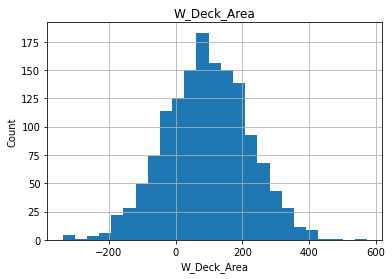

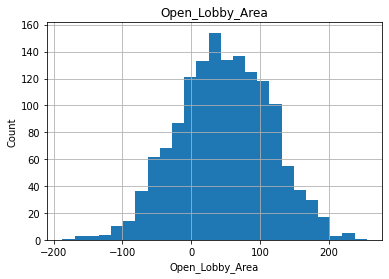

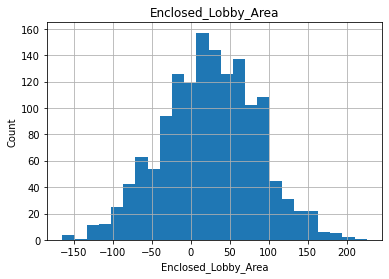

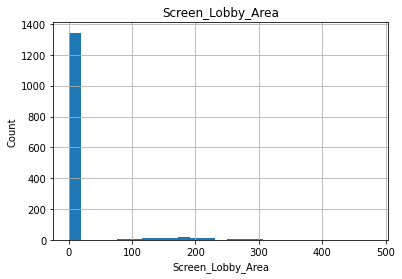

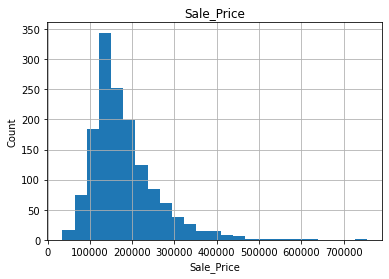

In [18]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=d_tr.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [19]:
d_ts.head()

Id  Building_Class Zoning_Class  Lot_Extent      Lot_Size Road_Type  \
0  1461              20          RHD        80.0  16104.819760     Paved   
1  1462              20          RLD        81.0  15639.150810     Paved   
2  1463              60          RLD        74.0   3849.428920     Paved   
3  1464              60          RLD        78.0   4955.447942     Paved   
4  1465             120          RLD        43.0   3046.604942     Paved   

  Lane_Type Property_Shape Land_Outline Utility_Type Lot_Configuration  \
0       NaN            Reg          Lvl       AllPub                 I   
1       NaN            IR1          Lvl       AllPub                 C   
2       NaN            IR1          Lvl       AllPub                 I   
3       NaN            IR1          Lvl       AllPub                 I   
4       NaN            IR1          HLS       AllPub                 I   

  Property_Slope Neighborhood Condition1 Condition2 House_Type House_Design  \
0             GS        NAmes      Feedr       Norm       1Fam       1Story   
1             GS        NAmes       Norm       Norm       1Fam       1Story   
2             GS      Gilbert       Norm       Norm       1Fam       2Story   
3             GS      Gilbert       Norm       Norm       1Fam       2Story   
4             GS      StoneBr       Norm       Norm     TwnhsE       1Story   

   Overall_Material  House_Condition  Construction_Year  Remodel_Year  \
0                 5                6               1961          1961   
1                 6                6               1958          1958   
2                 5                5               1997          1998   
3                 6                6               1998          1998   
4                 8                5               1992          1992   

  Roof_Design Roof_Quality Exterior1st Exterior2nd Brick_Veneer_Type  \
0       Gable           SS     VinylSd     VinylSd              None   
1         Hip           SS     Wd Sdng     Wd Sdng           BrkFace   
2       Gable           SS     VinylSd     VinylSd              None   
3       Gable           SS     VinylSd     VinylSd           BrkFace   
4       Gable           SS     HdBoard     HdBoard              None   

   Brick_Veneer_Area Exterior_Material Exterior_Condition Foundation_Type  \
0                0.0                TA                 TA              CB   
1              108.0                TA                 TA              CB   
2                0.0                TA                 TA              PC   
3               20.0                TA                 TA              PC   
4                0.0                Gd                 TA              PC   

  Basement_Height Basement_Condition Exposure_Level BsmtFinType1  BsmtFinSF1  \
0              TA                 TA             No          Rec       468.0   
1              TA                 TA             No          ALQ       923.0   
2              Gd                 TA             No          GLQ       791.0   
3              TA                 TA             No          GLQ       602.0   
4              Gd                 TA             No          ALQ       263.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  Total_Basement_Area Heating_Type  \
0          LwQ       144.0      270.0                882.0         GasA   
1          Unf         0.0      406.0               1329.0         GasA   
2          Unf         0.0      137.0                928.0         GasA   
3          Unf         0.0      324.0                926.0         GasA   
4          Unf         0.0     1017.0               1280.0         GasA   

  Heating_Quality Air_Conditioning Electrical_System  First_Floor_Area  \
0              TA                Y             SBrkr               896   
1              TA                Y             SBrkr              1329   
2              Gd                Y             SBrkr               928   
3              Ex                Y             SBrkr             

In [20]:
d_ts.describe()

Id  Building_Class   Lot_Extent      Lot_Size  \
count  1459.000000     1459.000000  1232.000000   1459.000000   
mean   2190.000000       57.378341    68.580357   9872.044418   
std     421.321334       42.746880    22.376841   4960.234751   
min    1461.000000       20.000000    21.000000  -4265.104479   
25%    1825.500000       20.000000    58.000000   6351.984222   
50%    2190.000000       50.000000    67.000000   9784.907361   
75%    2554.500000       70.000000    80.000000  13208.971525   
max    2919.000000      190.000000   200.000000  26126.190300   

       Overall_Material  House_Condition  Construction_Year  Remodel_Year  \
count       1459.000000      1459.000000        1459.000000   1459.000000   
mean           6.078821         5.553804        1971.357779   1983.662783   
std            1.436812         1.113740          30.390071     21.130467   
min            1.000000         1.000000        1879.000000   1950.000000   
25%            5.000000         5.000000        1953.000000   1963.000000   
50%            6.000000         5.000000        1973.000000   1992.000000   
75%            7.000000         6.000000        2001.000000   2004.000000   
max           10.000000         9.000000        2010.000000   2010.000000   

       Brick_Veneer_Area   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count        1444.000000  1458.000000  1458.000000  1458.000000   
mean          100.709141   439.203704    52.619342   554.294925   
std           177.625900   455.268042   176.753926   437.260486   
min             0.000000     0.000000     0.000000     0.000000   
25%             0.000000     0.000000     0.000000   219.250000   
50%             0.000000   350.500000     0.000000   460.000000   
75%           164.000000   753.500000     0.000000   797.750000   
max          1290.000000  4010.000000  1526.000000  2140.000000   

       Total_Basement_Area  First_Floor_Area  Second_Floor_Area  LowQualFinSF  \
count          1458.000000       1459.000000        1459.000000   1459.000000   
mean           1046.117970       1156.534613         325.967786      3.543523   
std             442.898624        398.165820         420.610226     44.043251   
min               0.000000        407.000000           0.000000      0.000000   
25%             784.000000        873.500000           0.000000      0.000000   
50%             988.000000       1079.000000           0.000000      0.000000   
75%            1305.000000       1382.500000         676.000000      0.000000   
max            5095.000000       5095.000000        1862.000000   1064.000000   

       Grade_Living_Area  Underground_Full_Bathroom  \
count        1459.000000                1457.000000   
mean         1486.045922                   0.434454   
std           485.566099                   0.530648   
min           407.000000                   0.000000   
25%          1117.500000                   0.000000   
50%          1432.000000                   0.000000   
75%          1721.000000                   1.000000   
max          5095.000000                   3.000000   

       Underground_Half_Bathroom  Full_Bathroom_Above_Grade  \
count                1457.000000                1459.000000   
mean                    0.065202                   1.570939   
std                     0.252468                   0.555190   
min                     0.000000                   0.000000   
25%                     0.000000                   1.000000   
50%                     0.000000                   2.000000   
75%                     0.000000                   2.000000   
max                     2.000000                   4.000000   

       Half_Bathroom_Above_Grade  Bedroom_Above_Grade  Kitchen_Above_Grade  \
count                1459.000000          1459.000000          1459.000000   
mean                    0.377656             2.854010             1.042495   
std                     0.503017             0.829788             0.208472   
min                     0.

In [21]:
d_tr.shape,d_ts.shape


((1459, 80), (1459, 80))

# 3.Null value treat ment

In [22]:
per=(100*d_tr.isnull().sum()/len(d_tr))
per

Building_Class                0.000000
Zoning_Class                  0.000000
Lot_Extent                   17.751885
Lot_Size                      0.000000
Road_Type                     0.000000
Lane_Type                    93.762851
Property_Shape                0.000000
Land_Outline                  0.000000
Utility_Type                  0.000000
Lot_Configuration             0.000000
Property_Slope                0.000000
Neighborhood                  0.000000
Condition1                    0.000000
Condition2                    0.000000
House_Type                    0.000000
House_Design                  0.000000
Overall_Material              0.000000
House_Condition               0.000000
Construction_Year             0.000000
Remodel_Year                  0.000000
Roof_Design                   0.000000
Roof_Quality                  0.000000
Exterior1st                   0.000000
Exterior2nd                   0.000000
Brick_Veneer_Type             0.548321
Brick_Veneer_Area        

# 4.Remove thus columns where it has more than 50% null values present with test and train data
# also drop Id column
# after cleaning the data

In [23]:

d_tr=d_tr.drop(["Lane_Type","Pool_Quality","Fence_Quality","Miscellaneous_Feature"],axis=1)

In [24]:
d_tr.head()

Building_Class Zoning_Class  Lot_Extent  Lot_Size Road_Type Property_Shape  \
0              60          RLD        65.0      8450     Paved            Reg   
1              20          RLD        80.0      9600     Paved            Reg   
2              60          RLD        68.0     11250     Paved            IR1   
3              70          RLD        60.0      9550     Paved            IR1   
4              60          RLD        84.0     14260     Paved            IR1   

  Land_Outline Utility_Type Lot_Configuration Property_Slope Neighborhood  \
0          Lvl       AllPub                 I             GS      CollgCr   
1          Lvl       AllPub              FR2P             GS      Veenker   
2          Lvl       AllPub                 I             GS      CollgCr   
3          Lvl       AllPub                 C             GS      Crawfor   
4          Lvl       AllPub              FR2P             GS      NoRidge   

  Condition1 Condition2 House_Type House_Design  Overall_Material  \
0       Norm       Norm       1Fam       2Story                 7   
1      Feedr       Norm       1Fam       1Story                 6   
2       Norm       Norm       1Fam       2Story                 7   
3       Norm       Norm       1Fam       2Story                 7   
4       Norm       Norm       1Fam       2Story                 8   

   House_Condition  Construction_Year  Remodel_Year Roof_Design Roof_Quality  \
0                5               2003          2003       Gable           SS   
1                8               1976          1976       Gable           SS   
2                5               2001          2002       Gable           SS   
3                5               1915          1970       Gable           SS   
4                5               2000          2000       Gable           SS   

  Exterior1st Exterior2nd Brick_Veneer_Type  Brick_Veneer_Area  \
0     VinylSd     VinylSd           BrkFace              196.0   
1     MetalSd     MetalSd              None                0.0   
2     VinylSd     VinylSd           BrkFace              162.0   
3     Wd Sdng     Wd Shng              None                0.0   
4     VinylSd     VinylSd           BrkFace              350.0   

  Exterior_Material Exterior_Condition Foundation_Type Basement_Height  \
0                Gd                 TA              PC              Gd   
1                TA                 TA              CB              Gd   
2                Gd                 TA              PC              Gd   
3                TA                 TA              BT              TA   
4                Gd                 TA              PC              Gd   

  Basement_Condition Exposure_Level BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
0                 TA             No          GLQ         706          Unf   
1                 TA             Gd          ALQ         978          Unf   
2                 TA             Mn          GLQ         486          Unf   
3                 Gd             No          ALQ         216          Unf   
4                 TA             Av          GLQ         655          Unf   

   BsmtFinSF2  BsmtUnfSF  Total_Basement_Area Heating_Type Heating_Quality  \
0           0        150                  856         GasA              Ex   
1           0        284                 1262         GasA              Ex   
2           0        434                  920         GasA              Ex   
3           0        540                  756         GasA              Gd   
4           0        490                 1145         GasA              Ex   

  Air_Conditioning Electrical_System  First_Floor_Area  Second_Floor_Area  \
0                Y             SBrkr               856                854   
1                Y             SBrkr              1262                  0   
2                Y             SBrkr               920                866   
3                Y             SBrkr               961                756  

In [25]:
d_tr.isnull().sum()

Building_Class                 0
Zoning_Class                   0
Lot_Extent                   259
Lot_Size                       0
Road_Type                      0
Property_Shape                 0
Land_Outline                   0
Utility_Type                   0
Lot_Configuration              0
Property_Slope                 0
Neighborhood                   0
Condition1                     0
Condition2                     0
House_Type                     0
House_Design                   0
Overall_Material               0
House_Condition                0
Construction_Year              0
Remodel_Year                   0
Roof_Design                    0
Roof_Quality                   0
Exterior1st                    0
Exterior2nd                    0
Brick_Veneer_Type              8
Brick_Veneer_Area              8
Exterior_Material              0
Exterior_Condition             0
Foundation_Type                0
Basement_Height               37
Basement_Condition            37
Exposure_L

In [26]:
d_tr.Lot_Extent.value_counts()
d_tr.Basement_Height.value_counts()
d_tr.Basement_Condition.value_counts()
d_tr.Brick_Veneer_Type.value_counts()
d_tr.Brick_Veneer_Area.value_counts()
d_tr.Exposure_Level.value_counts()
d_tr.BsmtFinType1.value_counts()
d_tr.BsmtFinType2.value_counts()
d_tr.Electrical_System.value_counts()
d_tr.Fireplace_Quality.value_counts()
d_tr.Garage.value_counts()
d_tr.Garage_Built_Year.value_counts()
d_tr.Garage_Finish_Year.value_counts()
d_tr.Garage_Quality.value_counts()
d_tr.Garage_Condition.value_counts()
d_tr.Brick_Veneer_Area.value_counts()
d_tr.Garage_Built_Year.value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
2009.0    21
1966.0    21
1962.0    21
1958.0    21
1965.0    20
2001.0    20
1996.0    20
1957.0    20
1970.0    20
1960.0    19
1997.0    19
1978.0    19
1954.0    19
1974.0    18
1994.0    18
1995.0    18
1964.0    18
1959.0    17
1963.0    16
1990.0    16
1956.0    16
1969.0    15
1979.0    15
1980.0    15
1967.0    15
1988.0    14
1973.0    14
1940.0    14
1920.0    14
1972.0    14
1961.0    13
1971.0    13
1955.0    13
1992.0    13
1953.0    12
1987.0    11
1948.0    11
1985.0    10
1981.0    10
1941.0    10
1925.0    10
1989.0    10
1975.0     9
1991.0     9
1939.0     9
1984.0     8
1949.0     8
1930.0     8
1983.0     7
1986.0     6
1951.0     6
1926.0     6
1922.0     5
1936.0     5
1916.0     5
1931.0     4
1945.0     4
1935.0     4
1928.0     4
1946.0     4
1982.0     4
1938.0     3

In [27]:
d_tr.Lot_Extent=d_tr.Lot_Extent.fillna(d_tr.Lot_Extent.mean())
d_tr.Basement_Height=d_tr.Basement_Height.fillna("Fa")
d_tr.Basement_Condition=d_tr.Basement_Condition.fillna("Po")
d_tr.Brick_Veneer_Area=d_tr.Brick_Veneer_Area.fillna(d_tr.Brick_Veneer_Area.mean())
d_tr.Brick_Veneer_Type=d_tr.Brick_Veneer_Type.fillna("BrkCmn")
d_tr.Exposure_Level=d_tr.Exposure_Level.fillna("Mn")
d_tr.BsmtFinType1=d_tr.BsmtFinType1.fillna("LwQ")
d_tr.BsmtFinType2=d_tr.BsmtFinType2.fillna("GLQ")
d_tr.Electrical_System=d_tr.Electrical_System.fillna("Mix")
d_tr.Brick_Veneer_Area=d_tr.Brick_Veneer_Area.fillna(d_tr.Brick_Veneer_Area.mean())
d_tr.Fireplace_Quality=d_tr.Fireplace_Quality.fillna("Po")
d_tr.Garage=d_tr.Garage.fillna("2Types")
d_tr.Garage_Built_Year=d_tr.Garage_Built_Year.fillna(d_tr.Garage_Built_Year.mean())
d_tr.Garage_Finish_Year=d_tr.Garage_Finish_Year.fillna("Fin")
d_tr.Garage_Quality=d_tr.Garage_Quality.fillna("Po")
d_tr.Garage_Condition=d_tr.Garage_Condition.fillna("Ex")
d_tr.Garage_Built_Year=d_tr.Garage_Built_Year.fillna(d_tr.Garage_Built_Year.mean())


In [28]:


d_tr.isnull().sum()

Building_Class               0
Zoning_Class                 0
Lot_Extent                   0
Lot_Size                     0
Road_Type                    0
Property_Shape               0
Land_Outline                 0
Utility_Type                 0
Lot_Configuration            0
Property_Slope               0
Neighborhood                 0
Condition1                   0
Condition2                   0
House_Type                   0
House_Design                 0
Overall_Material             0
House_Condition              0
Construction_Year            0
Remodel_Year                 0
Roof_Design                  0
Roof_Quality                 0
Exterior1st                  0
Exterior2nd                  0
Brick_Veneer_Type            0
Brick_Veneer_Area            0
Exterior_Material            0
Exterior_Condition           0
Foundation_Type              0
Basement_Height              0
Basement_Condition           0
Exposure_Level               0
BsmtFinType1                 0
BsmtFinS

In [29]:
d_tr.dtypes

Building_Class                 int64
Zoning_Class                  object
Lot_Extent                   float64
Lot_Size                       int64
Road_Type                     object
Property_Shape                object
Land_Outline                  object
Utility_Type                  object
Lot_Configuration             object
Property_Slope                object
Neighborhood                  object
Condition1                    object
Condition2                    object
House_Type                    object
House_Design                  object
Overall_Material               int64
House_Condition                int64
Construction_Year              int64
Remodel_Year                   int64
Roof_Design                   object
Roof_Quality                  object
Exterior1st                   object
Exterior2nd                   object
Brick_Veneer_Type             object
Brick_Veneer_Area            float64
Exterior_Material             object
Exterior_Condition            object
F

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [31]:
d_tr.Zoning_Class=le.fit_transform(d_tr.Zoning_Class)
d_tr.Road_Type=le.fit_transform(d_tr.Road_Type)
d_tr.Property_Shape=le.fit_transform(d_tr.Property_Shape)
d_tr.Land_Outline=le.fit_transform(d_tr.Land_Outline)
d_tr.Utility_Type=le.fit_transform(d_tr.Utility_Type)
d_tr.Lot_Configuration=le.fit_transform(d_tr.Lot_Configuration)
d_tr.Property_Slope=le.fit_transform(d_tr.Property_Slope)
d_tr.Neighborhood=le.fit_transform(d_tr.Neighborhood)
d_tr.Condition1=le.fit_transform(d_tr.Condition1)
d_tr.Condition2=le.fit_transform(d_tr.Condition2)
d_tr.House_Type=le.fit_transform(d_tr.House_Type)
d_tr.House_Design=le.fit_transform(d_tr.House_Design)
d_tr.Roof_Design=le.fit_transform(d_tr.Roof_Design)
d_tr.Roof_Quality=le.fit_transform(d_tr.Roof_Quality)
d_tr.Exterior1st=le.fit_transform(d_tr.Exterior1st)
d_tr.Exterior2nd=le.fit_transform(d_tr.Exterior2nd)
d_tr.Brick_Veneer_Type=le.fit_transform(d_tr.Brick_Veneer_Type)
d_tr.Exterior_Material=le.fit_transform(d_tr.Exterior_Material)
d_tr.Exterior_Condition=le.fit_transform(d_tr.Exterior_Condition)
d_tr.Foundation_Type=le.fit_transform(d_tr.Foundation_Type)
d_tr.Basement_Height=le.fit_transform(d_tr.Basement_Height)
d_tr.Basement_Condition=le.fit_transform(d_tr.Basement_Condition)
d_tr.Exposure_Level=le.fit_transform(d_tr.Exposure_Level)
d_tr.BsmtFinType1=le.fit_transform(d_tr.BsmtFinType1)
d_tr.BsmtFinType2=le.fit_transform(d_tr.BsmtFinType2)
d_tr.Heating_Type=le.fit_transform(d_tr.Heating_Type)
d_tr.Heating_Quality=le.fit_transform(d_tr.Heating_Quality)
d_tr.Air_Conditioning=le.fit_transform(d_tr.Air_Conditioning)
d_tr.Electrical_System=le.fit_transform(d_tr.Electrical_System)
d_tr.Kitchen_Quality=le.fit_transform(d_tr.Kitchen_Quality)
d_tr.Functional_Rate=le.fit_transform(d_tr.Functional_Rate)
d_tr.Fireplace_Quality=le.fit_transform(d_tr.Fireplace_Quality)
d_tr.Garage=le.fit_transform(d_tr.Garage)
d_tr.Garage_Finish_Year=le.fit_transform(d_tr.Garage_Finish_Year)
d_tr.Garage_Quality=le.fit_transform(d_tr.Garage_Quality)
d_tr.Garage_Condition=le.fit_transform(d_tr.Garage_Condition)
d_tr.Pavedd_Drive=le.fit_transform(d_tr.Pavedd_Drive)
d_tr.Sale_Type=le.fit_transform(d_tr.Sale_Type)
d_tr.Sale_Condition=le.fit_transform(d_tr.Sale_Condition)


In [32]:
d_tr.dtypes

Building_Class                 int64
Zoning_Class                   int32
Lot_Extent                   float64
Lot_Size                       int64
Road_Type                      int32
Property_Shape                 int32
Land_Outline                   int32
Utility_Type                   int32
Lot_Configuration              int32
Property_Slope                 int32
Neighborhood                   int32
Condition1                     int32
Condition2                     int32
House_Type                     int32
House_Design                   int32
Overall_Material               int64
House_Condition                int64
Construction_Year              int64
Remodel_Year                   int64
Roof_Design                    int32
Roof_Quality                   int32
Exterior1st                    int32
Exterior2nd                    int32
Brick_Veneer_Type              int32
Brick_Veneer_Area            float64
Exterior_Material              int32
Exterior_Condition             int32
F

TEST data WORK

In [33]:
100*d_ts.isnull().sum()/len(d_ts)


Id                            0.000000
Building_Class                0.000000
Zoning_Class                  0.274160
Lot_Extent                   15.558602
Lot_Size                      0.000000
Road_Type                     0.000000
Lane_Type                    92.666210
Property_Shape                0.000000
Land_Outline                  0.000000
Utility_Type                  0.137080
Lot_Configuration             0.000000
Property_Slope                0.000000
Neighborhood                  0.000000
Condition1                    0.000000
Condition2                    0.000000
House_Type                    0.000000
House_Design                  0.000000
Overall_Material              0.000000
House_Condition               0.000000
Construction_Year             0.000000
Remodel_Year                  0.000000
Roof_Design                   0.000000
Roof_Quality                  0.000000
Exterior1st                   0.068540
Exterior2nd                   0.068540
Brick_Veneer_Type        

In [34]:
d_ts=d_ts.drop(["Lane_Type","Pool_Quality","Fence_Quality","Miscellaneous_Feature"],axis=1)

In [35]:
d_ts1=d_ts["Id"]
d_ts=d_ts.drop(["Id"],axis=1)

In [36]:
# list of numerical variables
numerical_features1 = [feature1 for feature1 in d_ts.columns if d_ts[feature1].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features1))
# visualise the numerical variables
d_ts[numerical_features1].head()


Number of numerical variables:  36


Building_Class  Lot_Extent      Lot_Size  Overall_Material  \
0              20        80.0  16104.819760                 5   
1              20        81.0  15639.150810                 6   
2              60        74.0   3849.428920                 5   
3              60        78.0   4955.447942                 6   
4             120        43.0   3046.604942                 8   

   House_Condition  Construction_Year  Remodel_Year  Brick_Veneer_Area  \
0                6               1961          1961                0.0   
1                6               1958          1958              108.0   
2                5               1997          1998                0.0   
3                6               1998          1998               20.0   
4                5               1992          1992                0.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  Total_Basement_Area  First_Floor_Area  \
0       468.0       144.0      270.0                882.0               896   
1       923.0         0.0      406.0               1329.0              1329   
2       791.0         0.0      137.0                928.0               928   
3       602.0         0.0      324.0                926.0               926   
4       263.0         0.0     1017.0               1280.0              1280   

   Second_Floor_Area  LowQualFinSF  Grade_Living_Area  \
0                  0             0                896   
1                  0             0               1329   
2                701             0               1629   
3                678             0               1604   
4                  0             0               1280   

   Underground_Full_Bathroom  Underground_Half_Bathroom  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   Full_Bathroom_Above_Grade  Half_Bathroom_Above_Grade  Bedroom_Above_Grade  \
0                          1                          0                    2   
1                          1                          1                    3   
2                          2                          1                    3   
3                          2                          1                    3   
4                          2                          0                    2   

   Kitchen_Above_Grade  Rooms_Above_Grade  Fireplaces  Garage_Built_Year  \
0                    1                  5           0             1961.0   
1                    1                  6           0             1958.0   
2                    1                  6           1             1997.0   
3                    1                  7           1             1998.0   
4                    1                  5           0             1992.0   

   Garage_Size  Garage_Area  W_Deck_Area  Open_Lobby_Area  \
0          1.0        730.0          140                0   
1          1.0        312.0          393               36   
2          2.0        482.0          212               34   
3          2.0        470.0          360               36   
4          2.0        506.0            0               82   

   Enclosed_Lobby_Area  Three_Season_Lobby_Area  Screen_Lobby_Area  Pool_Area  \
0                    0                        0                120          0   
1                    0                        0                  0          0   
2                    0                        0                  0          0   
3                    0                        0                  0          0   
4                    0                        0                144          0   

   Miscellaneous_Value  Month_Sold  Year_Sold  
0                    0           6       2010  
1                12500           6       2010  
2                    0           3       2010  
3         

In [37]:
# list of variables that contain year information
year_feature1 = [feature1 for feature1 in numerical_features1 if 'Yr' in feature1 or 'Year' in feature1]

year_feature1

['Construction_Year', 'Remodel_Year', 'Garage_Built_Year', 'Year_Sold']

In [38]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature1=[feature1 for feature1 in numerical_features1 if len(d_ts[feature1].unique())<25 and feature1 not in year_feature1+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature1)))

Discrete Variables Count: 16


In [39]:
continuous_feature1=[feature1 for feature1 in numerical_features1 if feature1 not in discrete_feature1+year_feature1+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature1)))

Continuous feature Count 16


In [40]:
d_ts.isnull().sum()

Building_Class                 0
Zoning_Class                   4
Lot_Extent                   227
Lot_Size                       0
Road_Type                      0
Property_Shape                 0
Land_Outline                   0
Utility_Type                   2
Lot_Configuration              0
Property_Slope                 0
Neighborhood                   0
Condition1                     0
Condition2                     0
House_Type                     0
House_Design                   0
Overall_Material               0
House_Condition                0
Construction_Year              0
Remodel_Year                   0
Roof_Design                    0
Roof_Quality                   0
Exterior1st                    1
Exterior2nd                    1
Brick_Veneer_Type             16
Brick_Veneer_Area             15
Exterior_Material              0
Exterior_Condition             0
Foundation_Type                0
Basement_Height               44
Basement_Condition            45
Exposure_L

In [41]:
d_ts.Zoning_Class.value_counts()
d_ts.Lot_Extent.value_counts()
d_ts.Utility_Type.value_counts()
d_ts.Exterior1st.value_counts()
d_ts.Exterior2nd.value_counts()
d_ts.Brick_Veneer_Type.value_counts()
d_ts.Brick_Veneer_Area.value_counts()
d_ts.Basement_Height.value_counts()
d_ts.Basement_Condition.value_counts()
d_ts.Exposure_Level.value_counts()
d_ts.BsmtFinType1.value_counts()
d_ts.BsmtFinSF1.value_counts()
d_ts.BsmtFinType2.value_counts()
d_ts.BsmtFinSF2.value_counts()
d_ts.BsmtUnfSF.value_counts()
d_ts.Total_Basement_Area.value_counts()
d_ts.Underground_Full_Bathroom.value_counts()
d_ts.Underground_Half_Bathroom.value_counts()
d_ts.Kitchen_Quality.value_counts()
d_ts.Functional_Rate.value_counts()
d_ts.Garage.value_counts()
d_ts.Garage_Built_Year.value_counts()
d_ts.Garage_Finish_Year.value_counts()
d_ts.Garage_Size.value_counts()
d_ts.Garage_Area.value_counts()
d_ts.Garage_Quality.value_counts()
d_ts.Garage_Condition.value_counts()
d_ts.Sale_Type.value_counts()
d_ts.Fireplace_Quality.value_counts()

Gd    364
TA    279
Fa     41
Po     26
Ex     19
Name: Fireplace_Quality, dtype: int64

In [42]:
d_ts.Zoning_Class=d_ts.Zoning_Class.fillna("RHD")
d_ts.Lot_Extent=d_ts.Lot_Extent.fillna(d_ts.Lot_Extent.mean())
d_ts.Utility_Type=d_ts.Utility_Type.fillna("AllPub")
d_ts.Exterior1st=d_ts.Exterior1st.fillna("CB")
d_ts.Exterior2nd=d_ts.Exterior2nd.fillna("Stone")
d_ts.Brick_Veneer_Type=d_ts.Brick_Veneer_Type.fillna("BrkCmn")
d_ts.Brick_Veneer_Area=d_ts.Brick_Veneer_Area.fillna(d_ts.Brick_Veneer_Area.mean())
d_ts.Basement_Height=d_ts.Basement_Height.fillna("Fa")
d_ts.Basement_Condition=d_ts.Basement_Condition.fillna("Po")
d_ts.Exposure_Level=d_ts.Exposure_Level.fillna("Mn")
d_ts.BsmtFinType1=d_ts.BsmtFinType1.fillna("LwQ")
d_ts.BsmtFinSF1=d_ts.BsmtFinSF1.fillna(d_ts.BsmtFinSF1.mean())
d_ts.BsmtFinType2=d_ts.BsmtFinType2.fillna("GLQ")
d_ts.BsmtFinSF2=d_ts.BsmtFinSF2.fillna(d_ts.BsmtFinSF2.mean())
d_ts.BsmtUnfSF=d_ts.BsmtUnfSF.fillna(d_ts.BsmtUnfSF.mean())
d_ts.Total_Basement_Area=d_ts.Total_Basement_Area.fillna(d_ts.Total_Basement_Area.mean())
d_ts.Underground_Full_Bathroom=d_ts.Underground_Full_Bathroom.fillna(3.0)
d_ts.Underground_Half_Bathroom=d_ts.Underground_Half_Bathroom.fillna(2.0)
d_ts.Kitchen_Quality=d_ts.Kitchen_Quality.fillna("Fa")
d_ts.Functional_Rate=d_ts.Functional_Rate.fillna("MS")
d_ts.Garage=d_ts.Garage.fillna("CarPort")
d_ts.Garage_Built_Year=d_ts.Garage_Built_Year.fillna(d_ts.Garage_Built_Year.mean())
d_ts.Garage_Finish_Year=d_ts.Garage_Finish_Year.fillna("Fin")
d_ts.Garage_Size=d_ts.Garage_Size.fillna(5.0)
d_ts.Garage_Area=d_ts.Garage_Area.fillna(d_ts.Garage_Area.mean())
d_ts.Garage_Quality=d_ts.Garage_Quality.fillna("Po")
d_ts.Garage_Condition=d_ts.Garage_Condition.fillna("Ex")
d_ts.Sale_Type=d_ts.Sale_Type.fillna("ConLw")
d_ts.Fireplace_Quality=d_ts.fillna("Ex")            

In [43]:
d_ts.isnull().sum()

Building_Class               0
Zoning_Class                 0
Lot_Extent                   0
Lot_Size                     0
Road_Type                    0
Property_Shape               0
Land_Outline                 0
Utility_Type                 0
Lot_Configuration            0
Property_Slope               0
Neighborhood                 0
Condition1                   0
Condition2                   0
House_Type                   0
House_Design                 0
Overall_Material             0
House_Condition              0
Construction_Year            0
Remodel_Year                 0
Roof_Design                  0
Roof_Quality                 0
Exterior1st                  0
Exterior2nd                  0
Brick_Veneer_Type            0
Brick_Veneer_Area            0
Exterior_Material            0
Exterior_Condition           0
Foundation_Type              0
Basement_Height              0
Basement_Condition           0
Exposure_Level               0
BsmtFinType1                 0
BsmtFinS

In [44]:
d_ts.dtypes

Building_Class                 int64
Zoning_Class                  object
Lot_Extent                   float64
Lot_Size                     float64
Road_Type                     object
Property_Shape                object
Land_Outline                  object
Utility_Type                  object
Lot_Configuration             object
Property_Slope                object
Neighborhood                  object
Condition1                    object
Condition2                    object
House_Type                    object
House_Design                  object
Overall_Material               int64
House_Condition                int64
Construction_Year              int64
Remodel_Year                   int64
Roof_Design                   object
Roof_Quality                  object
Exterior1st                   object
Exterior2nd                   object
Brick_Veneer_Type             object
Brick_Veneer_Area            float64
Exterior_Material             object
Exterior_Condition            object
F

In [45]:
d_ts.Zoning_Class=le.fit_transform(d_ts.Zoning_Class)
d_ts.Road_Type=le.fit_transform(d_ts.Road_Type)
d_ts.Property_Shape=le.fit_transform(d_ts.Property_Shape)
d_ts.Land_Outline=le.fit_transform(d_ts.Land_Outline)
d_ts.Utility_Type=le.fit_transform(d_ts.Utility_Type)
d_ts.Lot_Configuration=le.fit_transform(d_ts.Lot_Configuration)
d_ts.Property_Slope=le.fit_transform(d_ts.Property_Slope)
d_ts.Neighborhood=le.fit_transform(d_ts.Neighborhood)
d_ts.Condition1=le.fit_transform(d_ts.Condition1)
d_ts.Condition2=le.fit_transform(d_ts.Condition2)
d_ts.House_Type=le.fit_transform(d_ts.House_Type)
d_ts.House_Design=le.fit_transform(d_ts.House_Design)
d_ts.Roof_Design=le.fit_transform(d_ts.Roof_Design)
d_ts.Roof_Quality=le.fit_transform(d_ts.Roof_Quality)
d_ts.Exterior1st=le.fit_transform(d_ts.Exterior1st)
d_ts.Exterior2nd=le.fit_transform(d_ts.Exterior2nd)
d_ts.Brick_Veneer_Type=le.fit_transform(d_ts.Brick_Veneer_Type)
d_ts.Exterior_Material=le.fit_transform(d_ts.Exterior_Material)
d_ts.Exterior_Condition=le.fit_transform(d_ts.Exterior_Condition)
d_ts.Foundation_Type=le.fit_transform(d_ts.Foundation_Type)
d_ts.Basement_Height=le.fit_transform(d_ts.Basement_Height)
d_ts.Basement_Condition=le.fit_transform(d_ts.Basement_Condition)
d_ts.Exposure_Level=le.fit_transform(d_ts.Exposure_Level)
d_ts.BsmtFinType1=le.fit_transform(d_ts.BsmtFinType1)
d_ts.Exterior_Material=le.fit_transform(d_ts.Exterior_Material)
d_ts.Exterior_Condition=le.fit_transform(d_ts.Exterior_Condition)
d_ts.Foundation_Type=le.fit_transform(d_ts.Foundation_Type)
d_ts.Basement_Height=le.fit_transform(d_ts.Basement_Height)
d_ts.Basement_Condition=le.fit_transform(d_ts.Basement_Condition)
d_ts.Exposure_Level=le.fit_transform(d_ts.Exposure_Level)
d_ts.BsmtFinType2 =le.fit_transform(d_ts.BsmtFinType2 )
d_ts.Heating_Type=le.fit_transform(d_ts.Heating_Type)
d_ts.Heating_Quality=le.fit_transform(d_ts.Heating_Quality)
d_ts.Air_Conditioning=le.fit_transform(d_ts.Air_Conditioning)
d_ts.Electrical_System=le.fit_transform(d_ts.Electrical_System)
d_ts.Kitchen_Quality=le.fit_transform(d_ts.Kitchen_Quality)
d_ts.Functional_Rate=le.fit_transform(d_ts.Functional_Rate)
d_ts.Garage=le.fit_transform(d_ts.Garage)
d_ts.Garage_Finish_Year=le.fit_transform(d_ts.Garage_Finish_Year)
d_ts.Garage_Quality=le.fit_transform(d_ts.Garage_Quality)
d_ts.Garage_Condition=le.fit_transform(d_ts.Garage_Condition)
d_ts.Pavedd_Drive=le.fit_transform(d_ts.Pavedd_Drive)
d_ts.Sale_Type=le.fit_transform(d_ts.Sale_Type)
d_ts.Sale_Condition=le.fit_transform(d_ts.Sale_Condition)



In [46]:
d_ts.dtypes

Building_Class                 int64
Zoning_Class                   int32
Lot_Extent                   float64
Lot_Size                     float64
Road_Type                      int32
Property_Shape                 int32
Land_Outline                   int32
Utility_Type                   int32
Lot_Configuration              int32
Property_Slope                 int32
Neighborhood                   int32
Condition1                     int32
Condition2                     int32
House_Type                     int32
House_Design                   int32
Overall_Material               int64
House_Condition                int64
Construction_Year              int64
Remodel_Year                   int64
Roof_Design                    int32
Roof_Quality                   int32
Exterior1st                    int32
Exterior2nd                    int32
Brick_Veneer_Type              int32
Brick_Veneer_Area            float64
Exterior_Material              int32
Exterior_Condition             int32
F

# Building a Basic model

In [47]:
d_ts.describe()

Building_Class  Zoning_Class   Lot_Extent      Lot_Size    Road_Type  \
count     1459.000000   1459.000000  1459.000000   1459.000000  1459.000000   
mean        57.378341      3.023989    68.580357   9872.044418     0.995888   
std         42.746880      0.686016    20.561228   4960.234751     0.064018   
min         20.000000      0.000000    21.000000  -4265.104479     0.000000   
25%         20.000000      3.000000    60.000000   6351.984222     1.000000   
50%         50.000000      3.000000    68.580357   9784.907361     1.000000   
75%         70.000000      3.000000    78.000000  13208.971525     1.000000   
max        190.000000      4.000000   200.000000  26126.190300     1.000000   

       Property_Shape  Land_Outline  Utility_Type  Lot_Configuration  \
count     1459.000000   1459.000000        1459.0        1459.000000   
mean         1.952707      2.776559           0.0           3.092529   
std          1.410751      0.701340           0.0           1.585797   
min          0.000000      0.000000           0.0           0.000000   
25%          0.000000      3.000000           0.0           2.000000   
50%          3.000000      3.000000           0.0           4.000000   
75%          3.000000      3.000000           0.0           4.000000   
max          3.000000      3.000000           0.0           4.000000   

       Property_Slope  Neighborhood   Condition1   Condition2   House_Type  \
count     1459.000000   1459.000000  1459.000000  1459.000000  1459.000000   
mean         0.045236     12.623029     2.821110     2.826594     0.518163   
std          0.217566      5.897889     1.098793     0.421579     1.214981   
min          0.000000      0.000000     0.000000     0.000000     0.000000   
25%          0.000000      8.000000     3.000000     3.000000     0.000000   
50%          0.000000     12.000000     3.000000     3.000000     0.000000   
75%          0.000000     17.000000     3.000000     3.000000     0.000000   
max          2.000000     24.000000     9.000000     5.000000     4.000000   

       House_Design  Overall_Material  House_Condition  Construction_Year  \
count   1459.000000       1459.000000      1459.000000        1459.000000   
mean       2.638794          6.078821         5.553804        1971.357779   
std        1.479778          1.436812         1.113740          30.390071   
min        0.000000          1.000000         1.000000        1879.000000   
25%        2.000000          5.000000         5.000000        1953.000000   
50%        2.000000          6.000000         5.000000        1973.000000   
75%        4.000000          7.000000         6.000000        2001.000000   
max        6.000000         10.000000         9.000000        2010.000000   

       Remodel_Year  Roof_Design  Roof_Quality  Exterior1st  Exterior2nd  \
count   1459.000000  1459.000000   1459.000000  1459.000000  1459.000000   
mean    1983.662783     1.382454      0.015764     8.337217     9.715559   
std       21.130467     0.806605      0.158520     2.428411     3.132527   
min     1950.000000     0.000000      0.000000     0.000000     0.000000   
25%     1963.000000     1.000000      0.000000     7.000000     8.000000   
50%     1992.000000     1.000000      0.000000    10.000000    12.000000   
75%     2004.000000     1.000000      0.000000    10.000000    12.000000   
max     2010.000000     5.000000      3.000000    12.000000    14.000000   

       Brick_Veneer_Type  Brick_Veneer_Area  Exterior_Material  \
count        1459.000000        1459.000000        1459.000000   
mean            1.749829         100.709141           2.521590   
std             0.623987         176.709824           0.710527   
min             0.000000           0.000000           0.000000   
25%             1.000000           0.000000           2.000000   
50%             2.000000           0.000000           3.000000   
75%             2.000000         162.000000           3.000000   
max             3.000000        1290

In [48]:
tr_x=d_tr.iloc[:,0:-1]
tr_y=d_tr.iloc[:,-1]
ts_x=d_ts.iloc[:,0:]

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
tr_xtrain,tr_xtest,tr_ytrain,tr_ytest=train_test_split(tr_x,tr_y,test_size=.3,random_state=101)

In [51]:
tr_x.shape,tr_y.shape

((1459, 75), (1459,))

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
tr_xtrain,tr_xtest,tr_ytrain,tr_ytest=train_test_split(tr_x,tr_y,test_size=.3,random_state=101)

In [54]:
tr_xtrain.shape,tr_xtest.shape,tr_ytrain.shape,tr_ytest.shape

((1021, 75), (438, 75), (1021,), (438,))

In [55]:
from sklearn import linear_model 
ln=linear_model.LinearRegression()

In [56]:
ln.fit(tr_xtrain,tr_ytrain)

LinearRegression()

In [57]:
pred=ln.predict(tr_xtest)
pred

array([208100.18226368, 180648.61726292,  67766.5232292 , 147544.67044134,
       164135.38475194, 178353.27804498, 338154.62027872, 188181.09954429,
       169388.18326494, 152993.72204949, 157566.91437725, 194014.68921078,
       232237.75774415, 148428.79165165,  97955.1719883 , 107732.06285385,
       249709.03506853, 262413.93567119, 127763.53165281, 125744.12825109,
       117729.75982782, 394110.64034775, 172519.8939638 , 214267.94546857,
        71106.14078472,  96249.2271277 , 124259.74231908, 190985.55505983,
       120339.44929679, 118545.22929986, 216881.77809579, 129495.46648278,
       273477.78308604, 218679.90359876, 135147.45984952, 118621.7087378 ,
       356894.66747427, 158959.80245988, 371705.98147743, 216627.63399595,
       183166.22583266, 201419.42231946, 212383.27428033, 122055.57084497,
       232203.38841274, 199579.36943901, 114545.68843485, 122457.62459259,
       143156.60929675,  47507.05431153, 123458.43517938, 145492.86180944,
       116109.06523567, 1

In [58]:
ln.intercept_      

528427.3338622111

In [59]:
ln.coef_

array([-7.93929803e+01, -1.41152419e+03,  4.37106654e+01,  5.98825400e-01,
        3.54172800e+04, -1.12546457e+03,  1.40682348e+03, -2.80336896e+04,
       -1.03808395e+02,  1.95234447e+03,  1.42258306e+02, -1.92155020e+03,
       -1.74026091e+04, -1.02000528e+03, -7.43992816e+02,  9.55753025e+03,
        5.99545207e+03,  2.66679576e+02, -4.92918128e+00,  4.99587444e+02,
        4.83401877e+03, -1.79652590e+02,  7.61082790e+00,  6.27042356e+03,
        3.79542526e+01, -8.11705117e+03,  3.41814537e+01,  1.48587277e+03,
       -8.17543883e+03,  1.71002790e+03, -2.40723339e+03,  1.03106210e+03,
        2.00679614e+01,  7.42365981e+02,  1.15943120e+01, -6.43308973e+00,
        2.52291838e+01, -5.90321811e+03, -9.21119850e+02, -6.67236511e+03,
        2.56231513e+02,  2.60665691e+01,  3.49188065e+01, -3.57781620e+01,
        2.52072135e+01, -4.81240866e+02, -2.34350900e+03, -2.44062281e+03,
       -1.27867692e+03, -3.74722445e+03, -1.89017038e+04, -7.00586779e+03,
        1.32064844e+03,  

In [60]:
df1=pd.DataFrame({"var1":list(ln.coef_),"col":list(tr_xtrain)})
df1

var1                        col
0     -79.392980             Building_Class
1   -1411.524189               Zoning_Class
2      43.710665                 Lot_Extent
3       0.598825                   Lot_Size
4   35417.280026                  Road_Type
5   -1125.464571             Property_Shape
6    1406.823476               Land_Outline
7  -28033.689647               Utility_Type
8    -103.808395          Lot_Configuration
9    1952.344472             Property_Slope
10    142.258306               Neighborhood
11  -1921.550202                 Condition1
12 -17402.609091                 Condition2
13  -1020.005275                 House_Type
14   -743.992816               House_Design
15   9557.530245           Overall_Material
16   5995.452066            House_Condition
17    266.679576          Construction_Year
18     -4.929181               Remodel_Year
19    499.587444                Roof_Design
20   4834.018775               Roof_Quality
21   -179.652590                Exterior1st
22      7.610828                Exterior2nd
23   6270.423557          Brick_Veneer_Type
24     37.954253          Brick_Veneer_Area
25  -8117.051169          Exterior_Material
26     34.181454         Exterior_Condition
27   1485.872769            Foundation_Type
28  -8175.438832            Basement_Height
29   1710.027902         Basement_Condition
30  -2407.233390             Exposure_Level
31   1031.062104               BsmtFinType1
32     20.067961                 BsmtFinSF1
33    742.365981               BsmtFinType2
34     11.594312                 BsmtFinSF2
35     -6.433090                  BsmtUnfSF
36     25.229184        Total_Basement_Area
37  -5903.218110               Heating_Type
38   -921.119850            Heating_Quality
39  -6672.365111           Air_Conditioning
40    256.231513          Electrical_System
41     26.066569           First_Floor_Area
42     34.918806          Second_Floor_Area
43    -35.778162               LowQualFinSF
44     25.207214          Grade_Living_Area
45   -481.240866  Underground_Full_Bathroom
46  -2343.508996  Underground_Half_Bathroom
47  -2440.622805  Full_Bathroom_Above_Grade
48  -1278.676922  Half_Bathroom_Above_Grade
49  -3747.224450        Bedroom_Above_Grade
50 -18901.703810        Kitchen_Above_Grade
51  -7005.867786            Kitchen_Quality
52   1320.648442          Rooms_Above_Grade
53   2384.700662            Functional_Rate
54   3835.196827                 Fireplaces
55  -1680.123783          Fireplace_Quality
56    625.579049                     Garage
57     -4.067940          Garage_Built_Year
58  -1409.959702         Garage_Finish_Year
59   7406.994765                Garage_Size
60     -0.184712                Garage_Area
61    304.635981             Garage_Quality
62  -1895.746194           Garage_Condition
63   2285.241589               Pavedd_Drive
64     -5.307019                W_Deck_Area
65      4.099969            Open_Lobby_Area
66     21.324050        Enclosed_Lobby_Area
67     22.733901    Three_Season_Lobby_Area
68     14.156455          Screen_Lobby_Area
69     71.633923                  Pool_Area
70      0.359936        Miscellaneous_Value
71   -232.582915                 Month_Sold
72   -517.514698                  Year_Sold
73    -53.518371                  Sale_Type
74   2920.190947             Sale_Condition

In [61]:
rsq=ln.score(tr_xtrain,tr_ytrain)
rsq

0.8814795249529499

In [62]:
adjR2=1-(((1-rsq)*(1021-1))/(1021-75-1))
adjR2

0.8720731380444539

In [63]:
from sklearn import metrics

In [64]:
MSE=metrics.mean_squared_error(tr_ytest,pred)
MSE

1847509007.021136

In [65]:
error=tr_ytest-pred
error

666     -79100.182264
104     -11148.617263
528      18233.476771
18       11455.329559
1151    -14235.384752
60      -20353.278045
70      -94154.620279
284      -8981.099544
860      20561.816735
327      -7743.722049
786     -18566.914377
191     -10014.689211
218      79262.242256
1276     13571.208348
713      31044.828012
1215     17267.937146
621      -9709.035069
1054     -7413.935671
596     -13259.531653
622       9255.871749
1384    -12729.759828
161      18389.359652
1141     24980.106036
0        -5767.945469
1337    -18606.140785
90       13650.772872
1202     -7259.742319
482     -35985.555060
1292    -12839.449297
194       8454.770700
1224    -32881.778096
1406      3504.533517
1250    -29477.783086
534     -40679.903599
899       -147.459850
835       9378.291262
1228     10399.332526
360      -2959.802460
515      31155.018523
2         6872.366004
781      -7266.225833
1317      7480.577681
501      14316.725720
1331     10444.429155
109     -42203.388413
81      -4

In [66]:
aerror=np.abs(error)
aerror

666      79100.182264
104      11148.617263
528      18233.476771
18       11455.329559
1151     14235.384752
60       20353.278045
70       94154.620279
284       8981.099544
860      20561.816735
327       7743.722049
786      18566.914377
191      10014.689211
218      79262.242256
1276     13571.208348
713      31044.828012
1215     17267.937146
621       9709.035069
1054      7413.935671
596      13259.531653
622       9255.871749
1384     12729.759828
161      18389.359652
1141     24980.106036
0         5767.945469
1337     18606.140785
90       13650.772872
1202      7259.742319
482      35985.555060
1292     12839.449297
194       8454.770700
1224     32881.778096
1406      3504.533517
1250     29477.783086
534      40679.903599
899        147.459850
835       9378.291262
1228     10399.332526
360       2959.802460
515      31155.018523
2         6872.366004
781       7266.225833
1317      7480.577681
501      14316.725720
1331     10444.429155
109      42203.388413
81       4

In [67]:
MAPE=np.mean(aerror/tr_ytest)*100
MAPE

11.93477347663123

In [68]:
d_tr.shape,d_ts.shape

((1459, 76), (1459, 75))

In [69]:
ACCURACY=100-MAPE
ACCURACY

88.06522652336876

In [70]:
ts_x=d_ts.iloc[:,:]

In [71]:
predictions_reg = ln.predict(ts_x)
predictions_reg

array([ 64331.46249852, 112482.66912761,  53952.71169255, ...,
        96228.26134497, -48623.61995428, 114374.42854963])

In [72]:
sub_df= pd.DataFrame({'ID':d_ts1, 'sales':np.round(predictions_reg)})
sub_df

ID     sales
0     1461   64331.0
1     1462  112483.0
2     1463   53953.0
3     1464   59083.0
4     1465  -43098.0
5     1466   51057.0
6     1467  127978.0
7     1468   41810.0
8     1469  147467.0
9     1470   53692.0
10    1471  -20671.0
11    1472 -170638.0
12    1473 -175592.0
13    1474 -149486.0
14    1475 -103274.0
15    1476  219835.0
16    1477  189500.0
17    1478  233999.0
18    1479  226271.0
19    1480  389081.0
20    1481  155805.0
21    1482  -14184.0
22    1483  130402.0
23    1484  -65712.0
24    1485   24176.0
25    1486   88067.0
26    1487  164444.0
27    1488  179601.0
28    1489  132354.0
29    1490  200327.0
30    1491   76051.0
31    1492   24154.0
32    1493  106608.0
33    1494  173837.0
34    1495  153883.0
35    1496   26571.0
36    1497 -105201.0
37    1498 -122068.0
38    1499 -122771.0
39    1500 -131492.0
40    1501  -77469.0
41    1502 -138379.0
42    1503  225421.0
43    1504  115460.0
44    1505  160439.0
45    1506  137463.0
46    1507  137651.0
47    1508   91560.0
48    1509   26637.0
49    1510   89138.0
50    1511  104077.0
51    1512  132562.0
52    1513  -10480.0
53    1514  -18498.0
54    1515  115930.0
55    1516   76977.0
56    1517    3376.0
57    1518  -49025.0
58    1519  178713.0
59    1520   73474.0
60    1521   86850.0
61    1522  143491.0
62    1523   -2832.0
63    1524   65900.0
64    1525   65002.0
65    1526 -248443.0
66    1527   11353.0
67    1528   41622.0
68    1529   99175.0
69    1530  128868.0
70    1531   29871.0
71    1532   60918.0
72    1533  128450.0
73    1534   64587.0
74    1535   88317.0
75    1536   28137.0
76    1537   -5302.0
77    1538   45788.0
78    1539   93161.0
79    1540 -215561.0
80    1541   24363.0
81    1542   95026.0
82    1543   69798.0
83    1544   31547.0
84    1545   21693.0
85    1546   43335.0
86    1547   62018.0
87    1548   54318.0
88    1549   20435.0
89    1550   45521.0
90    1551   87458.0
91    1552   63985.0
92    1553   34500.0
93    1554    5016.0
94    1555  124590.0
95    1556    8967.0
96    1557 -198419.0
97    1558   21094.0
98    1559  -46969.0
99    1560 -191386.0
100   1561  -27742.0
101   1562   69557.0
102   1563   55820.0
103   1564   14419.0
104   1565   16253.0
105   1566  170940.0
106   1567   11829.0
107   1568  105435.0
108   1569   34305.0
109   1570   76064.0
110   1571  -16516.0
111   1572   84879.0
112   1573  206886.0
113   1574   70116.0
114   1575  190219.0
115   1576  117237.0
116   1577  130403.0
117   1578   47686.0
118   1579  -31201.0
119   1580   73319.0
120   1581   98948.0
121   1582   66261.0
122   1583  243182.0
123   1584  104041.0
124   1585  -48694.0
125   1586  -20190.0
126   1587   42208.0
127   1588  104730.0
128   1589    5877.0
129   1590  -26195.0
130   1591   29061.0
131   1592   81016.0
132   1593   47824.0
133   1594  -24498.0
134   1595    4996.0
135   1596  123995.0
136   1597   -7959.0
137   1598   25086.0
138   1599  -17545.0
139   1600  -29353.0
140   1601  -10557.0
141   1602   18295.0
142   1603  -14129.0
143   1604   73594.0
144   1605  122781.0
145   1606   -2226.0
146   1607  -21998.0
147   1608  157985.0
148   1609  134597.0
149   1610   20014.0
150   1611   72611.0
151   1612  134508.0
152   1613   96494.0
153   1614  -71431.0
154   1615 -188193.0
155   1616 -203671.0
156   1617 -191304.0
157   1618   54912.0
158   1619   88089.0
159   1620  -18085.0
160   1621   21038.0
161   1622   43491.0
162   1623  209241.0
163   1624   95338.0
164   1625   68770.0
165   1626  129055.0
166   1627   70091.0
167   1628  158699.0
168   1629   10874.0
169   1630  124953.0
170   1631  -25308.0
171   1632    9297.0
172   1633   12926.0
173   1634   66473.0
174   1635   58418.0
175   1636   94023.0
176   1637   65428.0
177   1638   62249.0
178   1639  126937.0
179   1640  144205.0
180   1641  121183.0
181   1642  120928.0
182   1643   96712.0
183   1644  102797.0
184   1645  175722.0
185   1646  105301.0
186   1647  101162.0
187   1648   76019.0
188   1649   85771.0
189   1650   39953

In [73]:
for feature in ['Construction_Year', 'Remodel_Year', 'Garage_Built_Year']:
       
    d_tr[feature]=d_tr['Year_Sold']-d_tr[feature]

In [74]:
for feature in ['Construction_Year', 'Remodel_Year', 'Garage_Built_Year']:
       
    d_ts[feature]=d_ts['Year_Sold']-d_ts[feature]

<AxesSubplot:xlabel='Building_Class', ylabel='count'>

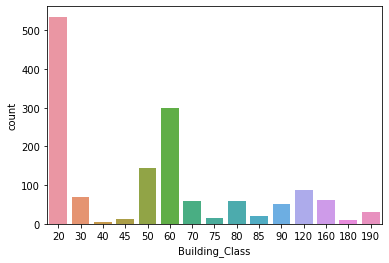

In [75]:
sns.countplot("Building_Class",data=d_tr)

<AxesSubplot:xlabel='Zoning_Class', ylabel='count'>

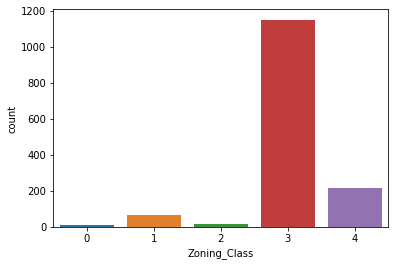

In [76]:
sns.countplot("Zoning_Class",data=d_tr)

# Visualization both of them train and test data sets

<AxesSubplot:xlabel='Sale_Price', ylabel='count'>

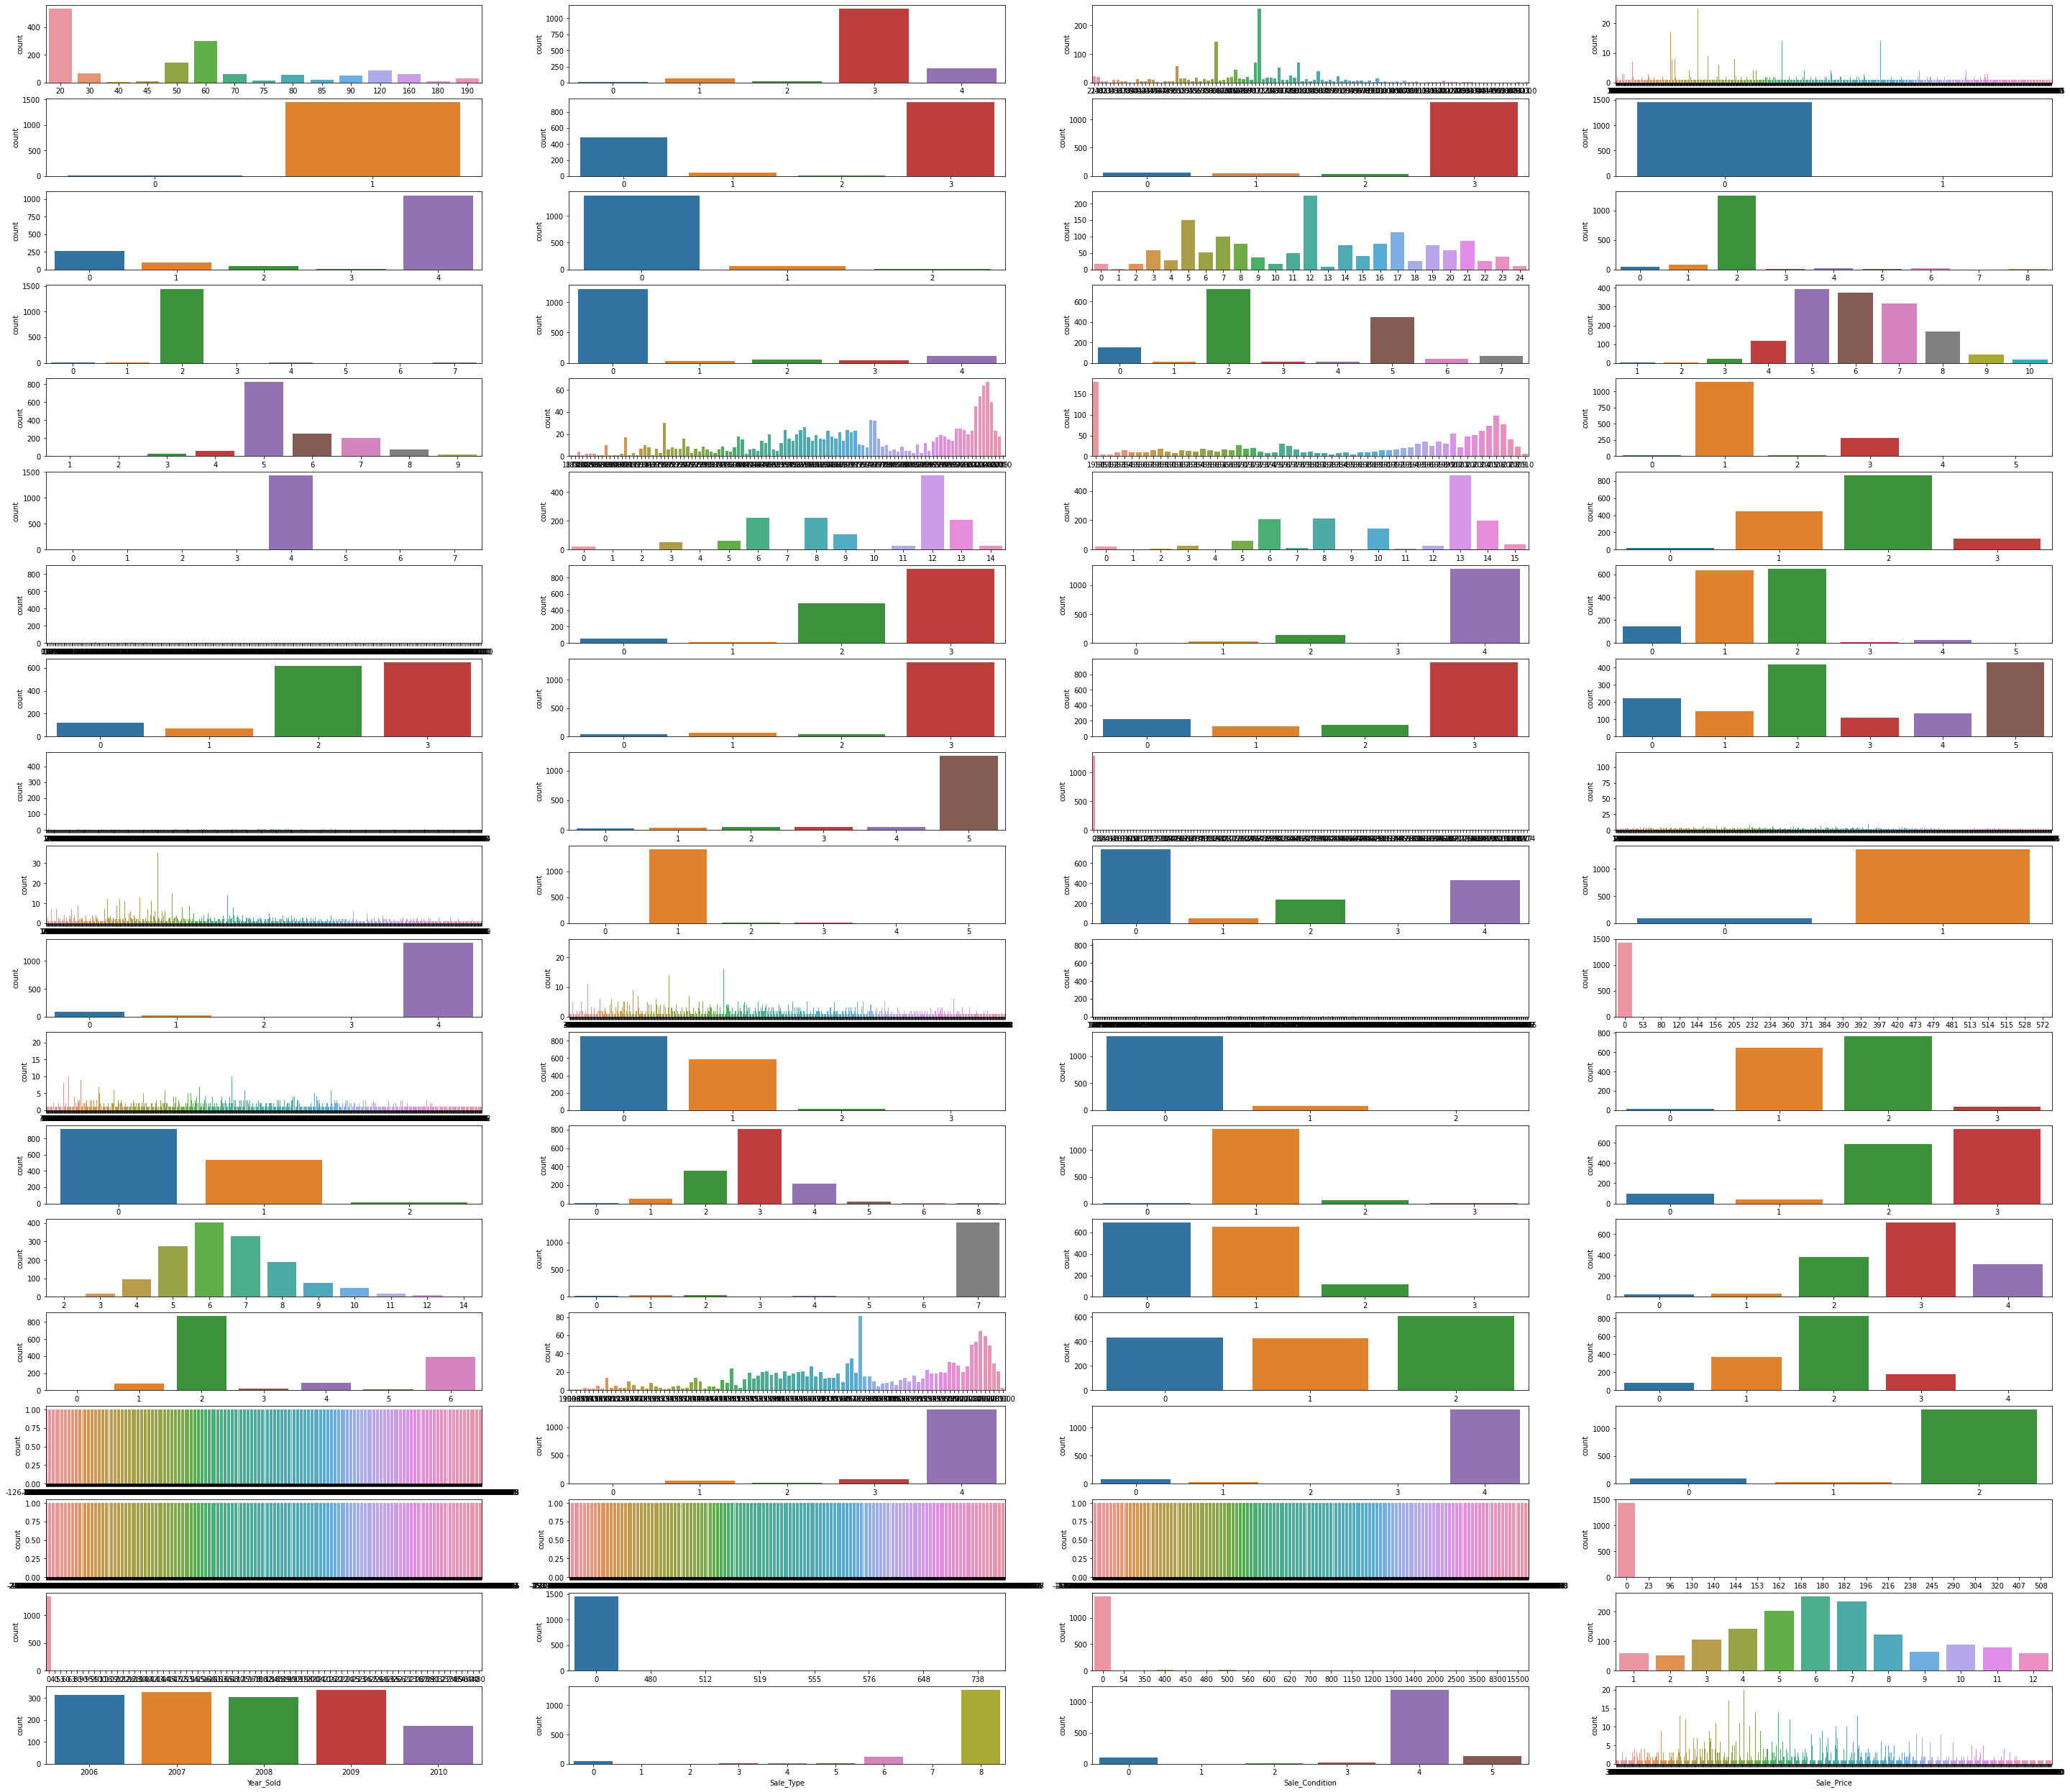

In [74]:
fig,ax=plt.subplots(19,4,figsize=(50,45))
sns.countplot("Building_Class",data=d_tr,ax=ax[0][0])
sns.countplot("Zoning_Class",data=d_tr,ax=ax[0][1])
sns.countplot("Lot_Extent",data=d_tr,ax=ax[0][2])
sns.countplot("Lot_Size",data=d_tr,ax=ax[0][3])
sns.countplot("Road_Type",data=d_tr,ax=ax[1][0])
sns.countplot("Property_Shape",data=d_tr,ax=ax[1][1])
sns.countplot("Land_Outline",data=d_tr,ax=ax[1][2])
sns.countplot("Utility_Type",data=d_tr,ax=ax[1][3])
sns.countplot("Lot_Configuration",data=d_tr,ax=ax[2][0])
sns.countplot("Property_Slope",data=d_tr,ax=ax[2][1])
sns.countplot("Neighborhood",data=d_tr,ax=ax[2][2])
sns.countplot("Condition1",data=d_tr,ax=ax[2][3])
sns.countplot("Condition2",data=d_tr,ax=ax[3][0])
sns.countplot("House_Type",data=d_tr,ax=ax[3][1])
sns.countplot("House_Design",data=d_tr,ax=ax[3][2])
sns.countplot("Overall_Material",data=d_tr,ax=ax[3][3])
sns.countplot("House_Condition",data=d_tr,ax=ax[4][0])
sns.countplot("Construction_Year",data=d_tr,ax=ax[4][1])
sns.countplot("Remodel_Year",data=d_tr,ax=ax[4][2])
sns.countplot("Roof_Design",data=d_tr,ax=ax[4][3])
sns.countplot("Roof_Quality",data=d_tr,ax=ax[5][0])
sns.countplot("Exterior1st",data=d_tr,ax=ax[5][1])
sns.countplot("Exterior2nd",data=d_tr,ax=ax[5][2])
sns.countplot("Brick_Veneer_Type",data=d_tr,ax=ax[5][3])
sns.countplot("Brick_Veneer_Area",data=d_tr,ax=ax[6][0])
sns.countplot("Exterior_Material",data=d_tr,ax=ax[6][1])
sns.countplot("Exterior_Condition",data=d_tr,ax=ax[6][2])
sns.countplot("Foundation_Type",data=d_tr,ax=ax[6][3])
sns.countplot("Basement_Height",data=d_tr,ax=ax[7][0])
sns.countplot("Basement_Condition",data=d_tr,ax=ax[7][1])
sns.countplot("Exposure_Level",data=d_tr,ax=ax[7][2])
sns.countplot("BsmtFinType1",data=d_tr,ax=ax[7][3])
sns.countplot("BsmtFinSF1",data=d_tr,ax=ax[8][0])
sns.countplot("BsmtFinType2",data=d_tr,ax=ax[8][1])
sns.countplot("BsmtFinSF2",data=d_tr,ax=ax[8][2])
sns.countplot("BsmtUnfSF",data=d_tr,ax=ax[8][3])
sns.countplot("Total_Basement_Area",data=d_tr,ax=ax[9][0])
sns.countplot("Heating_Type",data=d_tr,ax=ax[9][1])
sns.countplot("Heating_Quality",data=d_tr,ax=ax[9][2])
sns.countplot("Air_Conditioning",data=d_tr,ax=ax[9][3])
sns.countplot("Electrical_System",data=d_tr,ax=ax[10][0])
sns.countplot("First_Floor_Area",data=d_tr,ax=ax[10][1])
sns.countplot("Second_Floor_Area",data=d_tr,ax=ax[10][2])
sns.countplot("LowQualFinSF",data=d_tr,ax=ax[10][3])
sns.countplot("Grade_Living_Area",data=d_tr,ax=ax[11][0])
sns.countplot("Underground_Full_Bathroom",data=d_tr,ax=ax[11][1])
sns.countplot("Underground_Half_Bathroom",data=d_tr,ax=ax[11][2])
sns.countplot("Full_Bathroom_Above_Grade",data=d_tr,ax=ax[11][3])
sns.countplot("Half_Bathroom_Above_Grade",data=d_tr,ax=ax[12][0])
sns.countplot("Bedroom_Above_Grade",data=d_tr,ax=ax[12][1])
sns.countplot("Kitchen_Above_Grade",data=d_tr,ax=ax[12][2])
sns.countplot("Kitchen_Quality",data=d_tr,ax=ax[12][3])
sns.countplot("Rooms_Above_Grade",data=d_tr,ax=ax[13][0])
sns.countplot("Functional_Rate",data=d_tr,ax=ax[13][1])
sns.countplot("Fireplaces",data=d_tr,ax=ax[13][2])
sns.countplot("Fireplace_Quality",data=d_tr,ax=ax[13][3])
sns.countplot("Garage",data=d_tr,ax=ax[14][0])
sns.countplot("Garage_Built_Year",data=d_tr,ax=ax[14][1])
sns.countplot("Garage_Finish_Year",data=d_tr,ax=ax[14][2])
sns.countplot("Garage_Size",data=d_tr,ax=ax[14][3])
sns.countplot("Garage_Area",data=d_tr,ax=ax[15][0])
sns.countplot("Garage_Quality",data=d_tr,ax=ax[15][1])
sns.countplot("Garage_Condition",data=d_tr,ax=ax[15][2])
sns.countplot("Pavedd_Drive",data=d_tr,ax=ax[15][3])
sns.countplot("W_Deck_Area",data=d_tr,ax=ax[16][0])
sns.countplot("Open_Lobby_Area",data=d_tr,ax=ax[16][1])
sns.countplot("Enclosed_Lobby_Area",data=d_tr,ax=ax[16][2])
sns.countplot("Three_Season_Lobby_Area",data=d_tr,ax=ax[16][3])
sns.countplot("Screen_Lobby_Area",data=d_tr,ax=ax[17][0])
sns.countplot("Pool_Area",data=d_tr,ax=ax[17][1])
sns.countplot("Miscellaneous_Value",data=d_tr,ax=ax[17][2])
sns.countplot("Month_Sold",data=d_tr,ax=ax[17][3])
sns.countplot("Year_Sold",data=d_tr,ax=ax[18][0])
sns.countplot("Sale_Type",data=d_tr,ax=ax[18][1])
sns.countplot("Sale_Condition",data=d_tr,ax=ax[18][2])
sns.countplot("Sale_Price",data=d_tr,ax=ax[18][3])

<AxesSubplot:xlabel='Sale_Condition', ylabel='count'>

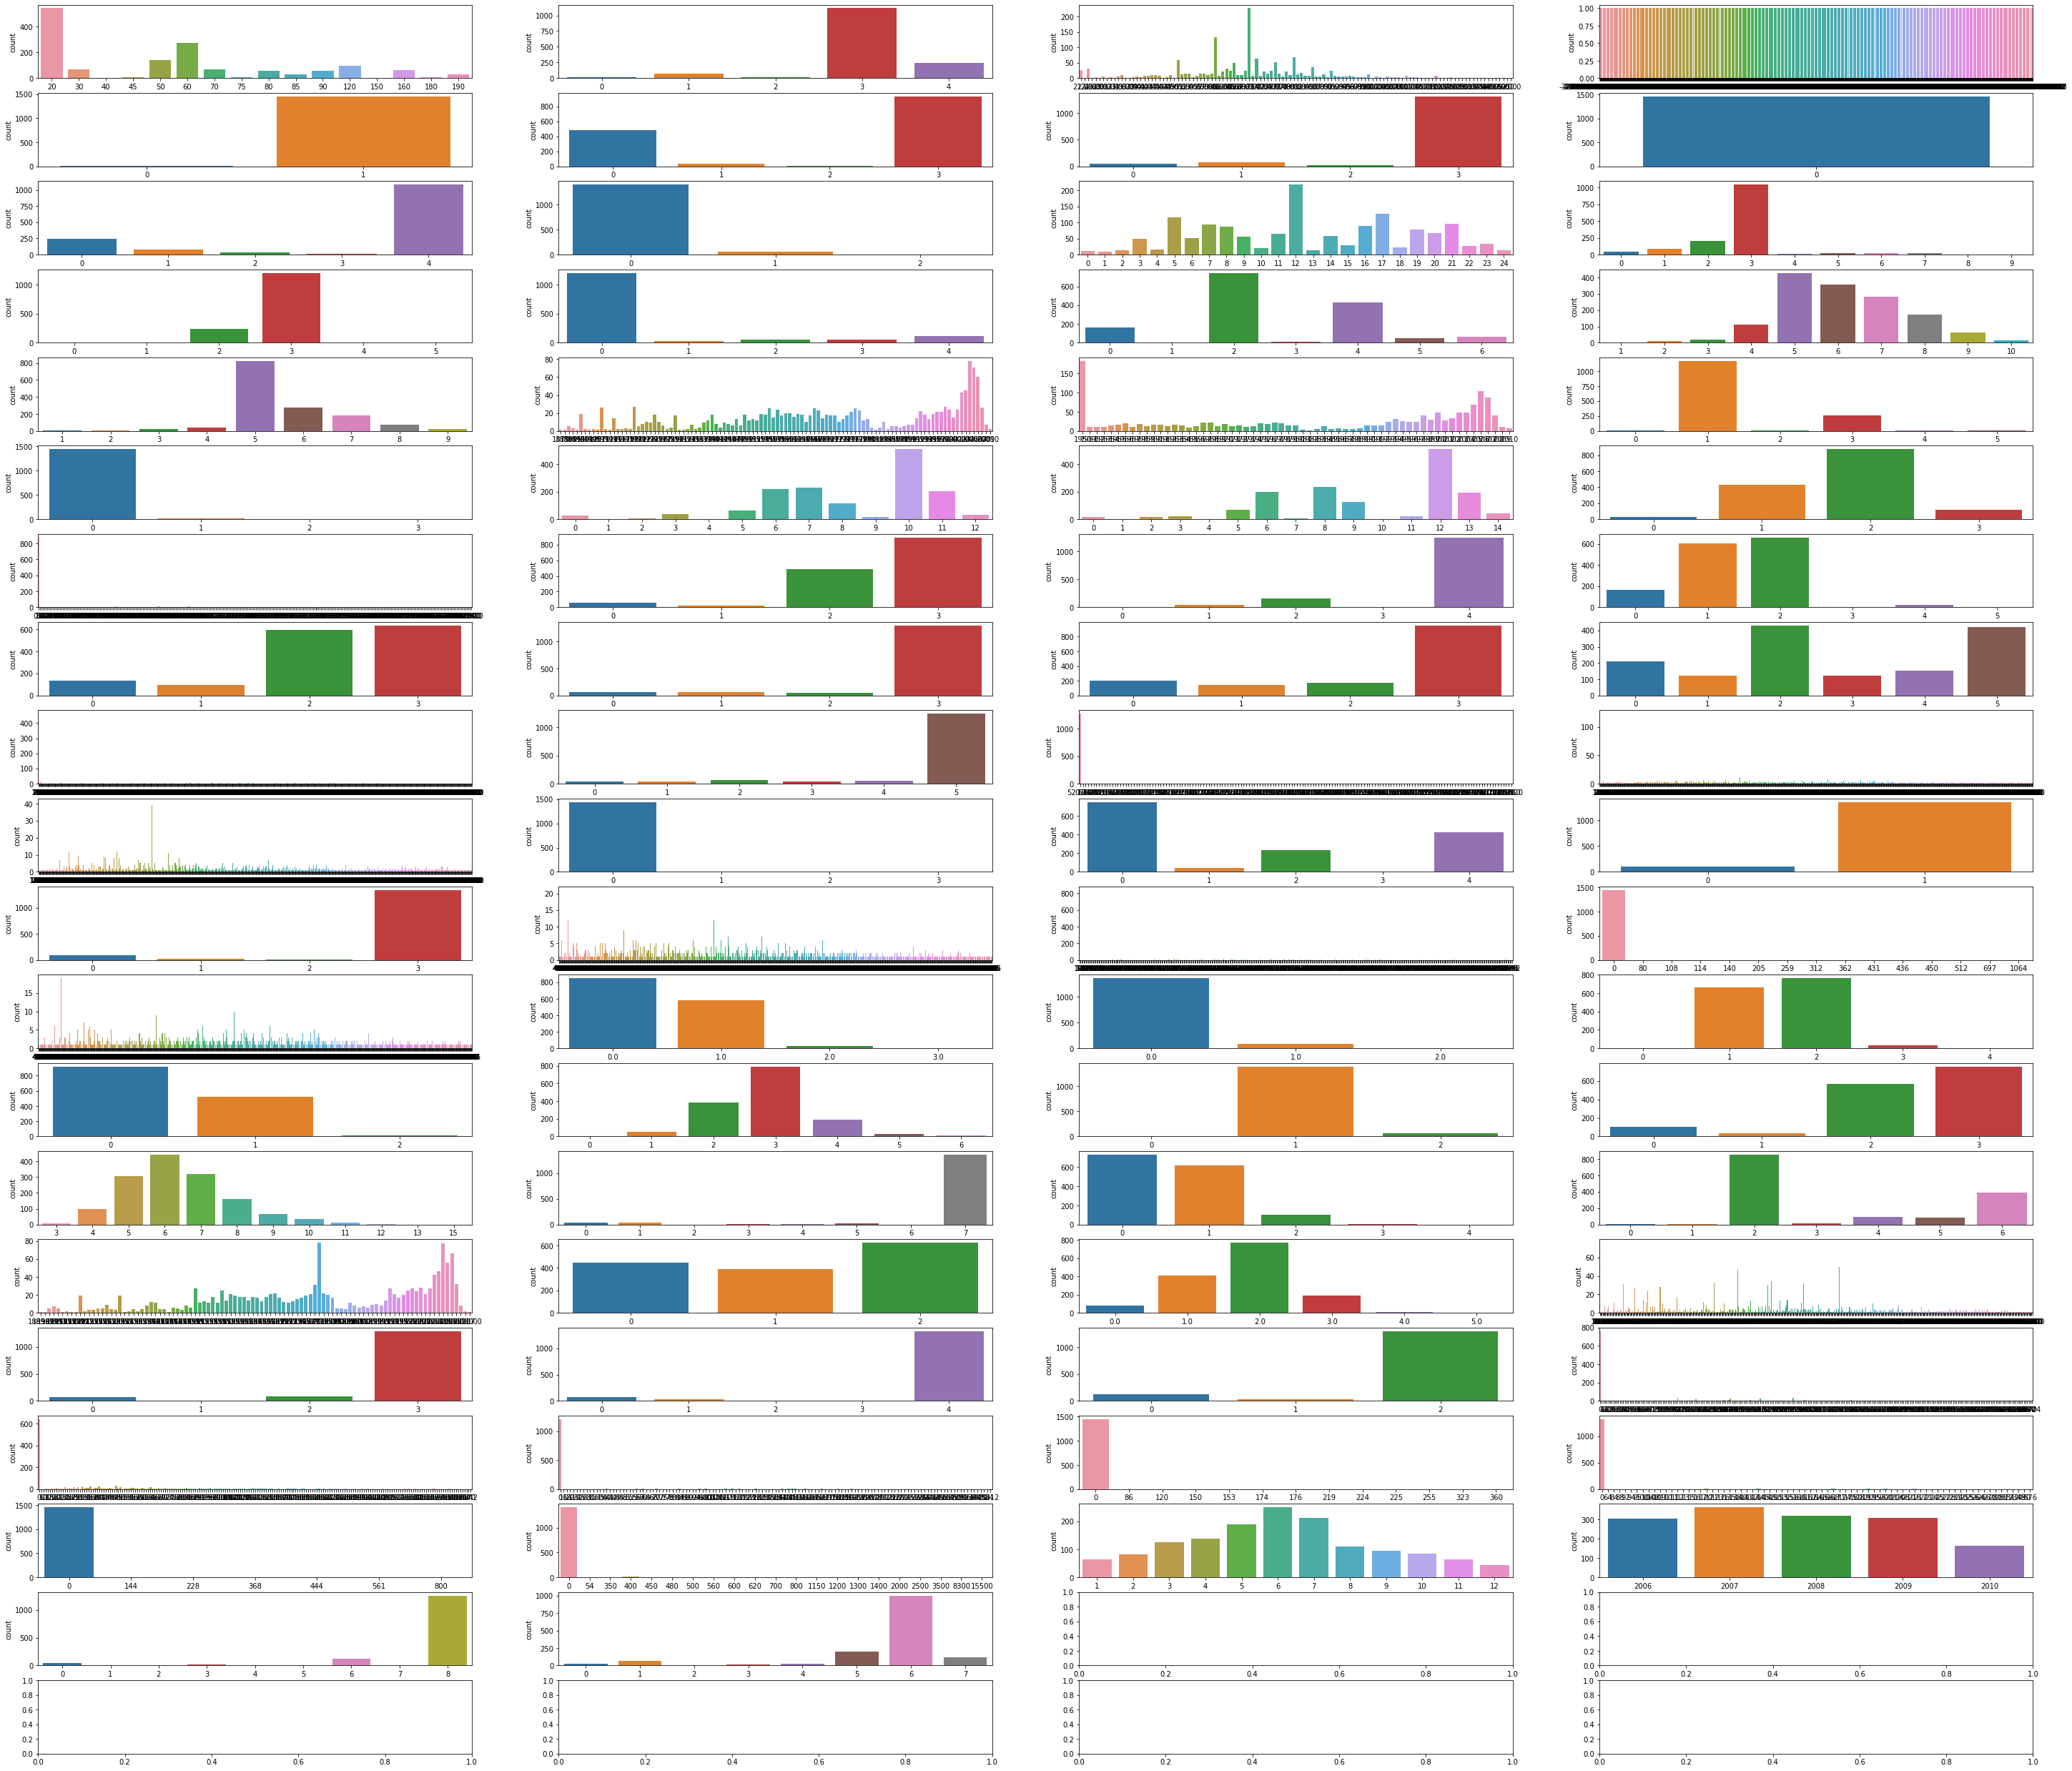

In [75]:
fig,ax=plt.subplots(20,4,figsize=(50,45))
sns.countplot("Building_Class",data=d_ts,ax=ax[0][0])
sns.countplot("Zoning_Class",data=d_ts,ax=ax[0][1])
sns.countplot("Lot_Extent",data=d_ts,ax=ax[0][2])
sns.countplot("Lot_Size",data=d_ts,ax=ax[0][3])
sns.countplot("Road_Type",data=d_ts,ax=ax[1][0])
sns.countplot("Property_Shape",data=d_ts,ax=ax[1][1])
sns.countplot("Land_Outline",data=d_ts,ax=ax[1][2])
sns.countplot("Utility_Type",data=d_ts,ax=ax[1][3])
sns.countplot("Lot_Configuration",data=d_ts,ax=ax[2][0])
sns.countplot("Property_Slope",data=d_ts,ax=ax[2][1])
sns.countplot("Neighborhood",data=d_ts,ax=ax[2][2])
sns.countplot("Condition1",data=d_ts,ax=ax[2][3])
sns.countplot("Condition2",data=d_ts,ax=ax[3][0])
sns.countplot("House_Type",data=d_ts,ax=ax[3][1])
sns.countplot("House_Design",data=d_ts,ax=ax[3][2])
sns.countplot("Overall_Material",data=d_ts,ax=ax[3][3])
sns.countplot("House_Condition",data=d_ts,ax=ax[4][0])
sns.countplot("Construction_Year",data=d_ts,ax=ax[4][1])
sns.countplot("Remodel_Year",data=d_ts,ax=ax[4][2])
sns.countplot("Roof_Design",data=d_ts,ax=ax[4][3])
sns.countplot("Roof_Quality",data=d_ts,ax=ax[5][0])
sns.countplot("Exterior1st",data=d_ts,ax=ax[5][1])
sns.countplot("Exterior2nd",data=d_ts,ax=ax[5][2])
sns.countplot("Brick_Veneer_Type",data=d_ts,ax=ax[5][3])
sns.countplot("Brick_Veneer_Area",data=d_ts,ax=ax[6][0])
sns.countplot("Exterior_Material",data=d_ts,ax=ax[6][1])
sns.countplot("Exterior_Condition",data=d_ts,ax=ax[6][2])
sns.countplot("Foundation_Type",data=d_ts,ax=ax[6][3])
sns.countplot("Basement_Height",data=d_ts,ax=ax[7][0])
sns.countplot("Basement_Condition",data=d_ts,ax=ax[7][1])
sns.countplot("Exposure_Level",data=d_ts,ax=ax[7][2])
sns.countplot("BsmtFinType1",data=d_ts,ax=ax[7][3])
sns.countplot("BsmtFinSF1",data=d_ts,ax=ax[8][0])
sns.countplot("BsmtFinType2",data=d_ts,ax=ax[8][1])
sns.countplot("BsmtFinSF2",data=d_ts,ax=ax[8][2])
sns.countplot("BsmtUnfSF",data=d_ts,ax=ax[8][3])
sns.countplot("Total_Basement_Area",data=d_ts,ax=ax[9][0])
sns.countplot("Heating_Type",data=d_ts,ax=ax[9][1])
sns.countplot("Heating_Quality",data=d_ts,ax=ax[9][2])
sns.countplot("Air_Conditioning",data=d_ts,ax=ax[9][3])
sns.countplot("Electrical_System",data=d_ts,ax=ax[10][0])
sns.countplot("First_Floor_Area",data=d_ts,ax=ax[10][1])
sns.countplot("Second_Floor_Area",data=d_ts,ax=ax[10][2])
sns.countplot("LowQualFinSF",data=d_ts,ax=ax[10][3])
sns.countplot("Grade_Living_Area",data=d_ts,ax=ax[11][0])
sns.countplot("Underground_Full_Bathroom",data=d_ts,ax=ax[11][1])
sns.countplot("Underground_Half_Bathroom",data=d_ts,ax=ax[11][2])
sns.countplot("Full_Bathroom_Above_Grade",data=d_ts,ax=ax[11][3])
sns.countplot("Half_Bathroom_Above_Grade",data=d_ts,ax=ax[12][0])
sns.countplot("Bedroom_Above_Grade",data=d_ts,ax=ax[12][1])
sns.countplot("Kitchen_Above_Grade",data=d_ts,ax=ax[12][2])
sns.countplot("Kitchen_Quality",data=d_ts,ax=ax[12][3])
sns.countplot("Rooms_Above_Grade",data=d_ts,ax=ax[13][0])
sns.countplot("Functional_Rate",data=d_ts,ax=ax[13][1])
sns.countplot("Fireplaces",data=d_ts,ax=ax[13][2])
sns.countplot("Garage",data=d_ts,ax=ax[13][3])
sns.countplot("Garage_Built_Year",data=d_ts,ax=ax[14][0])
sns.countplot("Garage_Finish_Year",data=d_ts,ax=ax[14][1])
sns.countplot("Garage_Size",data=d_ts,ax=ax[14][2])
sns.countplot("Garage_Area",data=d_ts,ax=ax[14][3])
sns.countplot("Garage_Quality",data=d_ts,ax=ax[15][0])
sns.countplot("Garage_Condition",data=d_ts,ax=ax[15][1])
sns.countplot("Pavedd_Drive",data=d_ts,ax=ax[15][2])
sns.countplot("W_Deck_Area",data=d_ts,ax=ax[15][3])
sns.countplot("Open_Lobby_Area",data=d_ts,ax=ax[16][0])
sns.countplot("Enclosed_Lobby_Area",data=d_ts,ax=ax[16][1])
sns.countplot("Three_Season_Lobby_Area",data=d_ts,ax=ax[16][2])
sns.countplot("Screen_Lobby_Area",data=d_ts,ax=ax[16][3])
sns.countplot("Pool_Area",data=d_ts,ax=ax[17][0])
sns.countplot("Miscellaneous_Value",data=d_tr,ax=ax[17][1])
sns.countplot("Month_Sold",data=d_ts,ax=ax[17][2])
sns.countplot("Year_Sold",data=d_ts,ax=ax[17][3])
sns.countplot("Sale_Type",data=d_ts,ax=ax[18][0])
sns.countplot("Sale_Condition",data=d_ts,ax=ax[18][1])


In [76]:
d_tr=d_tr.drop_duplicates()
d_ts=d_ts.drop_duplicates()

In [77]:
d_tr.shape,d_ts.shape

((1459, 76), (1459, 75))

In [78]:
d_tr.shape

(1459, 76)

# correlation and heatmap

In [80]:
d=d_tr.corr()

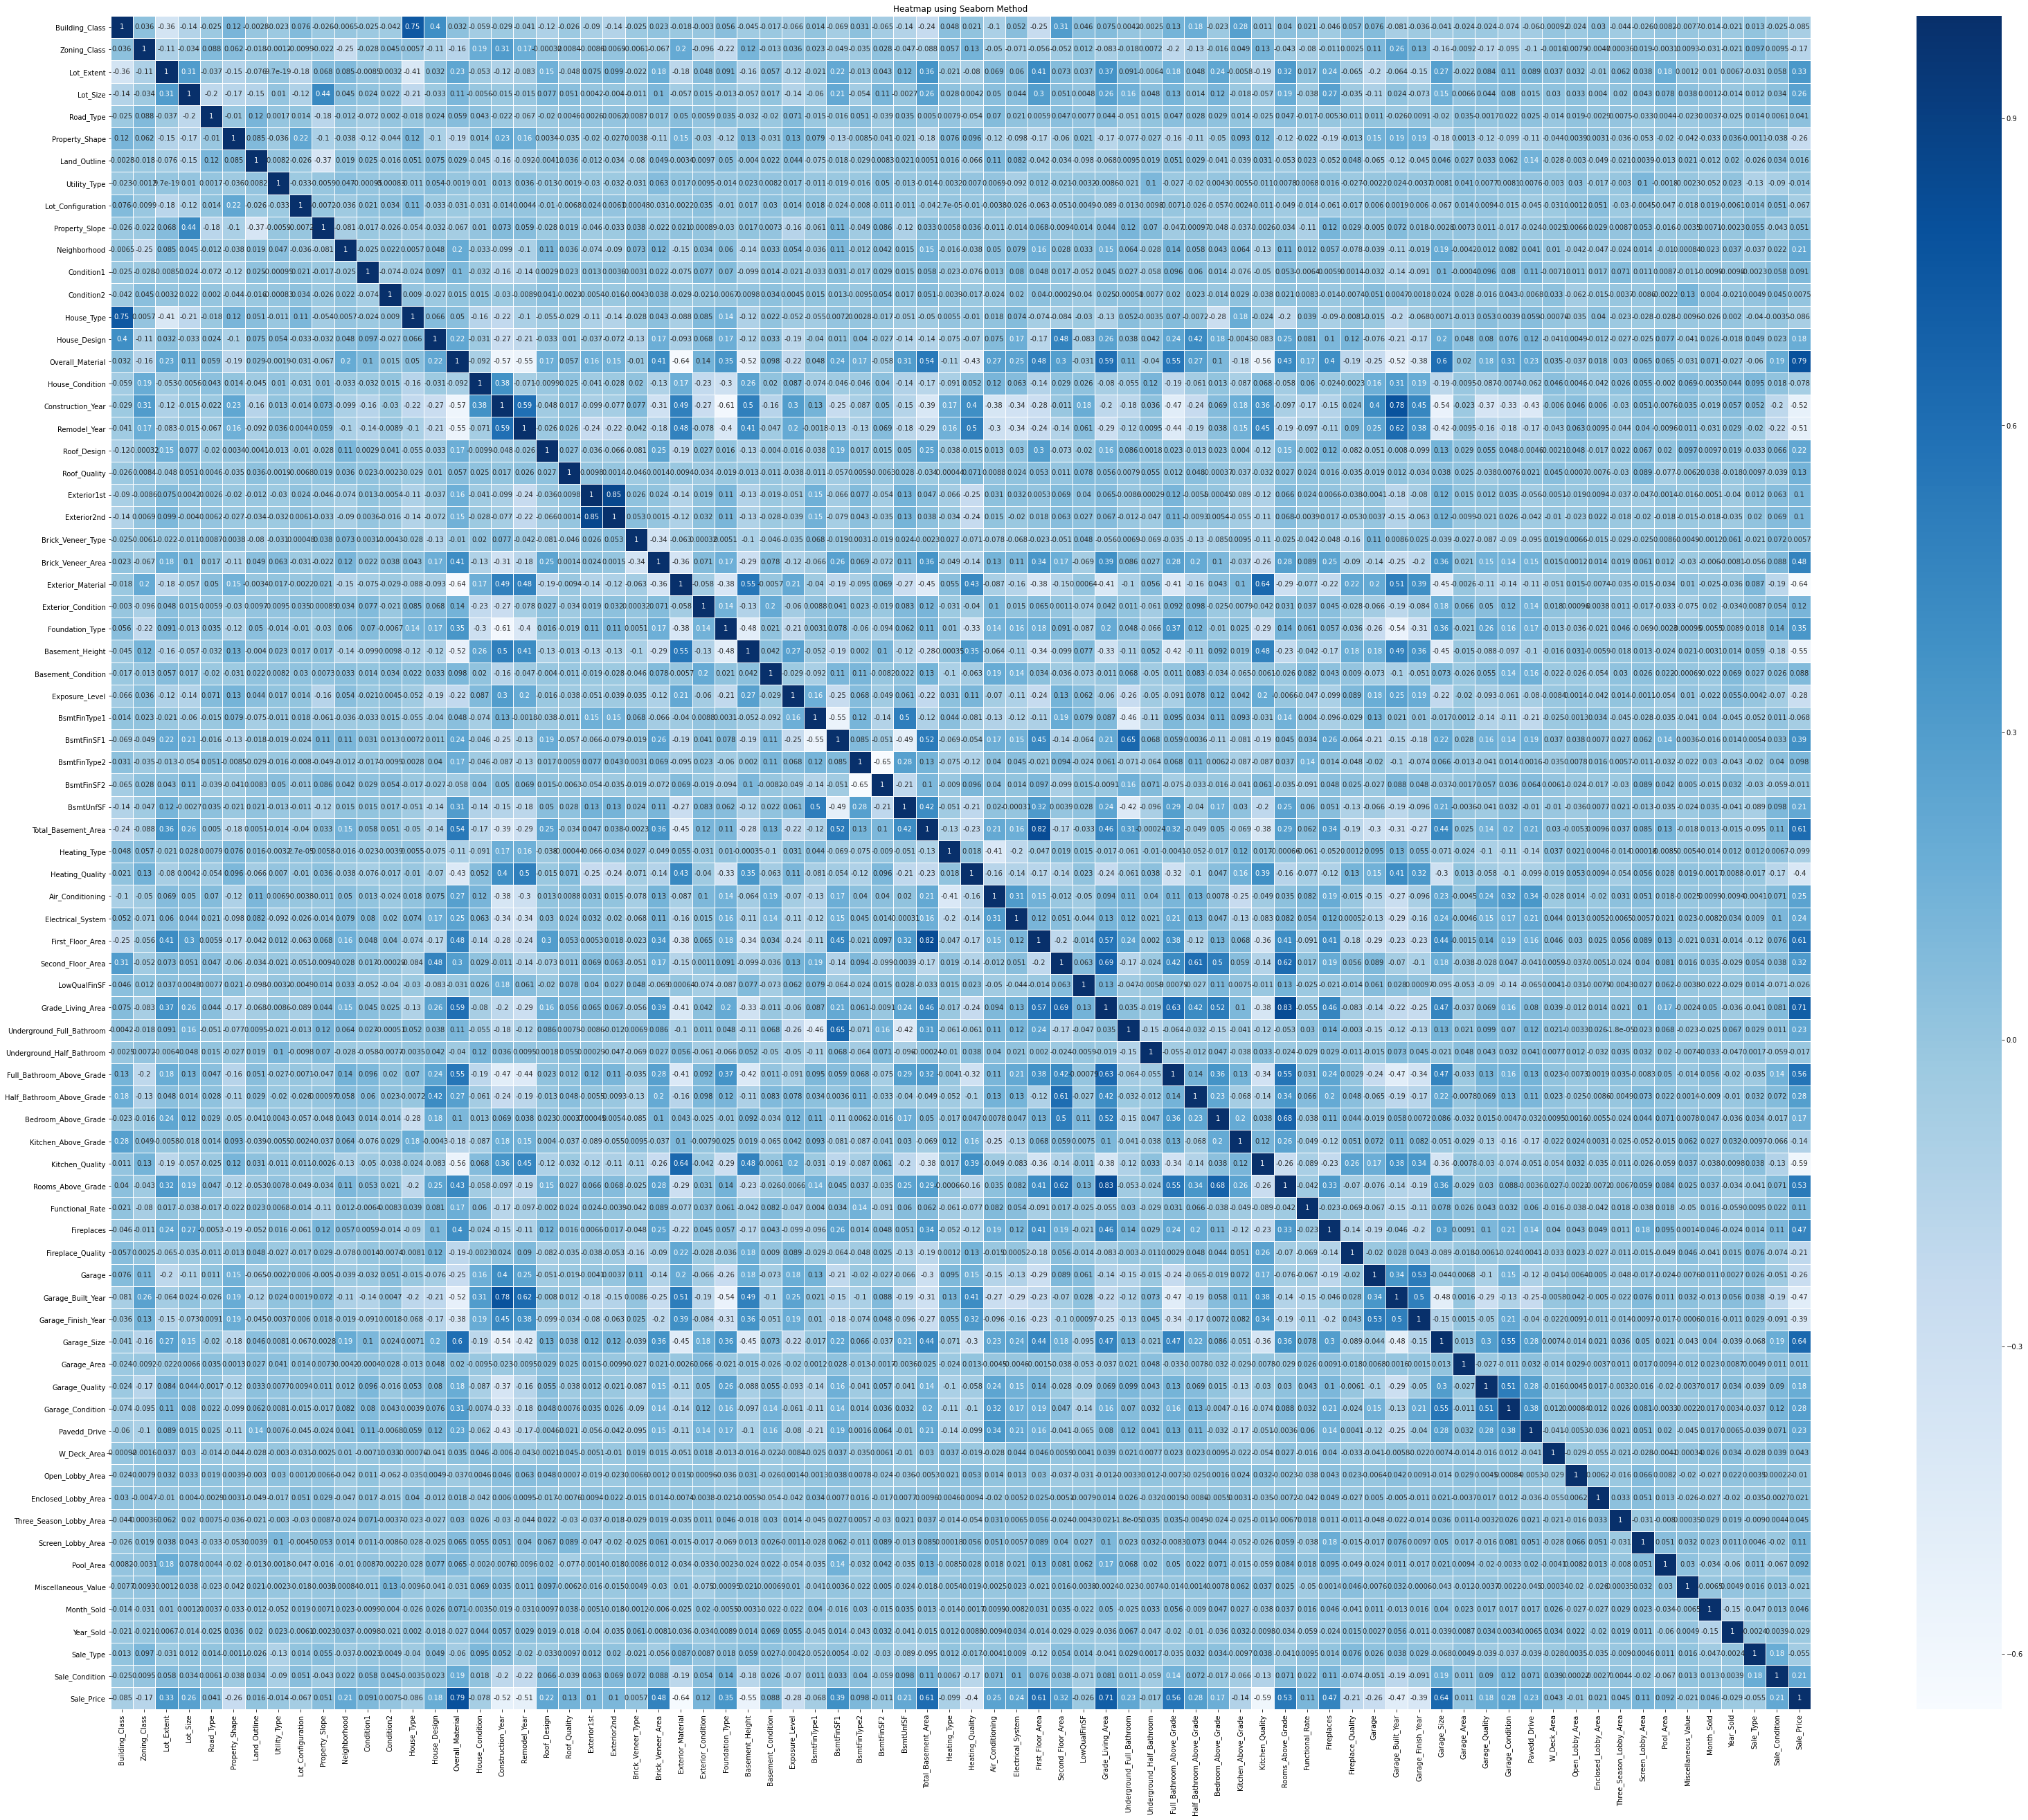

In [81]:
plt.figure(figsize=(55,45))
heatmap=sns.heatmap(d,linewidth=1,annot=True,cmap=plt.cm.Blues)
plt.title("Heatmap using Seaborn Method")
plt.show()

# outler detection using  Boxplot,IQR and SD method

In [79]:
d_tr[continuous_feature].describe()

Lot_Extent       Lot_Size  Brick_Veneer_Area   BsmtFinSF1  \
count  1459.000000    1459.000000         1459.00000  1459.000000   
mean     70.045833   10517.225497          103.75672   443.374914   
std      22.031192    9984.675721          180.61060   456.142186   
min      21.000000    1300.000000            0.00000     0.000000   
25%      60.000000    7549.000000            0.00000     0.000000   
50%      70.045833    9477.000000            0.00000   383.000000   
75%      79.000000   11603.000000          164.50000   712.000000   
max     313.000000  215245.000000         1600.00000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  Total_Basement_Area  First_Floor_Area  \
count  1459.000000  1459.000000          1459.000000       1459.000000   
mean     46.382454   567.535984          1057.293352       1162.562714   
std     161.248500   441.874057           438.824912        386.712553   
min       0.000000     0.000000             0.000000        334.000000   
25%       0.000000   223.500000           795.500000        882.000000   
50%       0.000000   479.000000           991.000000       1086.000000   
75%       0.000000   808.000000          1298.500000       1391.500000   
max    1474.000000  2336.000000          6110.000000       4692.000000   

       Second_Floor_Area  Grade_Living_Area  Garage_Area  W_Deck_Area  \
count        1459.000000        1459.000000  1459.000000  1459.000000   
mean          347.230295        1515.641535   470.934787    93.015667   
std           436.583480         525.616607   210.668787   124.796682   
min             0.000000         334.000000  -129.369350  -338.112031   
25%             0.000000        1129.000000   329.290489     9.656026   
50%             0.000000        1464.000000   471.028116    92.803628   
75%           728.000000        1777.500000   607.184977   180.335986   
max          2065.000000        5642.000000  1147.488093   572.298709   

       Open_Lobby_Area  Enclosed_Lobby_Area  Screen_Lobby_Area     Sale_Price  
count      1459.000000          1459.000000        1459.000000    1459.000000  
mean         47.811902            24.580227          15.071282  180944.102810  
std          67.467586            61.353507          55.775138   79464.918335  
min        -187.149958          -164.807386           0.000000   34900.000000  
25%           1.843186           -16.807302           0.000000  129950.000000  
50%          46.837919            25.026953           0.000000  163000.000000  
75%          96.523486            66.237591           0.000000  214000.000000  
max         255.362547           225.762714         480.000000  755000.000000

<AxesSubplot:>

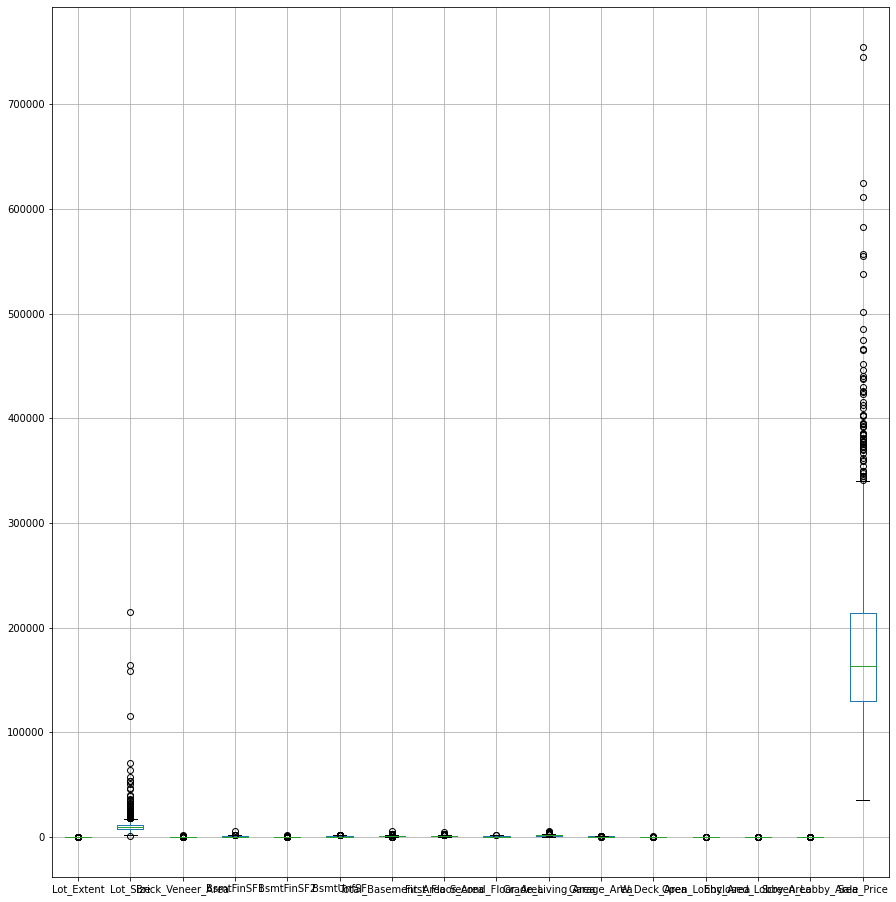

In [80]:
d_tr[continuous_feature].boxplot(figsize=(15,16))

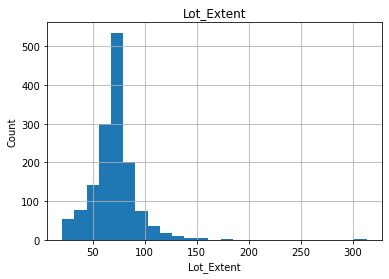

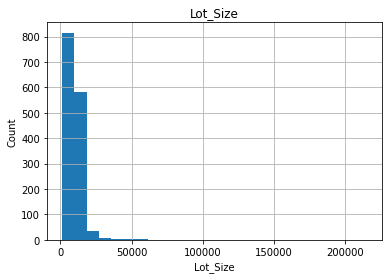

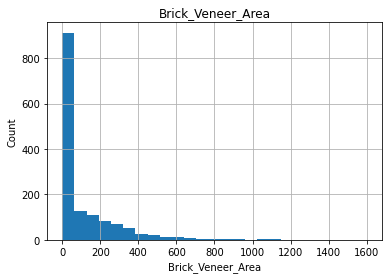

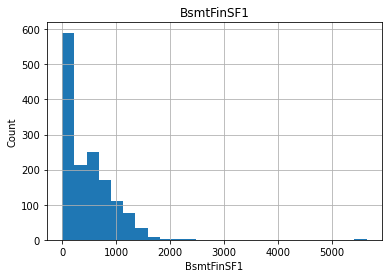

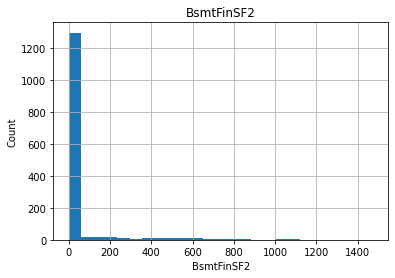

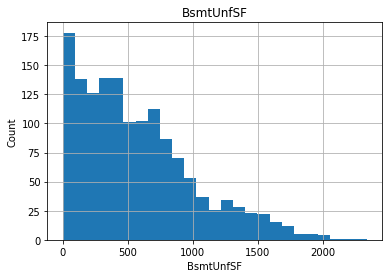

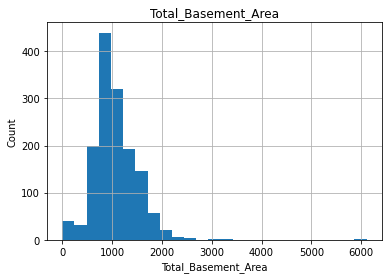

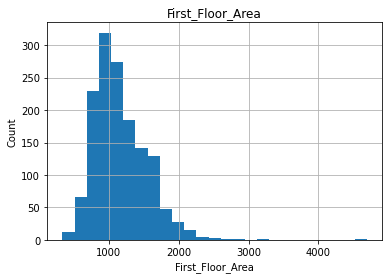

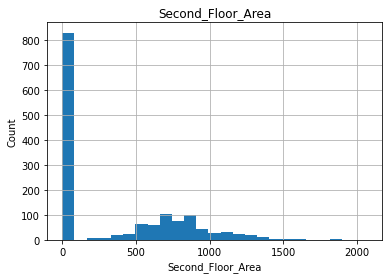

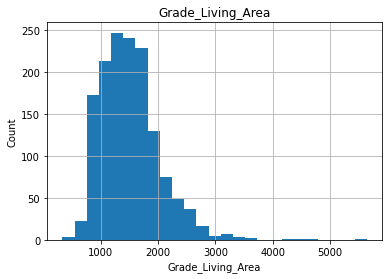

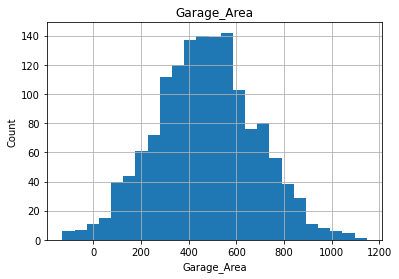

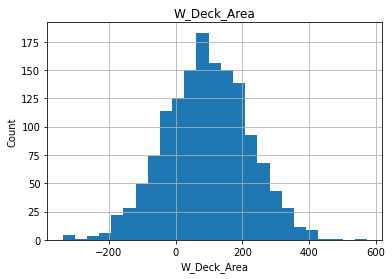

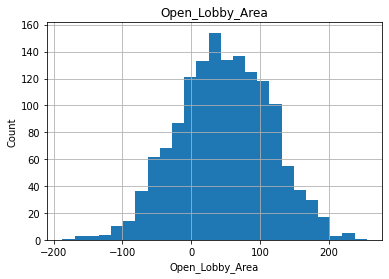

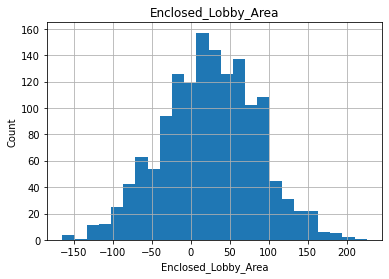

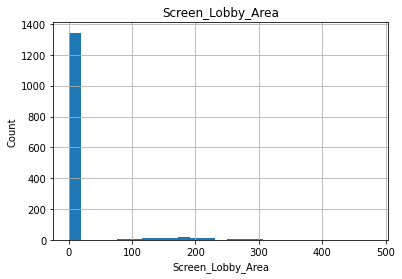

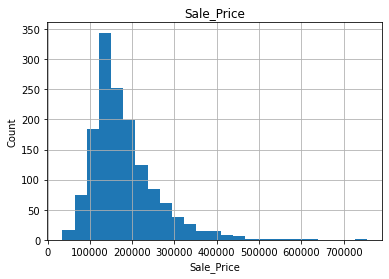

In [81]:
for feature in continuous_feature:
    data=d_tr.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

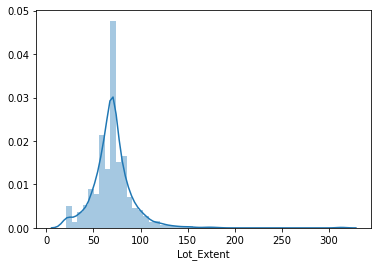

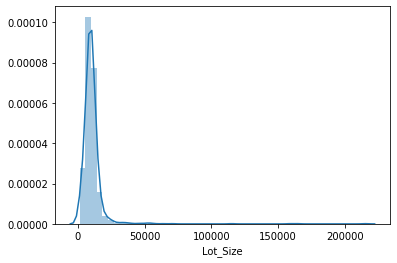

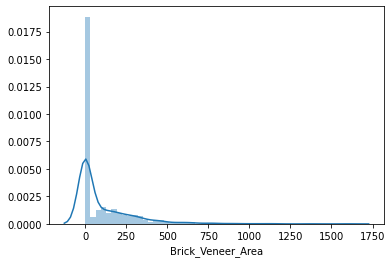

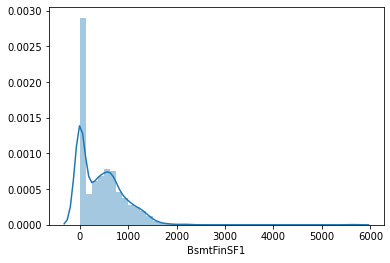

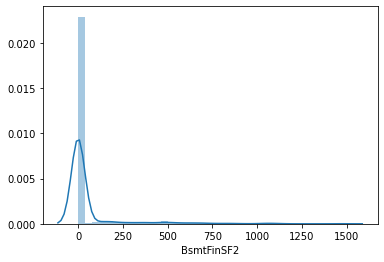

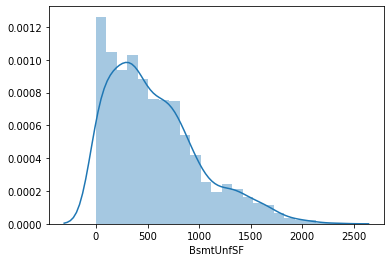

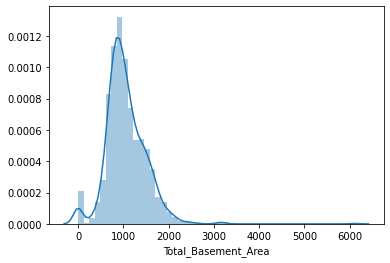

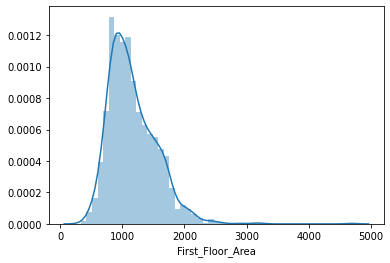

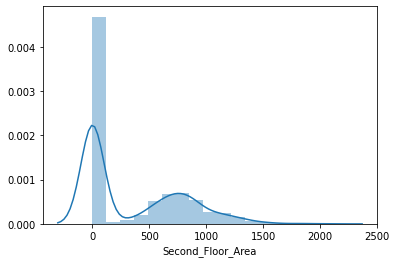

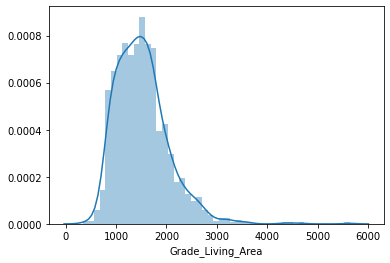

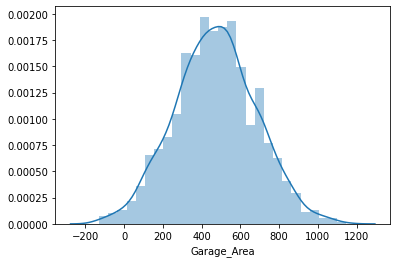

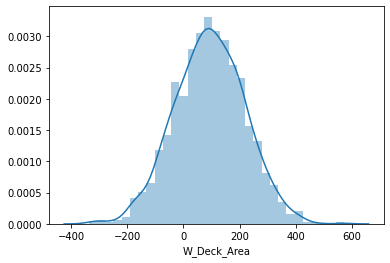

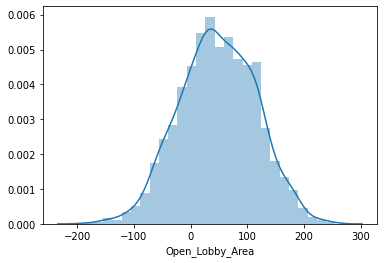

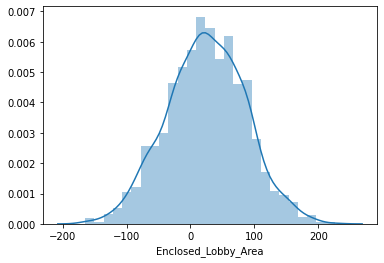

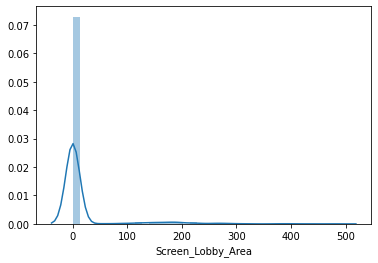

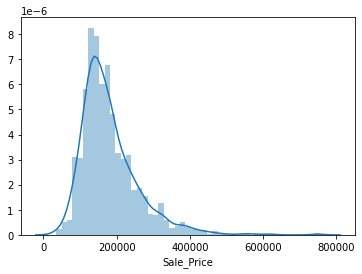

In [82]:
for feature in continuous_feature:
    data=d_tr.copy() 
    plt.figure()
    sns.distplot(data[feature])
    plt.show()

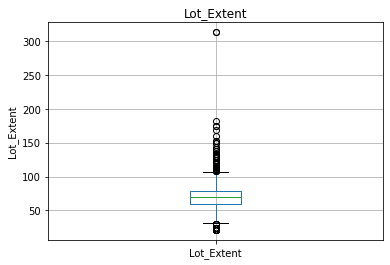

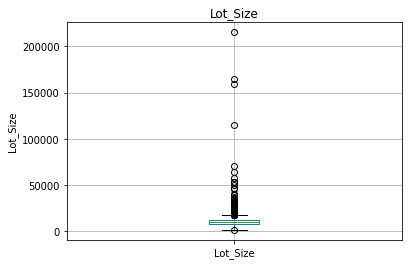

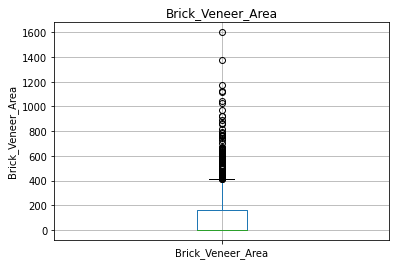

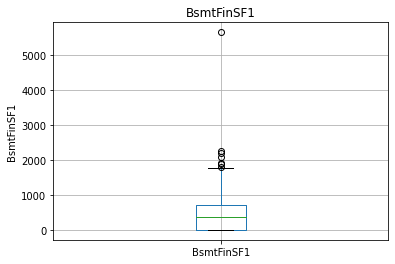

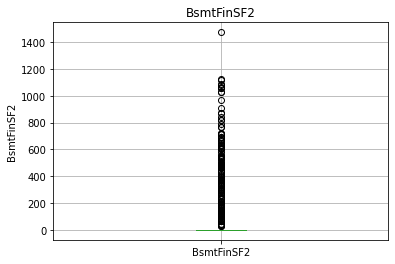

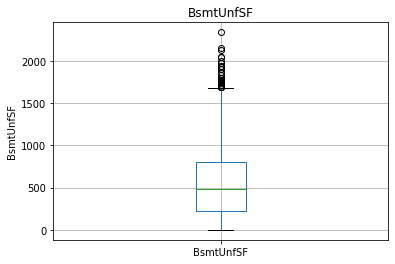

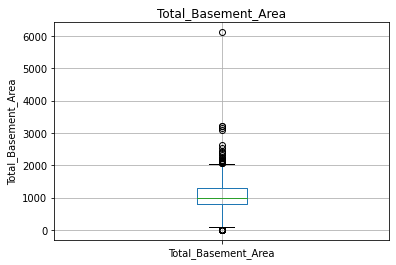

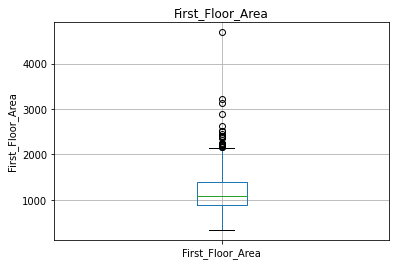

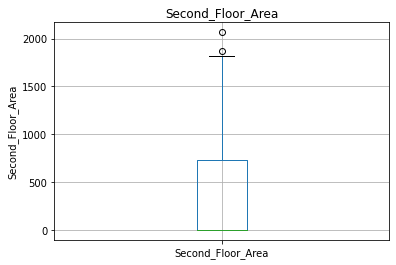

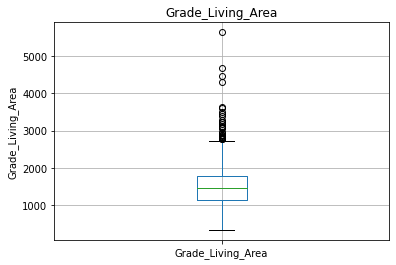

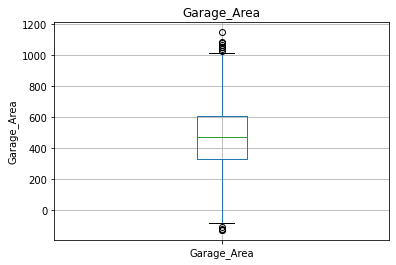

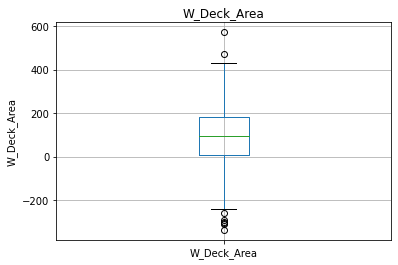

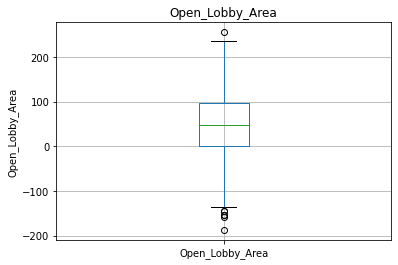

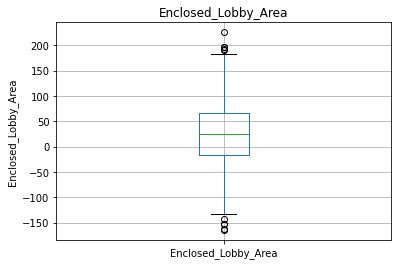

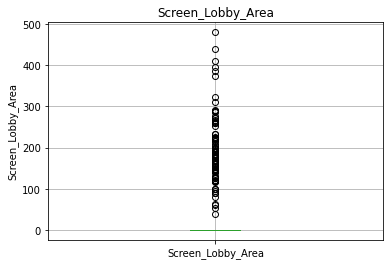

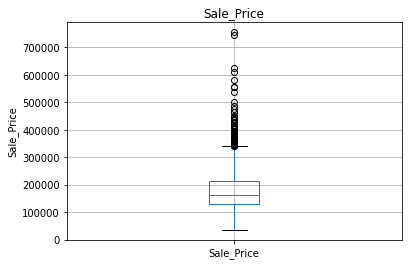

In [83]:
for feature in continuous_feature:
    data=d_tr.copy()       
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [84]:
continuous_feature

['Lot_Extent',
 'Lot_Size',
 'Brick_Veneer_Area',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'Total_Basement_Area',
 'First_Floor_Area',
 'Second_Floor_Area',
 'Grade_Living_Area',
 'Garage_Area',
 'W_Deck_Area',
 'Open_Lobby_Area',
 'Enclosed_Lobby_Area',
 'Screen_Lobby_Area',
 'Sale_Price']

In [85]:
d_tr.Lot_Extent.value_counts()
d_tr.Lot_Size.value_counts()
d_tr.Brick_Veneer_Area.value_counts()
d_tr.BsmtFinSF1.value_counts()
d_tr.BsmtUnfSF.value_counts()
d_tr.Total_Basement_Area.value_counts()
d_tr.First_Floor_Area.value_counts()
d_tr.Second_Floor_Area.value_counts()
d_tr.Grade_Living_Area.value_counts()
d_tr.Garage_Area.value_counts()
d_tr.W_Deck_Area.value_counts()
d_tr.Open_Lobby_Area.value_counts()
d_tr.Enclosed_Lobby_Area.value_counts()
d_tr.Sale_Price.value_counts()



140000    20
135000    17
145000    14
155000    14
190000    13
110000    13
160000    12
115000    12
139000    11
130000    11
125000    10
143000    10
185000    10
180000    10
144000    10
175000     9
147000     9
100000     9
127000     9
165000     8
176000     8
170000     8
129000     8
230000     8
250000     8
200000     8
141000     8
215000     8
148000     7
173000     7
119000     7
128000     7
178000     7
120000     7
181000     7
112000     7
235000     7
174000     7
189000     6
239000     6
152000     6
187500     6
157000     6
240000     6
205000     6
132000     6
113000     6
127500     6
118000     6
108000     6
260000     6
158000     6
225000     6
137500     6
132500     6
133000     6
124000     6
137000     5
172500     5
207500     5
275000     5
105000     5
136500     5
177000     5
290000     5
179900     5
192000     5
214000     5
154000     5
220000     5
210000     5
151000     5
171000     5
184000     4
280000     4
128500     4
315000     4

In [86]:
iqr1=d_tr["Lot_Extent"].quantile(0.75)-d_tr["Lot_Extent"].quantile(0.25)
iqr1

19.0

In [87]:
iqr2=d_tr["Lot_Size"].quantile(0.75)-d_tr["Lot_Size"].quantile(0.25)
iqr2

4054.0

In [88]:
iqr3=d_tr["Brick_Veneer_Area"].quantile(0.75)-d_tr["Brick_Veneer_Area"].quantile(0.25)
iqr3

164.5

In [89]:
iqr4=d_tr["BsmtFinSF1"].quantile(0.75)-d_tr["BsmtFinSF1"].quantile(0.25)
iqr4

712.0

In [90]:
iqr5=d_tr["BsmtUnfSF"].quantile(0.75)-d_tr["BsmtUnfSF"].quantile(0.25)
iqr5

584.5

In [91]:
iqr6=d_tr["Total_Basement_Area"].quantile(0.75)-d_tr["Total_Basement_Area"].quantile(0.25)
iqr6

503.0

In [92]:
iqr7=d_tr["First_Floor_Area"].quantile(0.75)-d_tr["First_Floor_Area"].quantile(0.25)
iqr7

509.5

In [93]:
iqr8=d_tr["Second_Floor_Area"].quantile(0.75)-d_tr["Second_Floor_Area"].quantile(0.25)
iqr8

728.0

In [94]:
iqr9=d_tr["Grade_Living_Area"].quantile(0.75)-d_tr["Grade_Living_Area"].quantile(0.25)
iqr9

648.5

In [95]:
iqr14=d_tr["Sale_Price"].quantile(0.75)-d_tr["Sale_Price"].quantile(0.25)
iqr14

84050.0

In [96]:
up1=d_tr["Lot_Extent"].quantile(0.75)+(3*iqr1)
lw1=d_tr["Lot_Extent"].quantile(0.25)-(3*iqr1)
print(up1,lw1)

136.0 3.0


In [97]:
up2=d_tr["Lot_Size"].quantile(0.75)+(3*iqr2)
lw2=d_tr["Lot_Size"].quantile(0.25)-(3*iqr2)
print(up2,lw2)

23765.0 -4613.0


In [98]:
up3=d_tr["Brick_Veneer_Area"].quantile(0.75)+(3*iqr3)
lw3=d_tr["Brick_Veneer_Area"].quantile(0.25)-(3*iqr3)
print(up3,lw3)

658.0 -493.5


In [99]:
up4=d_tr["BsmtFinSF1"].quantile(0.75)+(3*iqr4)
lw4=d_tr["BsmtFinSF1"].quantile(0.25)-(3*iqr4)
print(up4,lw4)

2848.0 -2136.0


In [100]:
up5=d_tr["BsmtUnfSF"].quantile(0.75)+(2.5*iqr5)
lw5=d_tr["BsmtUnfSF"].quantile(0.25)-(2.5*iqr5)
print(up5,lw5)

2269.25 -1237.75


In [101]:
up6=d_tr["First_Floor_Area"].quantile(0.75)+(3*iqr6)
lw6=d_tr["First_Floor_Area"].quantile(0.25)-(3*iqr6)
print(up6,lw6)

2900.5 -627.0


In [102]:
up7=d_tr["First_Floor_Area"].quantile(0.75)+(3*iqr7)
lw7=d_tr["First_Floor_Area"].quantile(0.25)-(3*iqr7)
print(up7,lw7)

2920.0 -646.5


In [103]:
up8=d_tr["Second_Floor_Area"].quantile(0.75)+(1.5*iqr8)
lw8=d_tr["Second_Floor_Area"].quantile(0.25)-(1.5*iqr8)
print(up8,lw8)

1820.0 -1092.0


In [104]:
up9=d_tr["Grade_Living_Area"].quantile(0.75)+(3*iqr9)
lw9=d_tr["Grade_Living_Area"].quantile(0.25)-(3*iqr9)
print(up9,lw9)

3723.0 -816.5


In [105]:
up10=d_tr["Garage_Area"].mean()+3*d_tr["Garage_Area"].std()
lw10=d_tr["Garage_Area"].mean()-3*d_tr["Garage_Area"].std()
print(up10,lw10)

1102.9411493792454 -161.0715751581821


In [106]:
up11=d_tr["W_Deck_Area"].mean()+3*d_tr["W_Deck_Area"].std()
lw11=d_tr["W_Deck_Area"].mean()-3*d_tr["W_Deck_Area"].std()
print(up11,lw11)

467.40571250767766 -281.3743779574993


In [107]:
up12=d_tr["Open_Lobby_Area"].mean()+3*d_tr["Open_Lobby_Area"].std()
lw12=d_tr["Open_Lobby_Area"].mean()-3*d_tr["Open_Lobby_Area"].std()
print(up12,lw12)

250.2146600613432 -154.59085691691965


In [108]:
up13=d_tr["Enclosed_Lobby_Area"].mean()+3*d_tr["Enclosed_Lobby_Area"].std()
lw13=d_tr["Enclosed_Lobby_Area"].mean()-3*d_tr["Enclosed_Lobby_Area"].std()
print(up13,lw13)

208.64074693070367 -159.48029284365353


In [109]:
up14=d_tr["Sale_Price"].quantile(0.75)+(3*iqr14)
lw14=d_tr["Sale_Price"].quantile(0.25)-(3*iqr14)
print(up14,lw14)

466150.0 -122200.0


In [110]:

d_tr.loc[d_tr["Lot_Extent"]>136.0,"Lot_Extent"]=136.0
d_tr.loc[d_tr["Lot_Size"]>23765.0,"Lot_Size"]=23765.0
d_tr.loc[d_tr["Brick_Veneer_Area"]>658.0,"Brick_Veneer_Area"]=658.0
d_tr.loc[d_tr["BsmtFinSF1"]>2848.0,"BsmtFinSF1"]=2848.0
d_tr.loc[d_tr["BsmtUnfSF"]>2269.25,"BsmtUnfSF"]=2269.25
d_tr.loc[d_tr["Total_Basement_Area"]>2807.5,"Total_Basement_Area"]=2807.5
d_tr.loc[d_tr["First_Floor_Area"]>2900.5,"First_Floor_Area"]=2900.5
d_tr.loc[d_tr["Second_Floor_Area"]>1820.0,"Second_Floor_Area"]=1820.0
d_tr.loc[d_tr["Grade_Living_Area"]>3723.0,"Grade_Living_Area"]=3723.0
d_tr.loc[d_tr["Garage_Area"]>1102.9411493792454,"Garage_Area"]=1102.9411493792454
d_tr.loc[d_tr["W_Deck_Area"]>467.40571250767766,"W_Deck_Area"]=467.40571250767766
d_tr.loc[d_tr["Open_Lobby_Area"]>250.2146600613432,"Open_Lobby_Area"]=250.2146600613432
d_tr.loc[d_tr["Enclosed_Lobby_Area"]>208.64074693070367,"Enclosed_Lobby_Area"]=208.64074693070367
d_tr.loc[d_tr["Sale_Price"]>466150.0,"Sale_Price"]=466150.0



In [111]:
d_tr[continuous_feature].describe()

Lot_Extent      Lot_Size  Brick_Veneer_Area   BsmtFinSF1   BsmtFinSF2  \
count  1459.000000   1459.000000        1459.000000  1459.000000  1459.000000   
mean     69.626368   9851.104866          99.262545   441.458533    46.382454   
std      19.535200   4155.307605         160.070671   439.860734   161.248500   
min      21.000000   1300.000000           0.000000     0.000000     0.000000   
25%      60.000000   7549.000000           0.000000     0.000000     0.000000   
50%      70.045833   9477.000000           0.000000   383.000000     0.000000   
75%      79.000000  11603.000000         164.500000   712.000000     0.000000   
max     136.000000  23765.000000         658.000000  2848.000000  1474.000000   

         BsmtUnfSF  Total_Basement_Area  First_Floor_Area  Second_Floor_Area  \
count  1459.000000           1459.00000       1459.000000        1459.000000   
mean    567.490233           1054.06477       1160.947567         347.026731   
std     441.694248            416.43907        376.314433         435.846363   
min       0.000000              0.00000        334.000000           0.000000   
25%     223.500000            795.50000        882.000000           0.000000   
50%     479.000000            991.00000       1086.000000           0.000000   
75%     808.000000           1298.50000       1391.500000         728.000000   
max    2269.250000           2807.50000       2900.500000        1820.000000   

       Grade_Living_Area  Garage_Area  W_Deck_Area  Open_Lobby_Area  \
count        1459.000000  1459.000000  1459.000000      1459.000000   
mean         1512.750514   470.904255    92.940555        47.808373   
std           509.621332   210.573873   124.540609        67.456858   
min           334.000000  -129.369350  -338.112031      -187.149958   
25%          1129.000000   329.290489     9.656026         1.843186   
50%          1464.000000   471.028116    92.803628        46.837919   
75%          1777.500000   607.184977   180.335986        96.523486   
max          3723.000000  1102.941149   467.405713       250.214660   

       Enclosed_Lobby_Area  Screen_Lobby_Area     Sale_Price  
count          1459.000000        1459.000000    1459.000000  
mean             24.568492          15.071282  180050.540096  
std              61.316625          55.775138   75075.640249  
min            -164.807386           0.000000   34900.000000  
25%             -16.807302           0.000000  129950.000000  
50%              25.026953           0.000000  163000.000000  
75%              66.237591           0.000000  214000.000000  
max             208.640747         480.000000  466150.000000

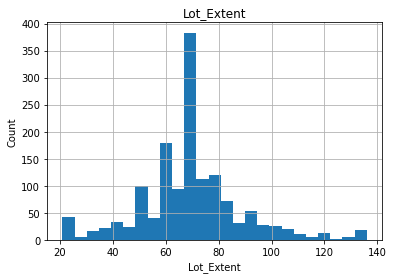

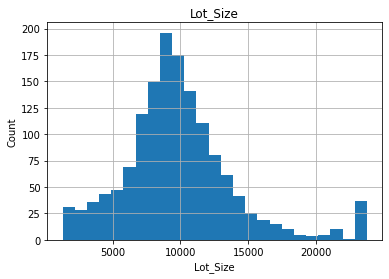

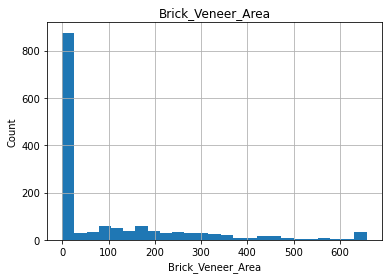

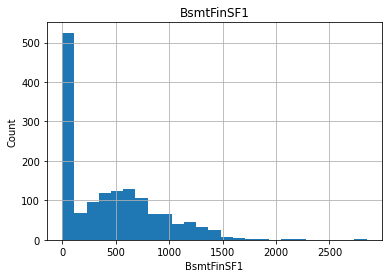

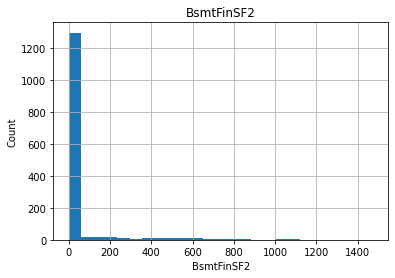

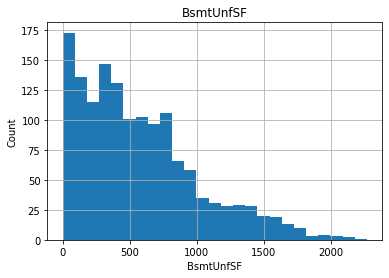

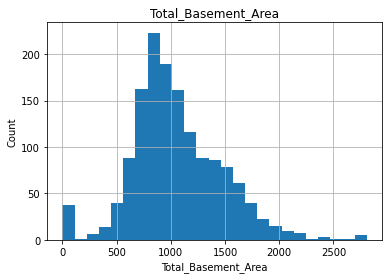

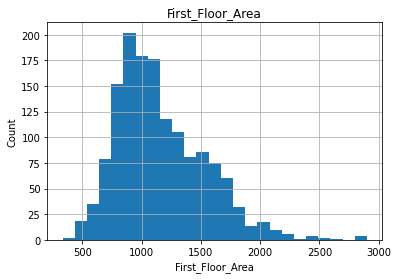

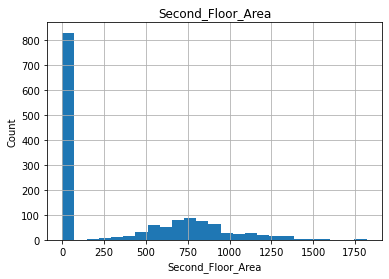

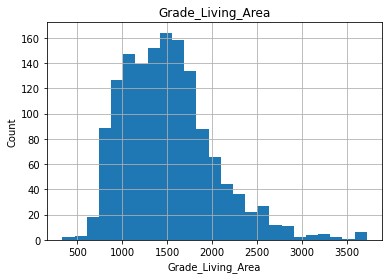

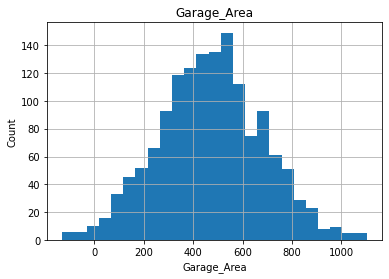

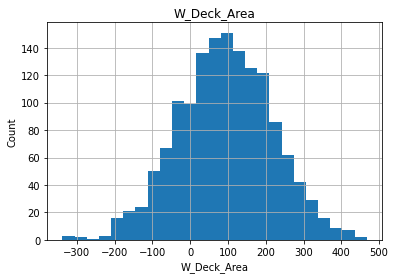

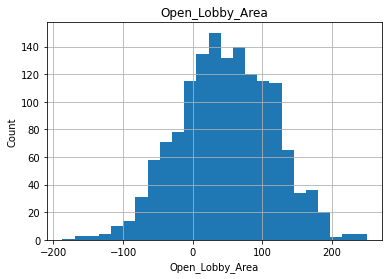

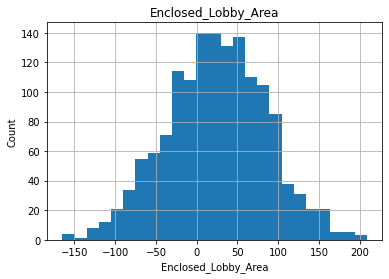

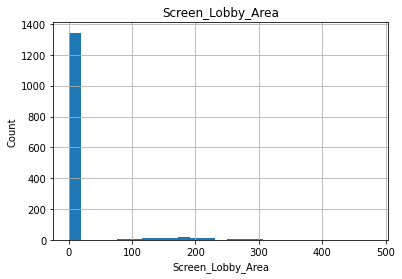

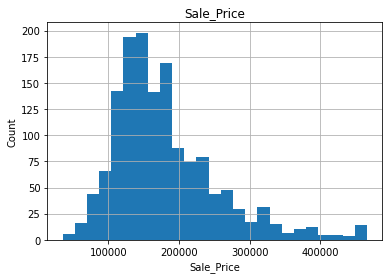

In [112]:
for feature in continuous_feature:
    data=d_tr.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

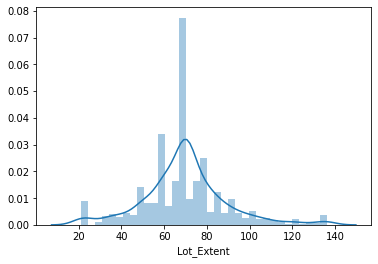

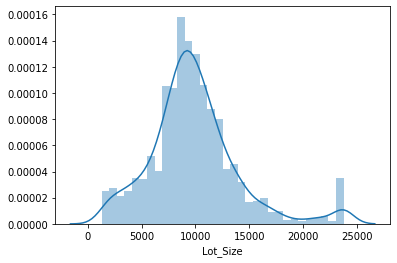

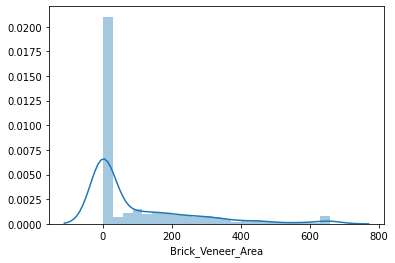

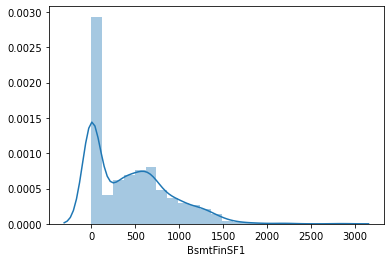

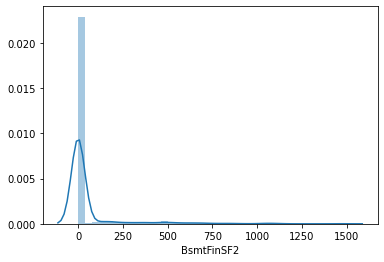

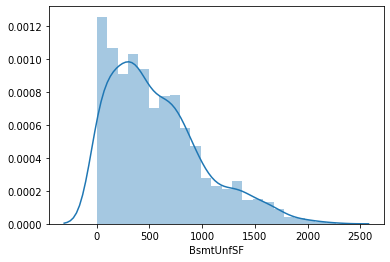

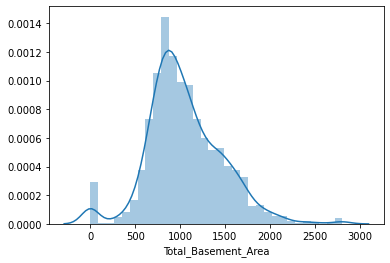

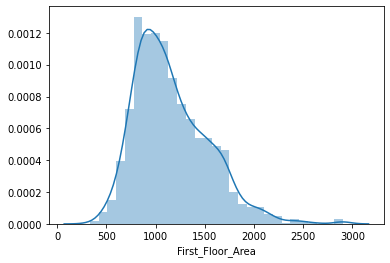

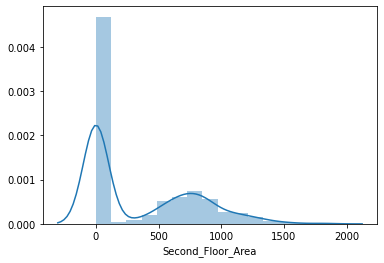

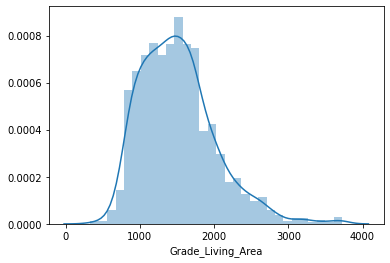

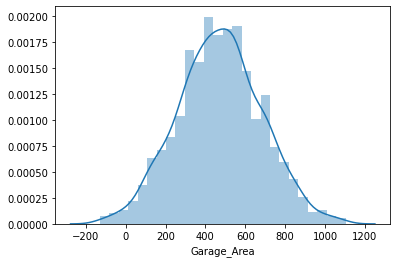

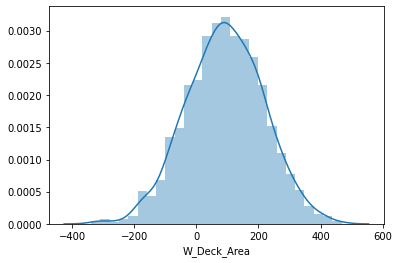

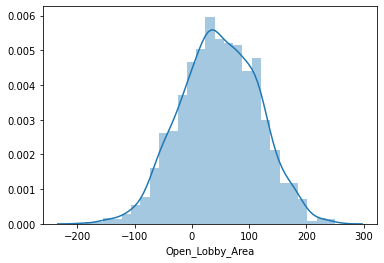

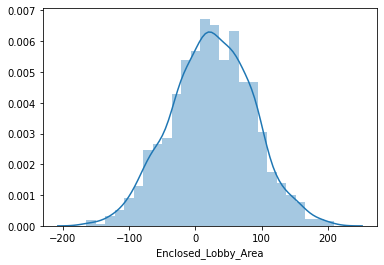

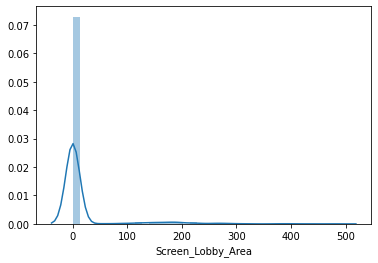

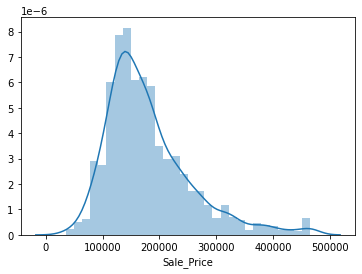

In [113]:
for feature in continuous_feature:
    data=d_tr.copy() 
    plt.figure()
    sns.distplot(data[feature])
    plt.show()

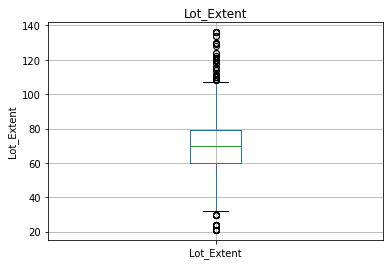

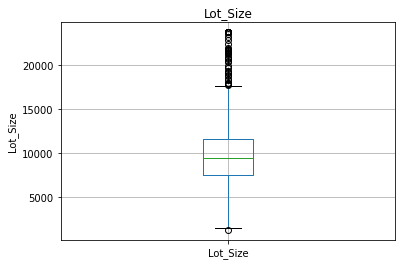

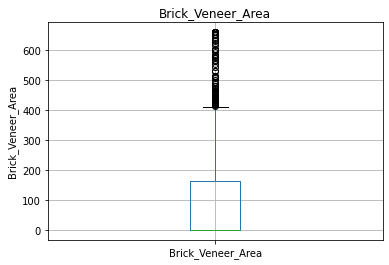

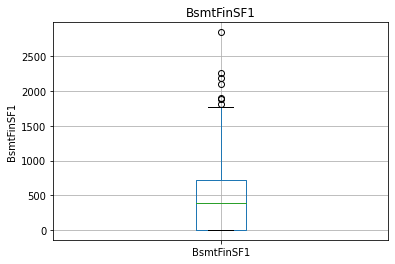

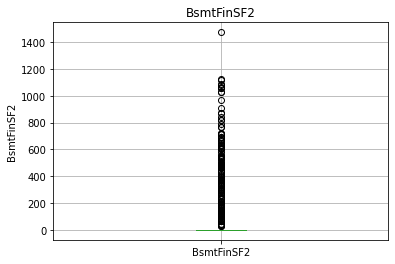

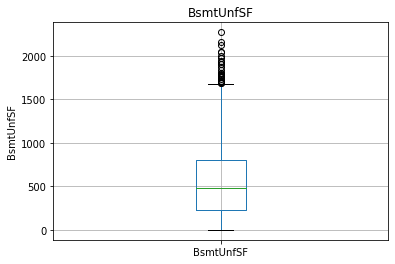

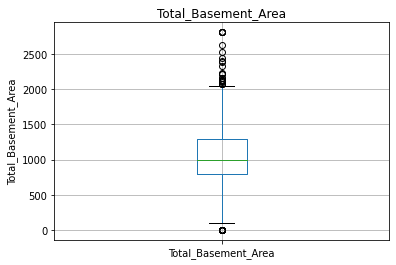

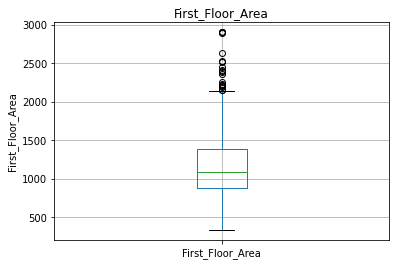

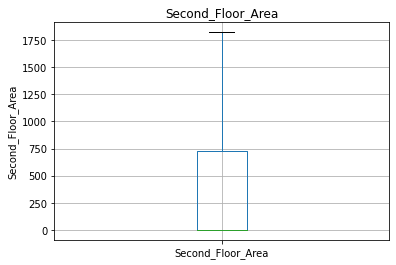

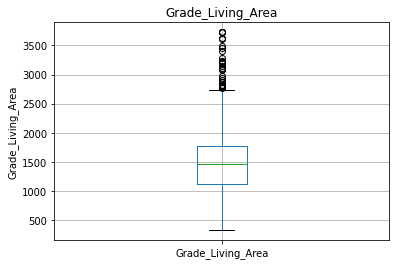

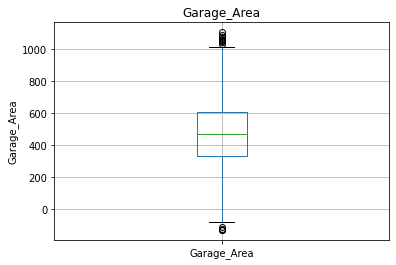

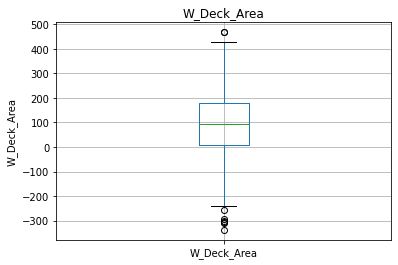

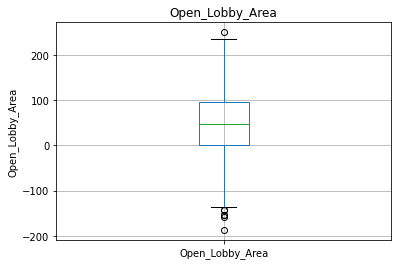

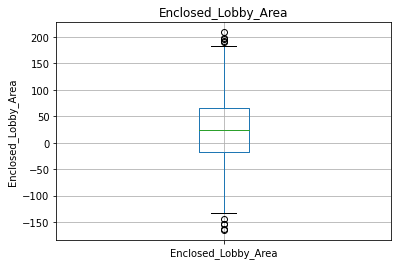

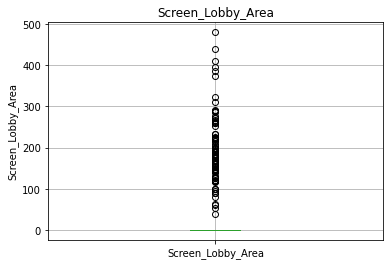

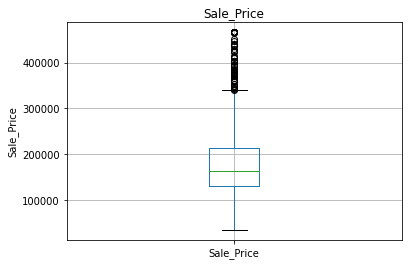

In [114]:
for feature in continuous_feature:
    data=d_tr.copy()       
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

# skewness

In [115]:
from scipy.stats import skew

Lot_Extent
0.4214372511591747


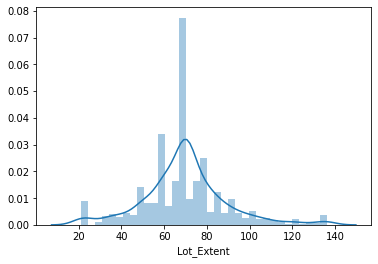

Lot_Size
0.9941281810453695


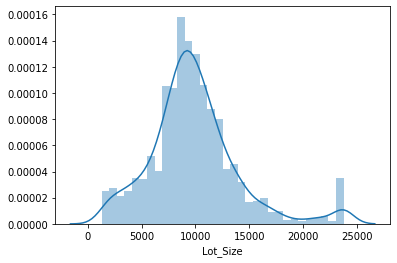

Brick_Veneer_Area
1.808559114312206


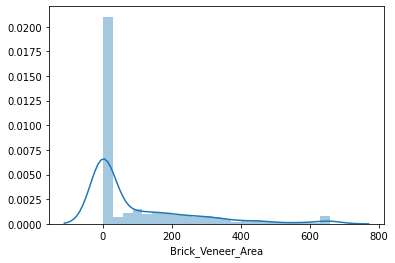

BsmtFinSF1
0.8711450353080846


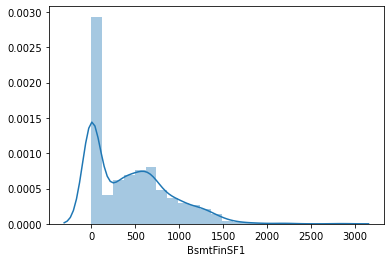

BsmtFinSF2
4.260152392315039


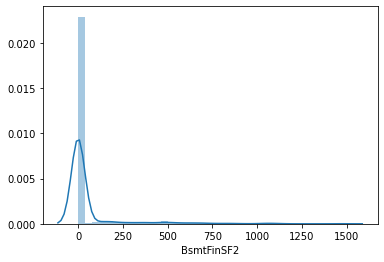

BsmtUnfSF
0.9151719267334216


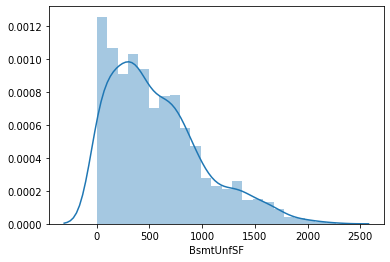

Total_Basement_Area
0.4813586850849088


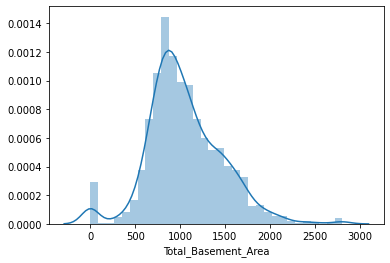

First_Floor_Area
0.9295248977326418


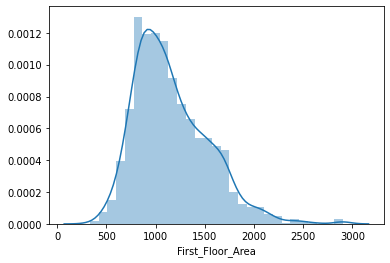

Second_Floor_Area
0.7982427447708983


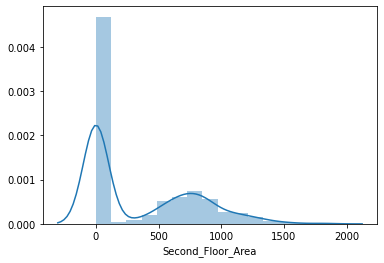

Grade_Living_Area
0.9604888253076743


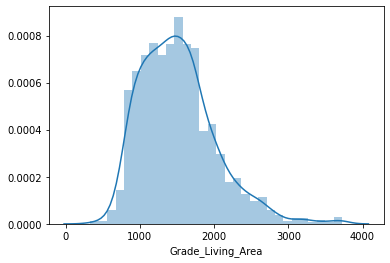

Garage_Area
0.02494123516892455


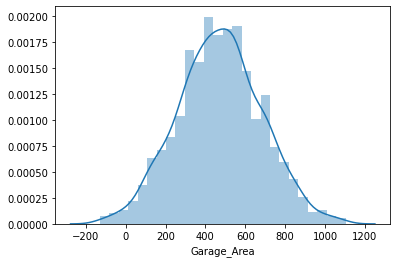

W_Deck_Area
-0.06649597293653275


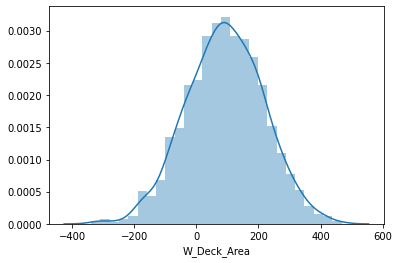

Open_Lobby_Area
-0.07280579929800411


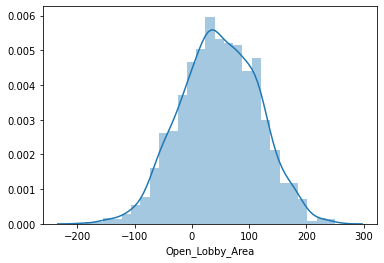

Enclosed_Lobby_Area
-0.050090945128721046


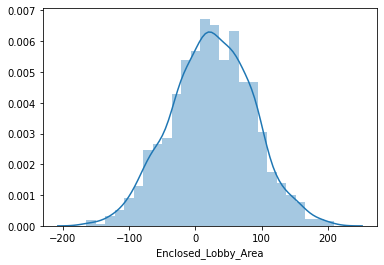

Screen_Lobby_Area
4.116333983929696


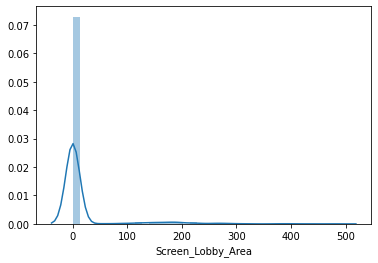

Sale_Price
1.3189875560114488


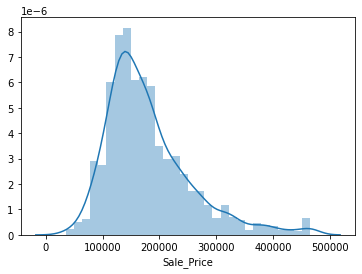

In [116]:
for feature in continuous_feature:
    data=d_tr.copy()      
    print(feature)
    print(skew(data[feature]))
    plt.figure()
    sns.distplot(data[feature])
    plt.show()

In [117]:

d_tr["Brick_Veneer_Area"]=np.sqrt(d_tr["Brick_Veneer_Area"])
d_tr["BsmtFinSF2"]=np.sqrt(d_tr["BsmtFinSF2"])
d_tr["Screen_Lobby_Area"]=np.sqrt(d_tr["Screen_Lobby_Area"])
d_tr["Sale_Price"]=np.sqrt(d_tr["Sale_Price"])


Lot_Extent
0.4214372511591747


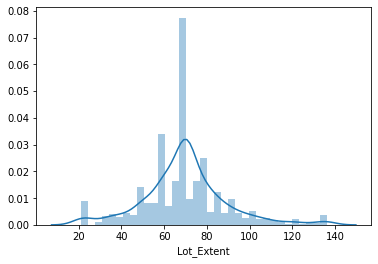

Lot_Size
0.9941281810453695


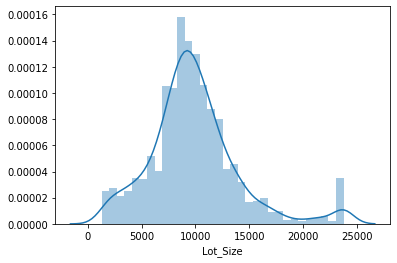

Brick_Veneer_Area
0.8996468144478548


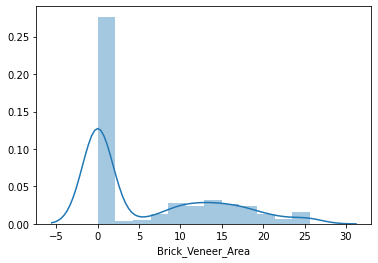

BsmtFinSF1
0.8711450353080846


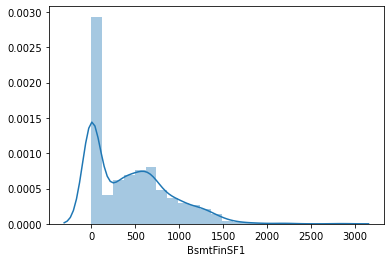

BsmtFinSF2
3.0455644746184802


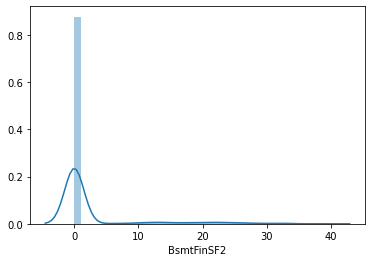

BsmtUnfSF
0.9151719267334216


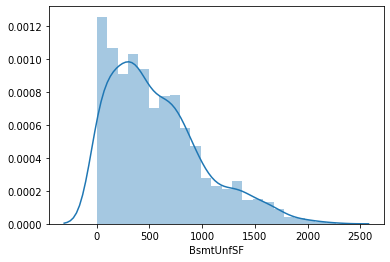

Total_Basement_Area
0.4813586850849088


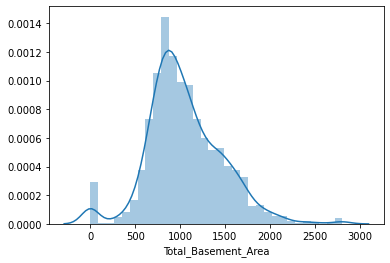

First_Floor_Area
0.9295248977326418


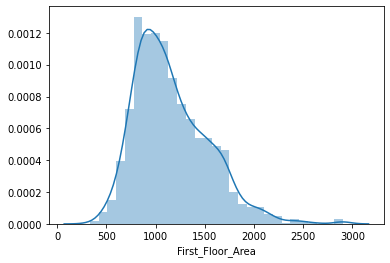

Second_Floor_Area
0.7982427447708983


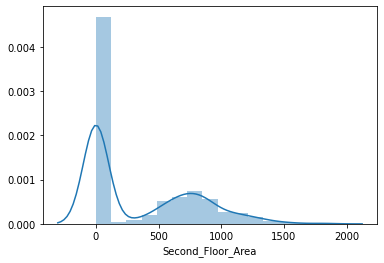

Grade_Living_Area
0.9604888253076743


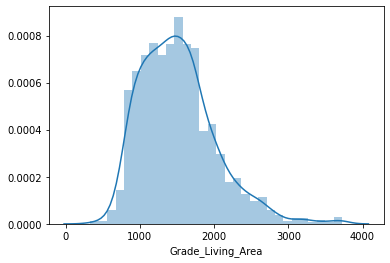

Garage_Area
0.02494123516892455


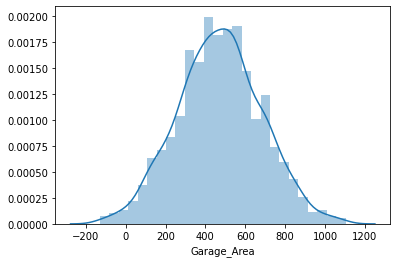

W_Deck_Area
-0.06649597293653275


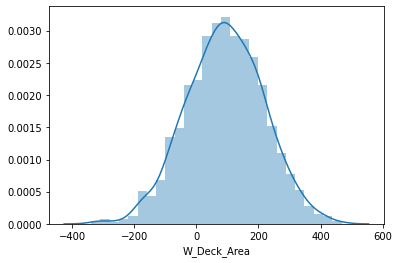

Open_Lobby_Area
-0.07280579929800411


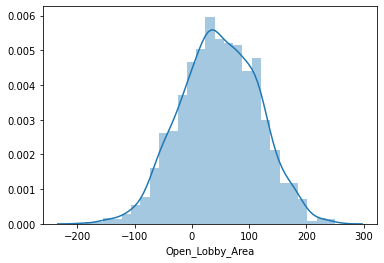

Enclosed_Lobby_Area
-0.050090945128721046


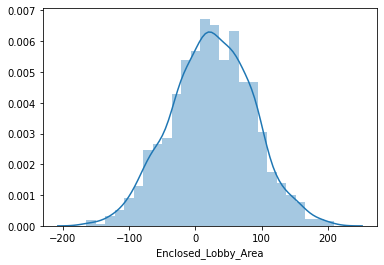

Screen_Lobby_Area
3.349894442640096


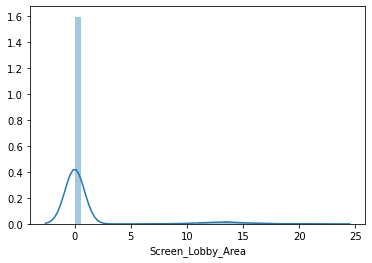

Sale_Price
0.705066983622201


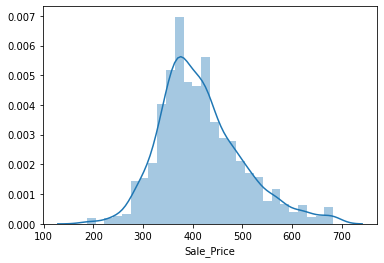

In [118]:
for feature in continuous_feature:
    data=d_tr.copy()      
    print(feature)
    print(skew(data[feature]))
    plt.figure()
    sns.distplot(data[feature])
    plt.show()

WORK on test data

In [119]:
d_ts[continuous_feature1].describe()

Lot_Extent      Lot_Size  Brick_Veneer_Area   BsmtFinSF1   BsmtFinSF2  \
count  1459.000000   1459.000000        1459.000000  1459.000000  1459.000000   
mean     68.580357   9872.044418         100.709141   439.203704    52.619342   
std      20.561228   4960.234751         176.709824   455.111888   176.693301   
min      21.000000  -4265.104479           0.000000     0.000000     0.000000   
25%      60.000000   6351.984222           0.000000     0.000000     0.000000   
50%      68.580357   9784.907361           0.000000   351.000000     0.000000   
75%      78.000000  13208.971525         162.000000   752.000000     0.000000   
max     200.000000  26126.190300        1290.000000  4010.000000  1526.000000   

         BsmtUnfSF  Total_Basement_Area  First_Floor_Area  Second_Floor_Area  \
count  1459.000000          1459.000000       1459.000000        1459.000000   
mean    554.294925          1046.117970       1156.534613         325.967786   
std     437.110508           442.746712        398.165820         420.610226   
min       0.000000             0.000000        407.000000           0.000000   
25%     219.500000           784.000000        873.500000           0.000000   
50%     460.000000           988.000000       1079.000000           0.000000   
75%     797.500000          1304.000000       1382.500000         676.000000   
max    2140.000000          5095.000000       5095.000000        1862.000000   

       Grade_Living_Area  Garage_Area  W_Deck_Area  Open_Lobby_Area  \
count        1459.000000  1459.000000  1459.000000      1459.000000   
mean         1486.045922   472.768861    93.174777        48.313914   
std           485.566099   216.974165   127.744882        68.883364   
min           407.000000     0.000000     0.000000         0.000000   
25%          1117.500000   318.000000     0.000000         0.000000   
50%          1432.000000   480.000000     0.000000        28.000000   
75%          1721.000000   576.000000   168.000000        72.000000   
max          5095.000000  1488.000000  1424.000000       742.000000   

       Enclosed_Lobby_Area  Screen_Lobby_Area  Miscellaneous_Value  
count          1459.000000        1459.000000          1459.000000  
mean             24.243317          17.064428            58.167923  
std              67.227765          56.609763           630.806978  
min               0.000000           0.000000             0.000000  
25%               0.000000           0.000000             0.000000  
50%               0.000000           0.000000             0.000000  
75%               0.000000           0.000000             0.000000  
max            1012.000000         576.000000         17000.000000

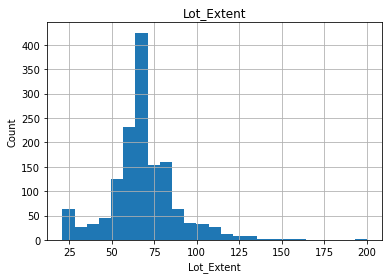

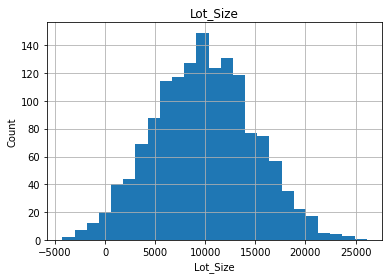

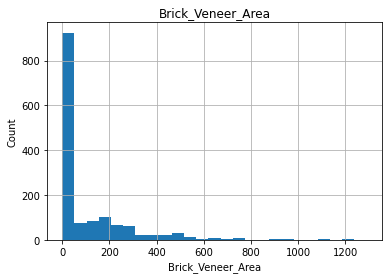

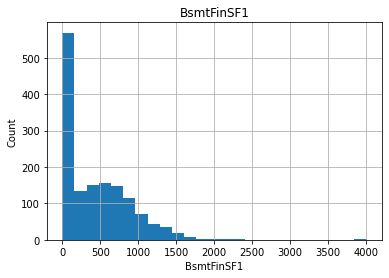

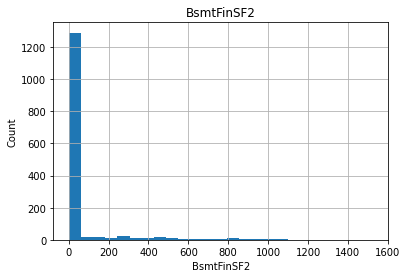

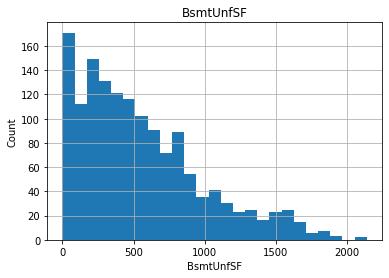

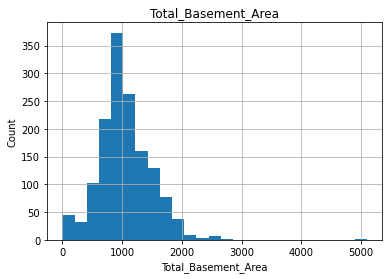

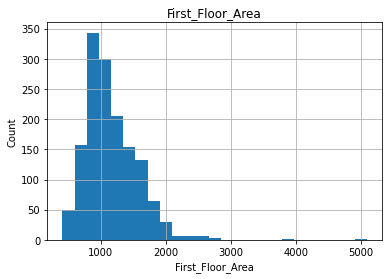

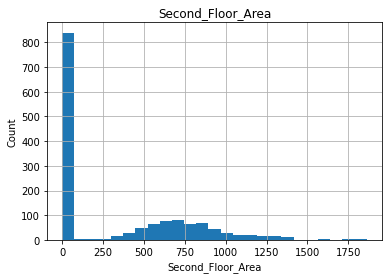

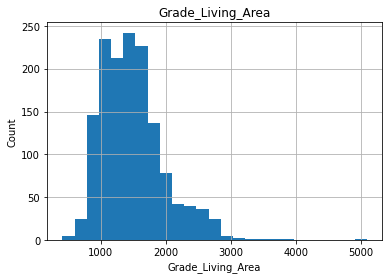

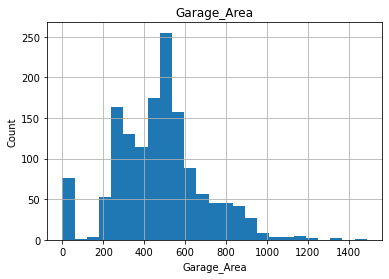

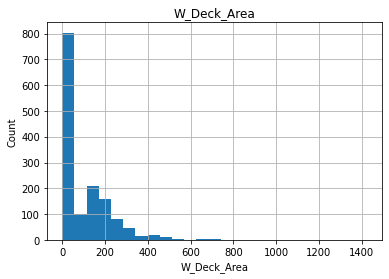

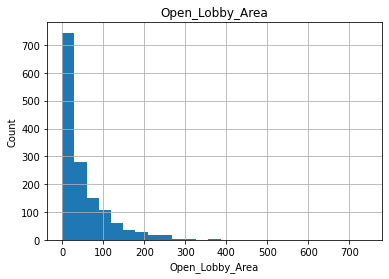

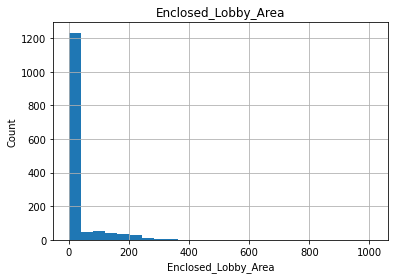

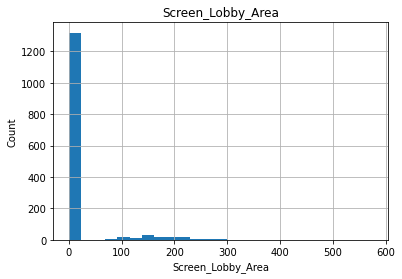

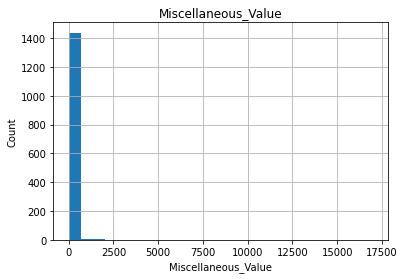

In [120]:
for feature1 in continuous_feature1:
    data=d_ts.copy()
    data[feature1].hist(bins=25)
    plt.xlabel(feature1)
    plt.ylabel("Count")
    plt.title(feature1)
    plt.show()

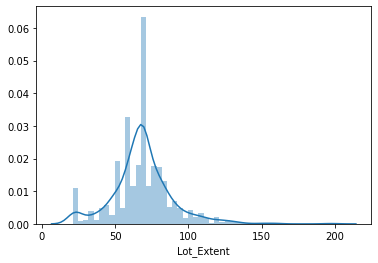

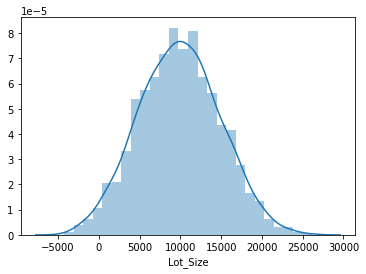

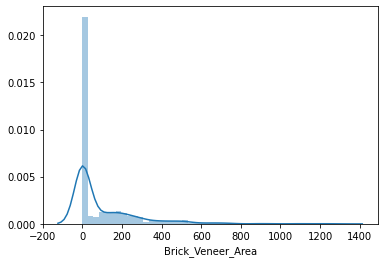

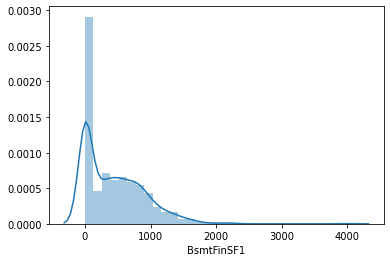

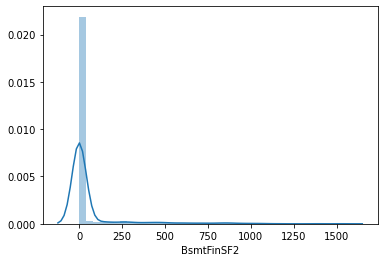

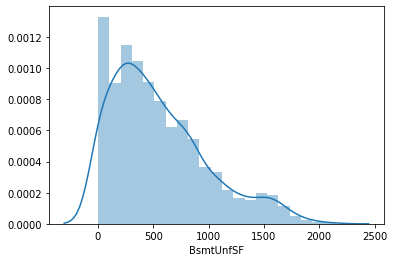

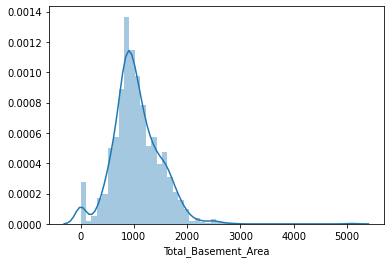

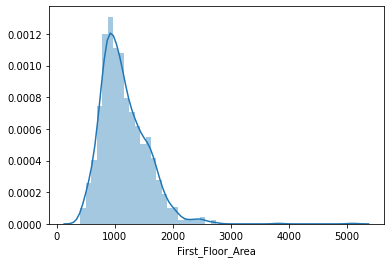

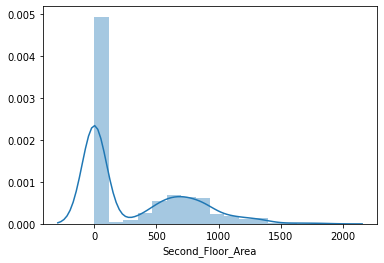

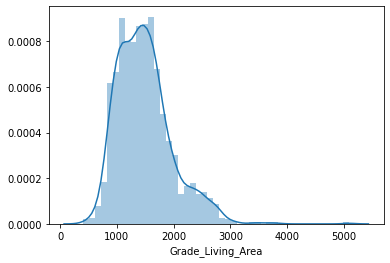

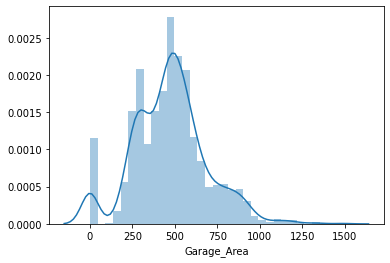

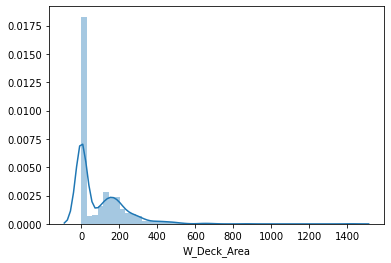

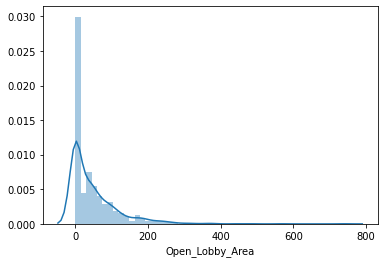

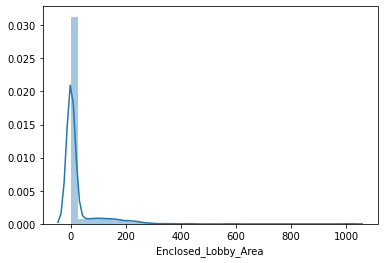

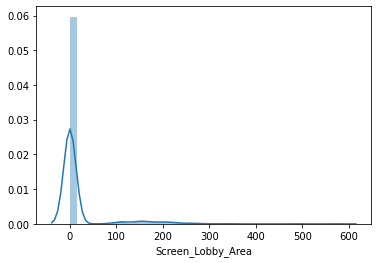

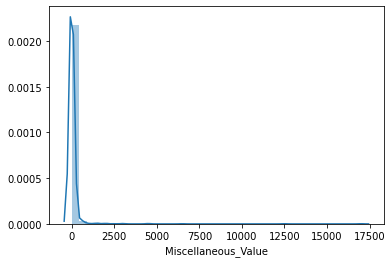

In [121]:
for feature1 in continuous_feature1:
    data=d_ts.copy() 
    plt.figure()
    sns.distplot(data[feature1])
    plt.show()

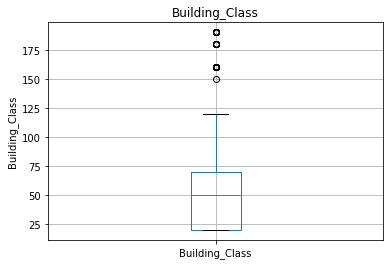

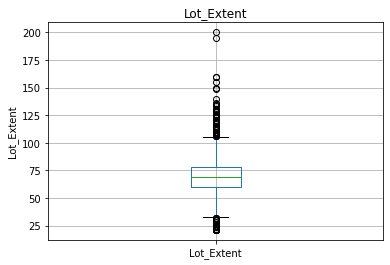

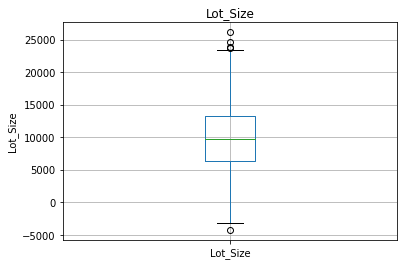

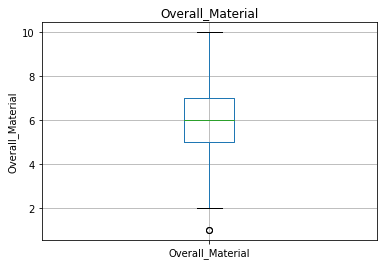

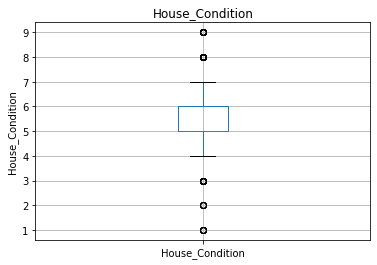

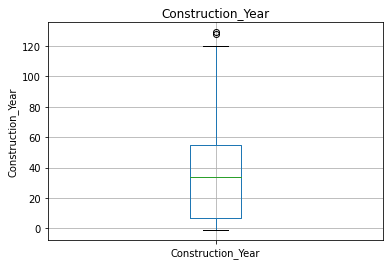

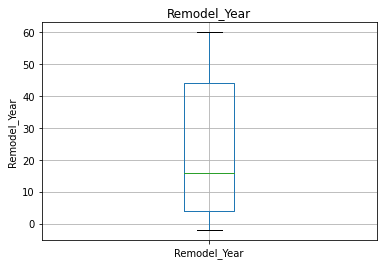

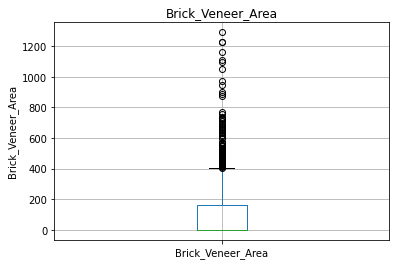

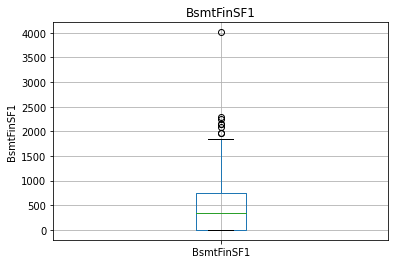

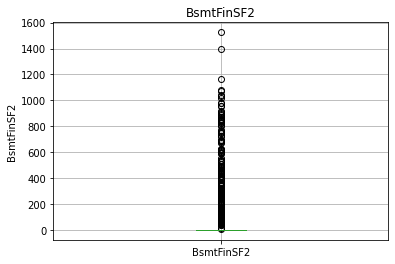

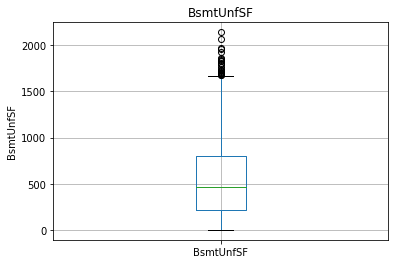

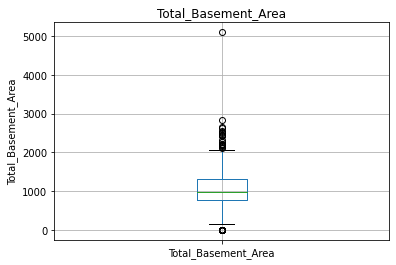

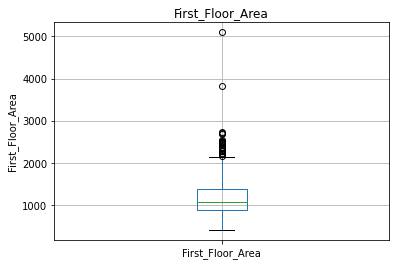

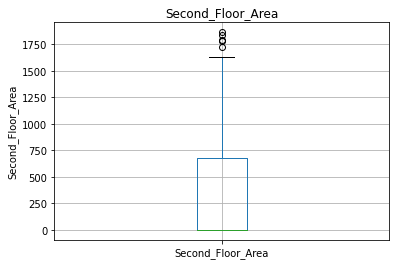

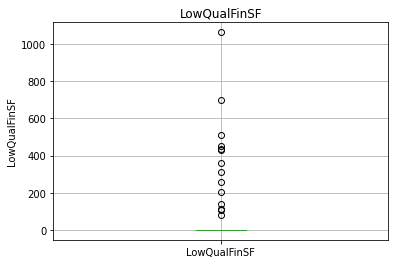

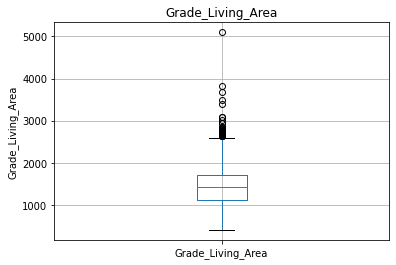

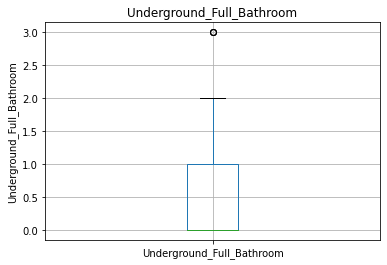

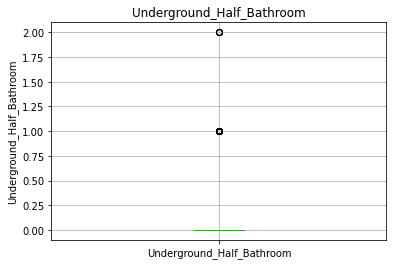

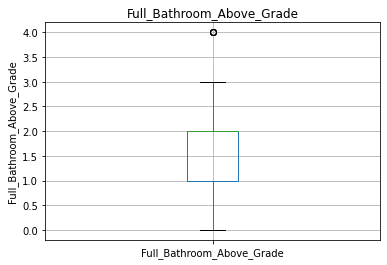

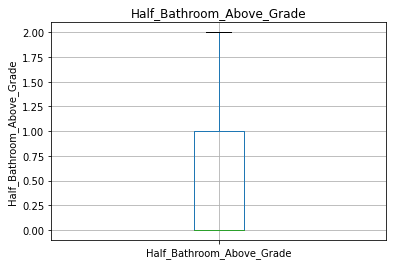

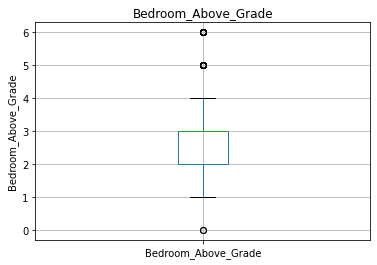

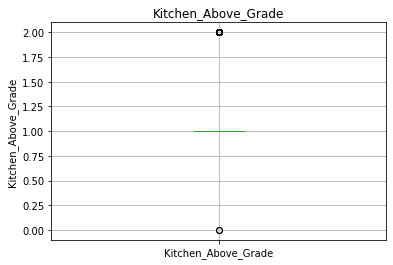

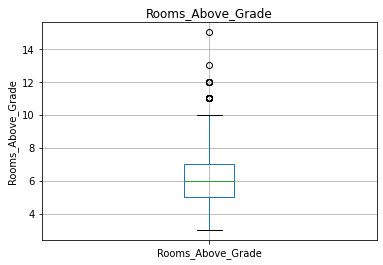

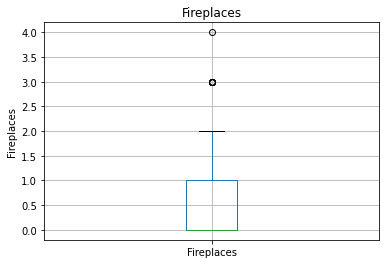

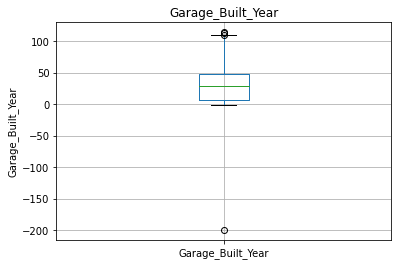

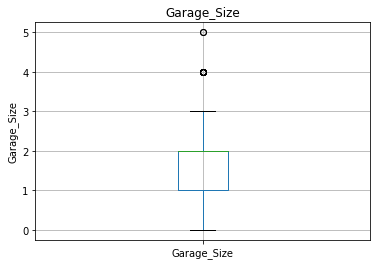

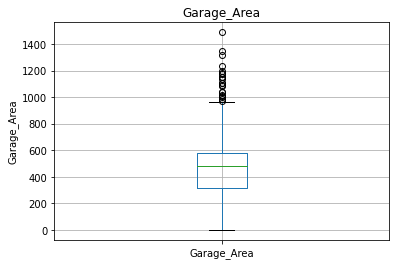

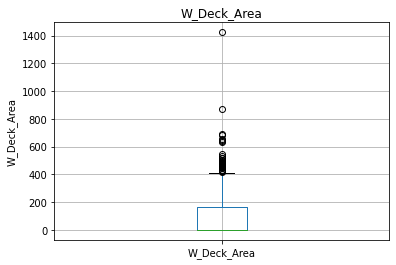

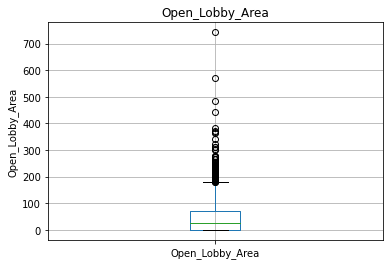

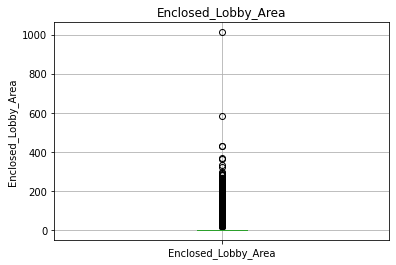

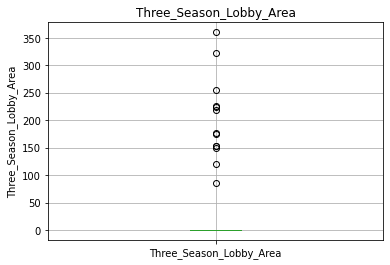

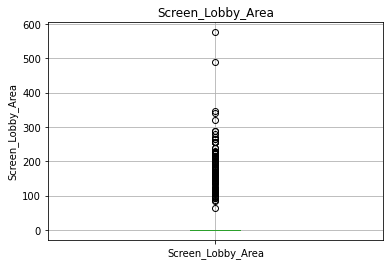

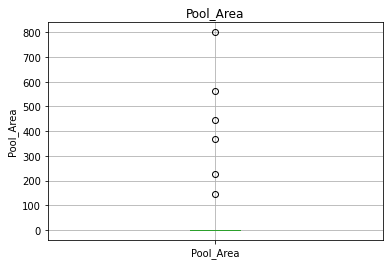

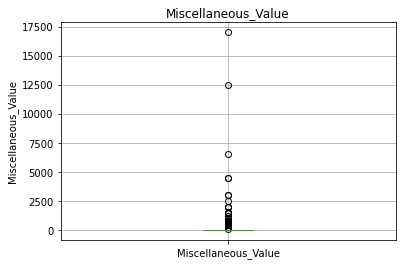

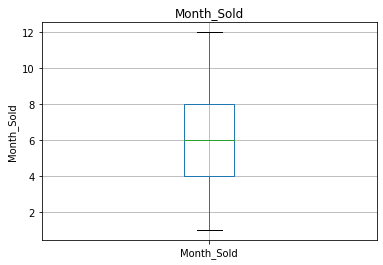

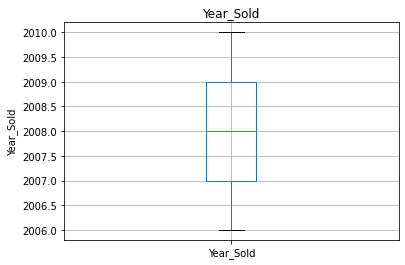

In [122]:
for feature1 in numerical_features1:
    data=d_ts.copy()       
    data.boxplot(column=feature1)
    plt.ylabel(feature1)
    plt.title(feature1)
    plt.show()

In [123]:
continuous_feature1

['Lot_Extent',
 'Lot_Size',
 'Brick_Veneer_Area',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'Total_Basement_Area',
 'First_Floor_Area',
 'Second_Floor_Area',
 'Grade_Living_Area',
 'Garage_Area',
 'W_Deck_Area',
 'Open_Lobby_Area',
 'Enclosed_Lobby_Area',
 'Screen_Lobby_Area',
 'Miscellaneous_Value']

In [124]:

d_ts.Lot_Extent.value_counts()
d_ts.Lot_Size.value_counts()

d_ts.Brick_Veneer_Area.value_counts()
d_ts.BsmtFinSF1.value_counts()
d_ts.BsmtUnfSF.value_counts()
d_ts.Total_Basement_Area.value_counts()
d_ts.First_Floor_Area.value_counts()
d_ts.Second_Floor_Area.value_counts()
d_ts.Grade_Living_Area.value_counts()


d_ts.Garage_Area.value_counts()
d_ts.W_Deck_Area.value_counts()
d_ts.Open_Lobby_Area.value_counts()
d_ts.Enclosed_Lobby_Area.value_counts()


0       1208
96         7
168        7
112        7
84         6
144        6
192        5
60         5
180        5
160        5
40         5
116        4
70         4
150        4
148        4
120        4
140        4
100        4
128        4
56         4
55         3
64         3
80         3
42         3
240        3
90         3
36         3
105        3
35         3
280        3
126        2
135        2
186        2
121        2
176        2
164        2
78         2
169        2
88         2
81         2
77         2
68         2
248        2
222        2
32         2
246        2
41         2
239        2
231        2
48         2
45         2
218        2
212        2
211        2
205        2
30         2
23         1
20         1
98         1
104        1
102        1
18         1
16         1
24         1
25         1
101        1
26         1
66         1
28         1
94         1
92         1
34         1
72         1
86         1
43         1
51         1
52         1

In [125]:
iqr1=d_ts["Lot_Extent"].quantile(0.75)-d_ts["Lot_Extent"].quantile(0.25)
iqr1

18.0

In [126]:
up=d_ts["Lot_Size"].mean()+3*d_ts["Lot_Size"].std()
lw=d_ts["Lot_Size"].mean()-3*d_ts["Lot_Size"].std()
print(lw,up)

-5008.65983492198 24752.74867073253


In [127]:
iqr3=d_ts["Brick_Veneer_Area"].quantile(0.75)-d_ts["Brick_Veneer_Area"].quantile(0.25)
iqr3

162.0

In [128]:
iqr4=d_ts["BsmtFinSF1"].quantile(0.75)-d_ts["BsmtFinSF1"].quantile(0.25)
iqr4

752.0

In [129]:
iqr5=d_ts["BsmtUnfSF"].quantile(0.75)-d_ts["BsmtUnfSF"].quantile(0.25)
iqr5

578.0

In [130]:
iqr6=d_ts["Total_Basement_Area"].quantile(0.75)-d_ts["Total_Basement_Area"].quantile(0.25)
iqr6

520.0

In [131]:
iqr7=d_ts["First_Floor_Area"].quantile(0.75)-d_ts["First_Floor_Area"].quantile(0.25)
iqr7

509.0

In [132]:
iqr8=d_ts["Second_Floor_Area"].quantile(0.75)-d_ts["Second_Floor_Area"].quantile(0.25)
iqr8

676.0

In [133]:
iqr9=d_ts["Grade_Living_Area"].quantile(0.75)-d_ts["Grade_Living_Area"].quantile(0.25)
iqr9

603.5

In [134]:
iqr11=d_ts["Garage_Area"].quantile(0.75)-d_ts["Garage_Area"].quantile(0.25)
iqr11

258.0

In [135]:
iqr12=d_ts["W_Deck_Area"].quantile(0.75)-d_ts["W_Deck_Area"].quantile(0.25)
iqr12

168.0

In [136]:
iqr13=d_ts["Open_Lobby_Area"].quantile(0.75)-d_ts["Open_Lobby_Area"].quantile(0.25)
iqr13

72.0

In [137]:
up1=d_ts["Lot_Extent"].quantile(0.75)+(3*iqr1)
lw1=d_ts["Lot_Extent"].quantile(0.25)-(3*iqr1)
print(up1,lw1)

132.0 6.0


In [138]:
up3=d_ts["Brick_Veneer_Area"].quantile(0.75)+(3*iqr3)
lw3=d_ts["Brick_Veneer_Area"].quantile(0.25)-(3*iqr3)
print(up3,lw3)

648.0 -486.0


In [139]:
up4=d_ts["BsmtFinSF1"].quantile(0.75)+(3*iqr4)
lw4=d_ts["BsmtFinSF1"].quantile(0.25)-(3*iqr4)
print(up4,lw4)

3008.0 -2256.0


In [140]:
up5=d_ts["BsmtUnfSF"].quantile(0.75)+(2*iqr5)
lw5=d_ts["BsmtUnfSF"].quantile(0.25)-(2*iqr5)
print(up5,lw5)

1953.5 -936.5


In [141]:
up6=d_ts["Total_Basement_Area"].quantile(0.75)+(3*iqr6)
lw6=d_ts["Total_Basement_Area"].quantile(0.25)-(3*iqr6)
print(up6,lw6)

2864.0 -776.0


In [142]:
up7=d_ts["First_Floor_Area"].quantile(0.75)+(3*iqr7)
lw7=d_ts["First_Floor_Area"].quantile(0.25)-(3*iqr7)
print(up7,lw7)

2909.5 -653.5


In [143]:
up8=d_ts["Second_Floor_Area"].quantile(0.75)+(1.5*iqr8)
lw8=d_ts["Second_Floor_Area"].quantile(0.25)-(1.5*iqr8)
print(up8,lw8)

1690.0 -1014.0


In [144]:
up9=d_ts["Grade_Living_Area"].quantile(0.75)+(3*iqr9)
lw9=d_ts["Grade_Living_Area"].quantile(0.25)-(3*iqr9)
print(up9,lw9)

3531.5 -693.0


In [145]:
up11=d_ts["Garage_Area"].quantile(0.75)+(3*iqr11)
lw11=d_ts["Garage_Area"].quantile(0.25)-(3*iqr11)
print(up11,lw11)

1350.0 -456.0


In [146]:
up12=d_ts["W_Deck_Area"].quantile(0.75)+(3*iqr12)
lw12=d_ts["W_Deck_Area"].quantile(0.25)-(3*iqr12)
print(up12,lw12)

672.0 -504.0


In [147]:
up13=d_ts["Open_Lobby_Area"].quantile(0.75)+(3*iqr13)
lw13=d_ts["Open_Lobby_Area"].quantile(0.25)-(3*iqr13)
print(up13,lw13)

288.0 -216.0


In [148]:
d_ts[continuous_feature1].describe()

Lot_Extent      Lot_Size  Brick_Veneer_Area   BsmtFinSF1   BsmtFinSF2  \
count  1459.000000   1459.000000        1459.000000  1459.000000  1459.000000   
mean     68.580357   9872.044418         100.709141   439.203704    52.619342   
std      20.561228   4960.234751         176.709824   455.111888   176.693301   
min      21.000000  -4265.104479           0.000000     0.000000     0.000000   
25%      60.000000   6351.984222           0.000000     0.000000     0.000000   
50%      68.580357   9784.907361           0.000000   351.000000     0.000000   
75%      78.000000  13208.971525         162.000000   752.000000     0.000000   
max     200.000000  26126.190300        1290.000000  4010.000000  1526.000000   

         BsmtUnfSF  Total_Basement_Area  First_Floor_Area  Second_Floor_Area  \
count  1459.000000          1459.000000       1459.000000        1459.000000   
mean    554.294925          1046.117970       1156.534613         325.967786   
std     437.110508           442.746712        398.165820         420.610226   
min       0.000000             0.000000        407.000000           0.000000   
25%     219.500000           784.000000        873.500000           0.000000   
50%     460.000000           988.000000       1079.000000           0.000000   
75%     797.500000          1304.000000       1382.500000         676.000000   
max    2140.000000          5095.000000       5095.000000        1862.000000   

       Grade_Living_Area  Garage_Area  W_Deck_Area  Open_Lobby_Area  \
count        1459.000000  1459.000000  1459.000000      1459.000000   
mean         1486.045922   472.768861    93.174777        48.313914   
std           485.566099   216.974165   127.744882        68.883364   
min           407.000000     0.000000     0.000000         0.000000   
25%          1117.500000   318.000000     0.000000         0.000000   
50%          1432.000000   480.000000     0.000000        28.000000   
75%          1721.000000   576.000000   168.000000        72.000000   
max          5095.000000  1488.000000  1424.000000       742.000000   

       Enclosed_Lobby_Area  Screen_Lobby_Area  Miscellaneous_Value  
count          1459.000000        1459.000000          1459.000000  
mean             24.243317          17.064428            58.167923  
std              67.227765          56.609763           630.806978  
min               0.000000           0.000000             0.000000  
25%               0.000000           0.000000             0.000000  
50%               0.000000           0.000000             0.000000  
75%               0.000000           0.000000             0.000000  
max            1012.000000         576.000000         17000.000000

In [149]:

d_ts.Lot_Extent.describe()
d_ts.Lot_Size.describe()
d_ts.Brick_Veneer_Area.describe()
d_ts.BsmtFinSF1.describe()
d_ts.BsmtUnfSF.describe()
d_ts.Total_Basement_Area.describe()
d_ts.First_Floor_Area.describe()
d_ts.Second_Floor_Area.describe()
d_ts.Grade_Living_Area.describe()
d_ts.Garage_Area.describe()
d_ts.W_Deck_Area.describe()
d_ts.Open_Lobby_Area.describe()
d_ts.W_Deck_Area.describe()

count    1459.000000
mean       93.174777
std       127.744882
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max      1424.000000
Name: W_Deck_Area, dtype: float64

In [150]:

d_ts.loc[d_ts["Lot_Extent"]>132.0,"Lot_Extent"]=132.0
d_ts.loc[d_ts["Lot_Size"]>24752.74867073253,"Lot_Size"]=24752.74867073253
d_ts.loc[d_ts["Brick_Veneer_Area"]>648.0,"Brick_Veneer_Area"]=648.0
d_ts.loc[d_ts["BsmtFinSF1"]>3008.0,"BsmtFinSF1"]=3008.0
d_ts.loc[d_ts["BsmtUnfSF"]>1953.5,"BsmtUnfSF"]=1953.5
d_ts.loc[d_ts["Total_Basement_Area"]>2864.0,"Total_Basement_Area"]=2864.0
d_ts.loc[d_ts["First_Floor_Area"]>2909.5,"First_Floor_Area"]=2909.5
d_ts.loc[d_ts["Second_Floor_Area"]>1690.0,"Second_Floor_Area"]=1690.0
d_ts.loc[d_ts["Grade_Living_Area"]>3531.5,"Grade_Living_Area"]=3531.5
d_ts.loc[d_ts["Full_Bathroom_Above_Grade"]>3.5,"Full_Bathroom_Above_Grade"]=3.5
d_ts.loc[d_ts["Garage_Area"]>1350.0,"Garage_Area"]=1350.0
d_ts.loc[d_ts["W_Deck_Area"]>672.0,"BsmtFinSF2"]=672.0
d_ts.loc[d_ts["Open_Lobby_Area"]>288.0,"Open_Lobby_Area"]=288.0




In [151]:
d_ts[continuous_feature1].describe()

Lot_Extent      Lot_Size  Brick_Veneer_Area   BsmtFinSF1   BsmtFinSF2  \
count  1459.000000   1459.000000        1459.000000  1459.000000  1459.000000   
mean     68.400097   9871.103060          96.665276   438.516932    53.506936   
std      19.799872   4957.277352         158.645041   450.451959   176.165481   
min      21.000000  -4265.104479           0.000000     0.000000     0.000000   
25%      60.000000   6351.984222           0.000000     0.000000     0.000000   
50%      68.580357   9784.907361           0.000000   351.000000     0.000000   
75%      78.000000  13208.971525         162.000000   752.000000     0.000000   
max     132.000000  24752.748671         648.000000  3008.000000  1526.000000   

         BsmtUnfSF  Total_Basement_Area  First_Floor_Area  Second_Floor_Area  \
count  1459.000000          1459.000000       1459.000000        1459.000000   
mean    554.080394          1044.588840       1154.412611         325.601097   
std     436.385981           432.487129        383.721547         419.361802   
min       0.000000             0.000000        407.000000           0.000000   
25%     219.500000           784.000000        873.500000           0.000000   
50%     460.000000           988.000000       1079.000000           0.000000   
75%     797.500000          1304.000000       1382.500000         676.000000   
max    1953.500000          2864.000000       2909.500000        1690.000000   

       Grade_Living_Area  Garage_Area  W_Deck_Area  Open_Lobby_Area  \
count         1459.00000  1459.000000  1459.000000      1459.000000   
mean          1484.68026   472.674276    93.174777        47.226182   
std            477.94841   216.560978   127.744882        62.926751   
min            407.00000     0.000000     0.000000         0.000000   
25%           1117.50000   318.000000     0.000000         0.000000   
50%           1432.00000   480.000000     0.000000        28.000000   
75%           1721.00000   576.000000   168.000000        72.000000   
max           3531.50000  1350.000000  1424.000000       288.000000   

       Enclosed_Lobby_Area  Screen_Lobby_Area  Miscellaneous_Value  
count          1459.000000        1459.000000          1459.000000  
mean             24.243317          17.064428            58.167923  
std              67.227765          56.609763           630.806978  
min               0.000000           0.000000             0.000000  
25%               0.000000           0.000000             0.000000  
50%               0.000000           0.000000             0.000000  
75%               0.000000           0.000000             0.000000  
max            1012.000000         576.000000         17000.000000

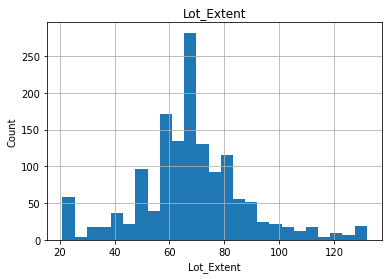

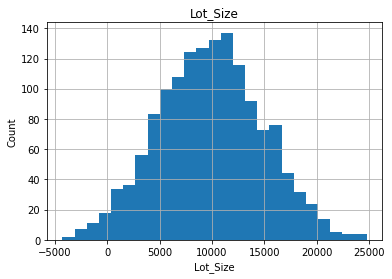

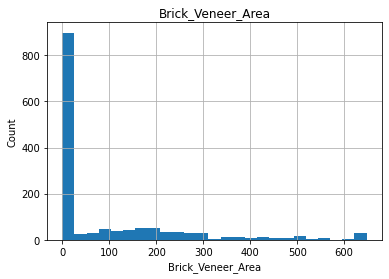

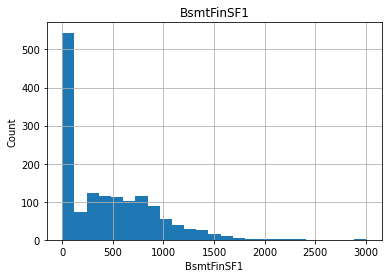

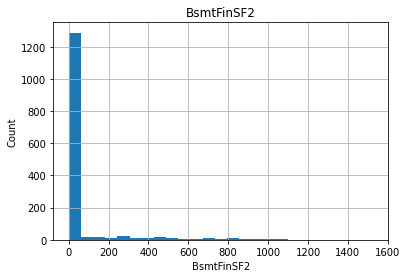

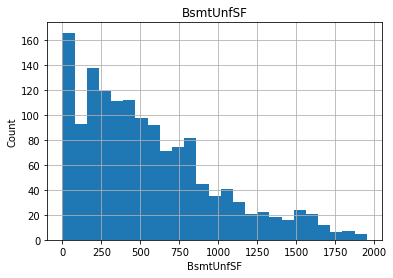

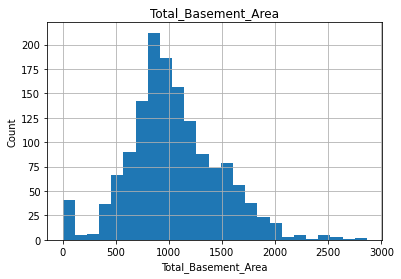

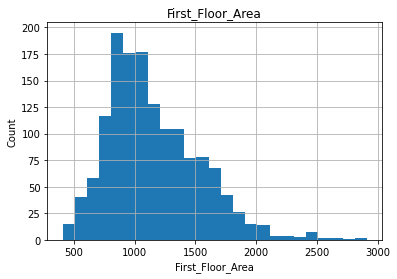

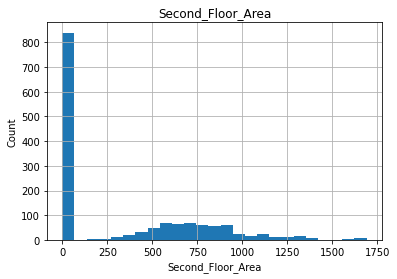

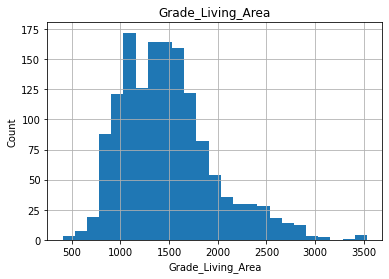

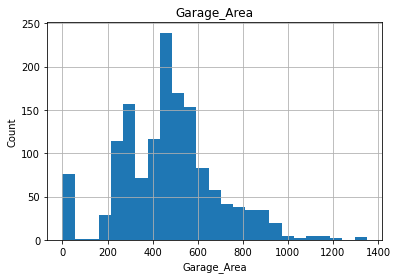

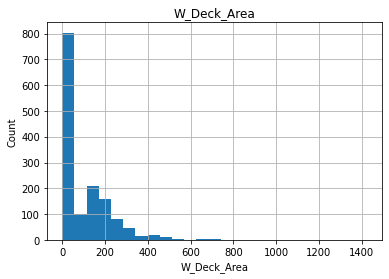

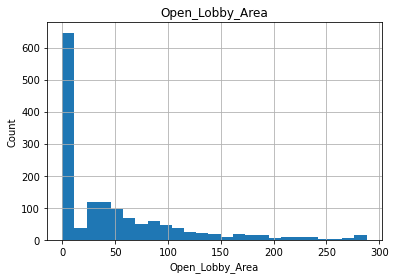

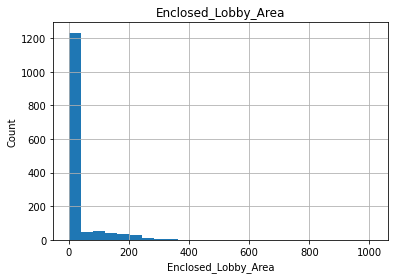

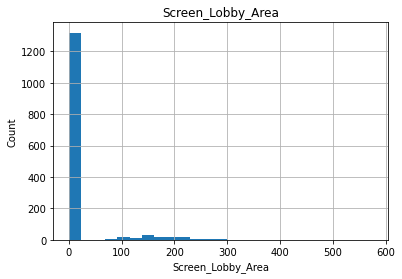

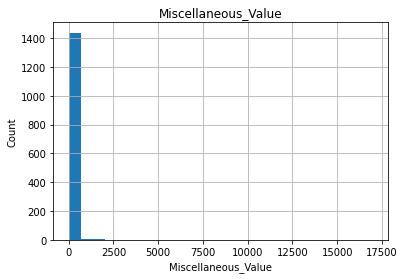

In [152]:
for feature1 in continuous_feature1:
    data=d_ts.copy()
    data[feature1].hist(bins=25)
    plt.xlabel(feature1)
    plt.ylabel("Count")
    plt.title(feature1)
    plt.show()

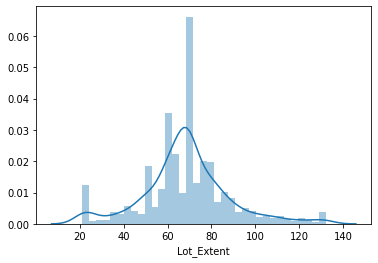

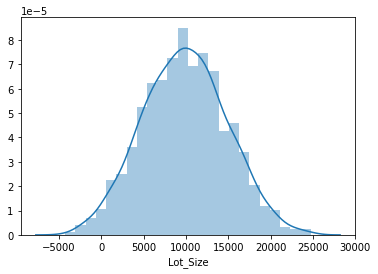

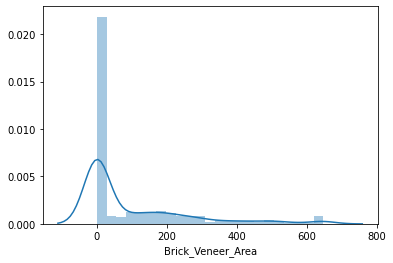

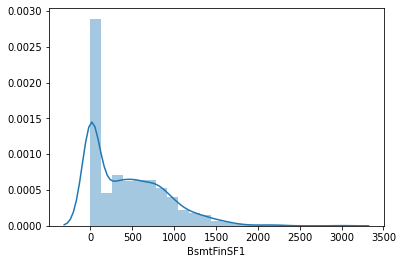

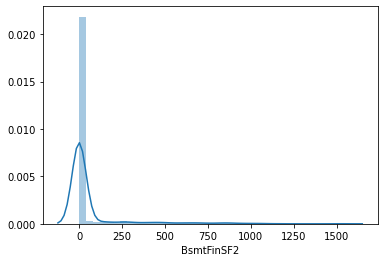

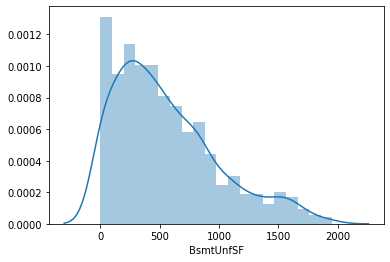

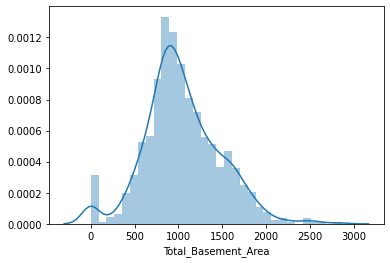

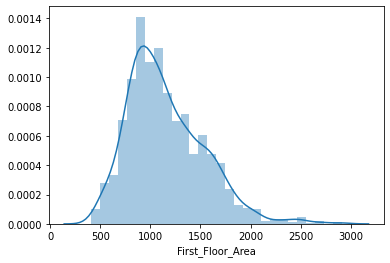

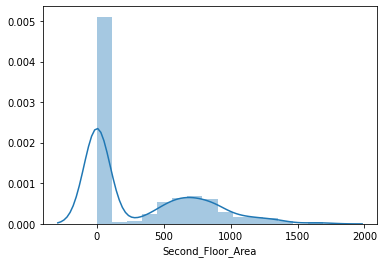

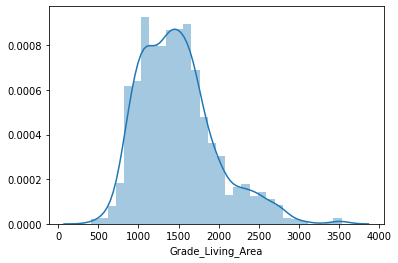

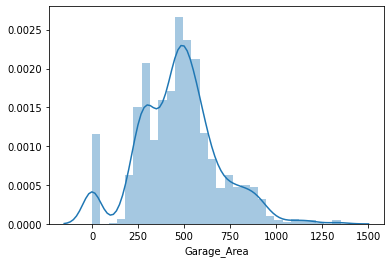

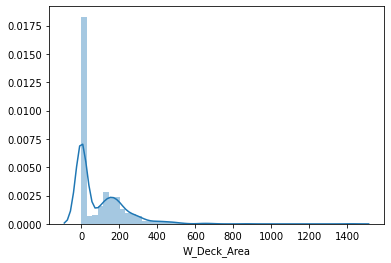

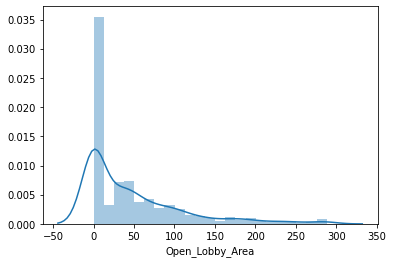

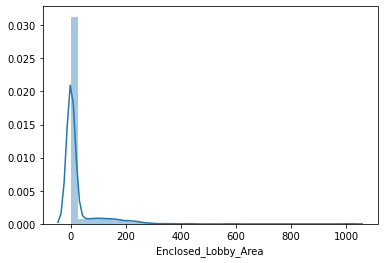

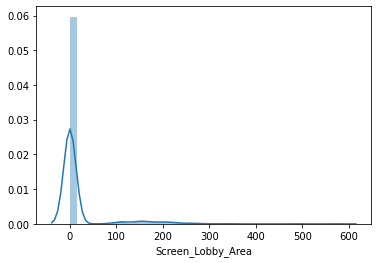

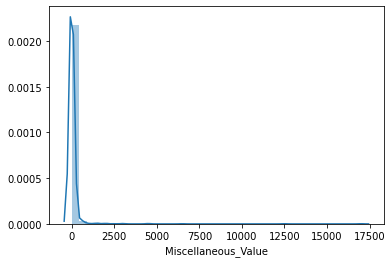

In [153]:
for feature1 in continuous_feature1:
    data=d_ts.copy() 
    plt.figure()
    sns.distplot(data[feature1])
    plt.show()

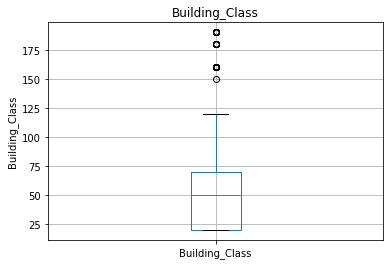

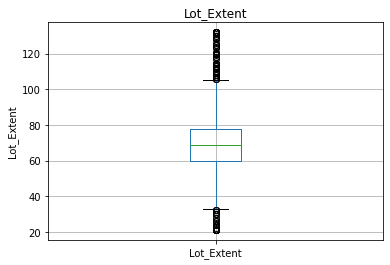

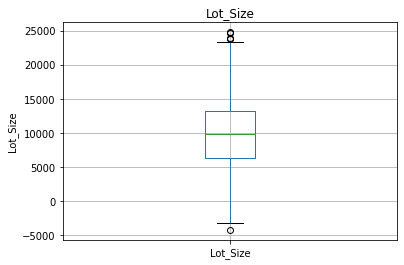

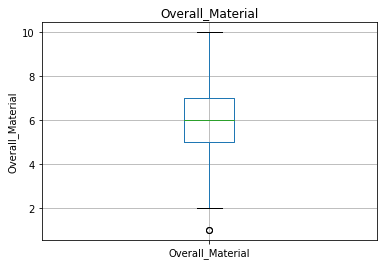

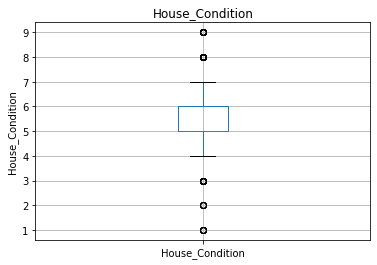

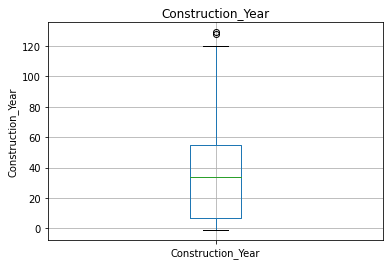

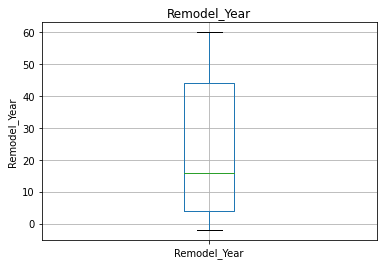

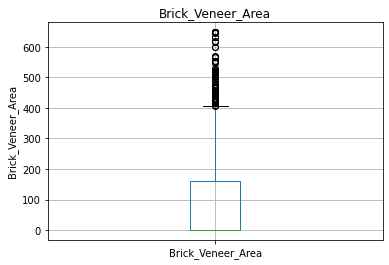

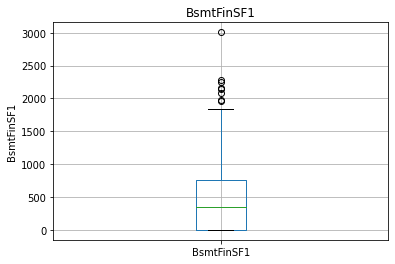

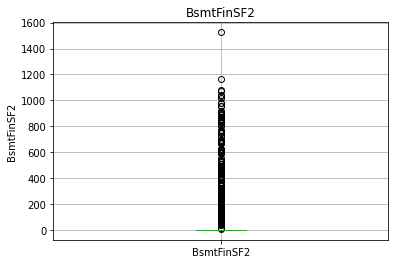

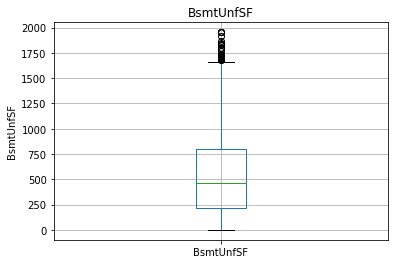

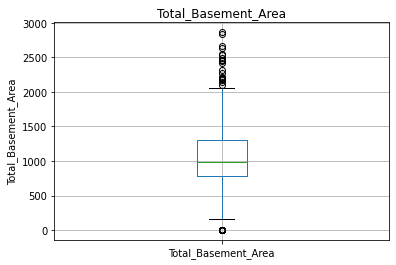

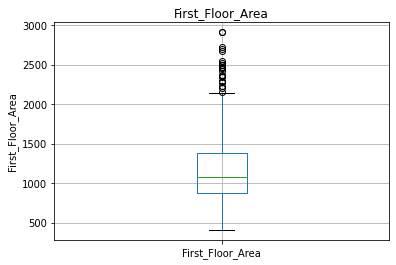

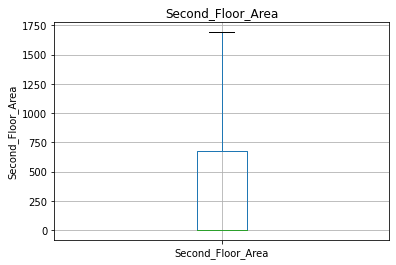

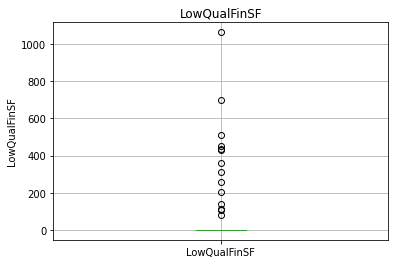

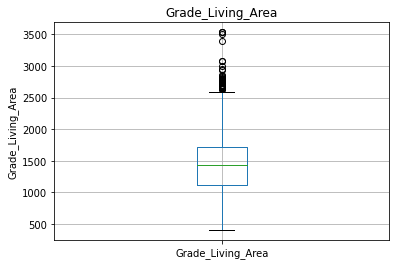

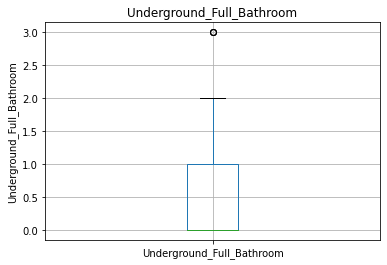

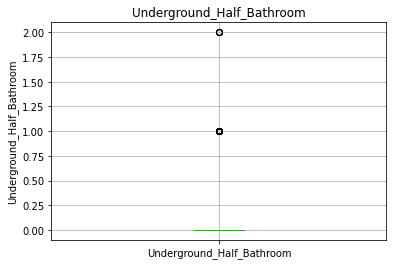

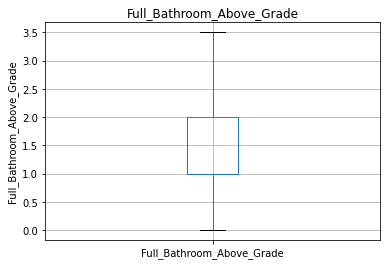

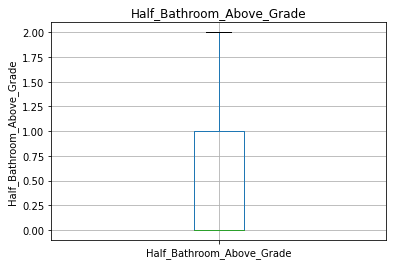

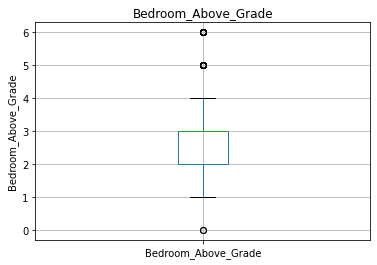

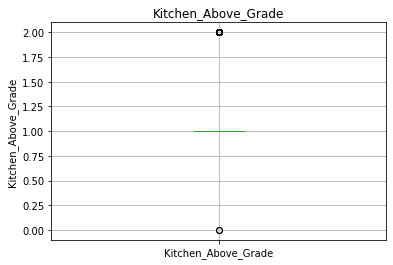

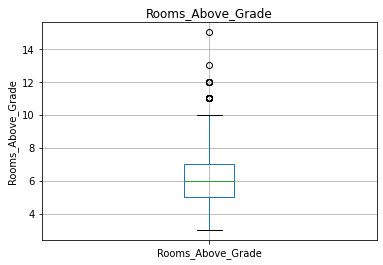

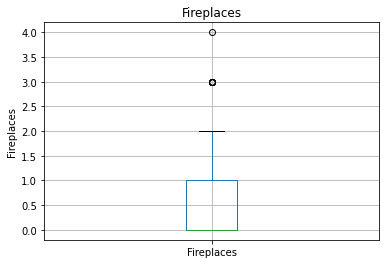

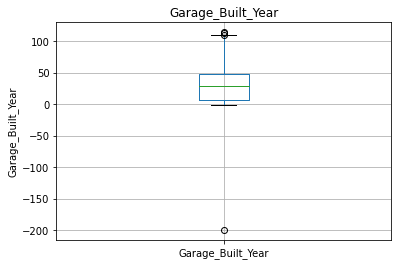

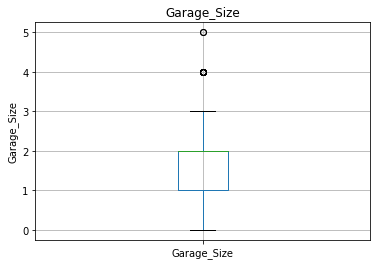

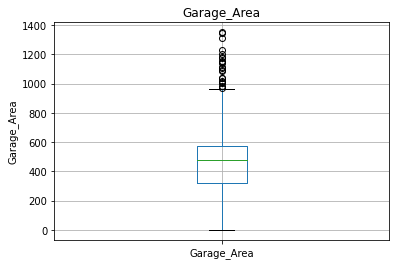

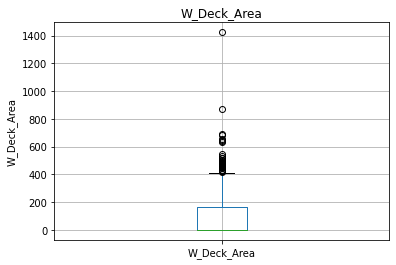

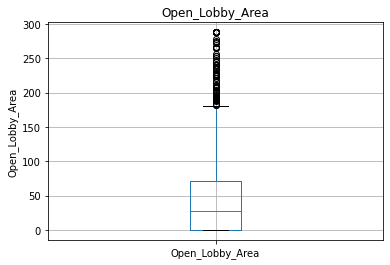

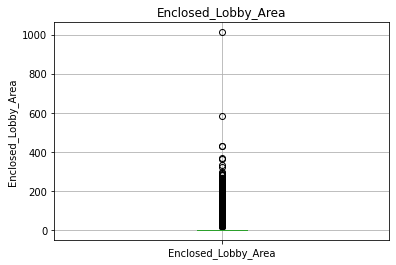

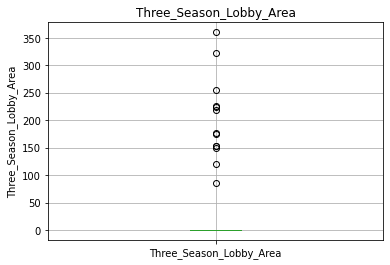

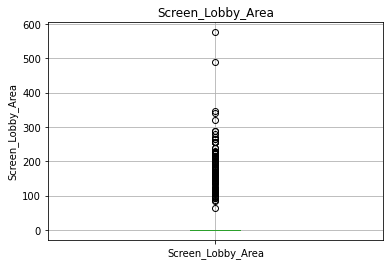

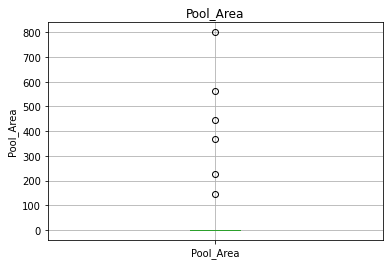

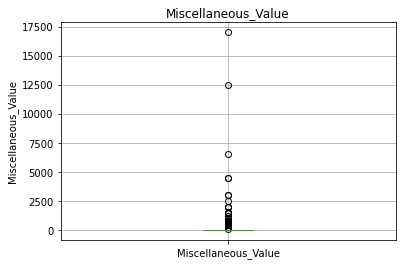

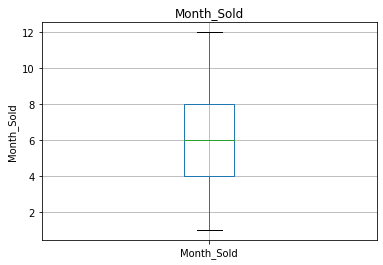

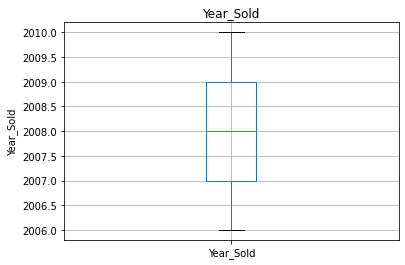

In [154]:
for feature1 in numerical_features1:
    data=d_ts.copy()       
    data.boxplot(column=feature1)
    plt.ylabel(feature1)
    plt.title(feature1)
    plt.show()

Lot_Extent
0.30498082418259326


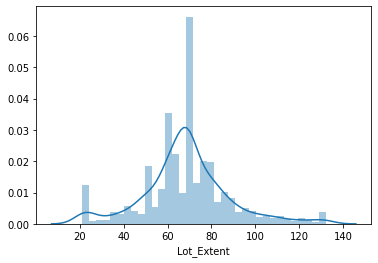

Lot_Size
0.051087972920661515


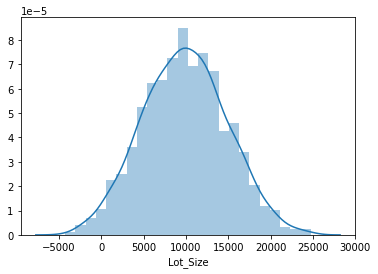

Brick_Veneer_Area
1.8217309467241853


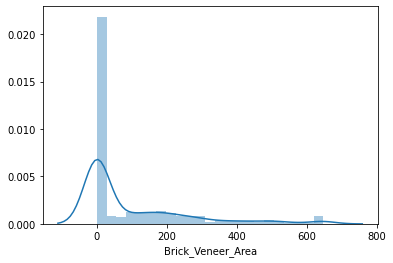

BsmtFinSF1
0.9914466931151434


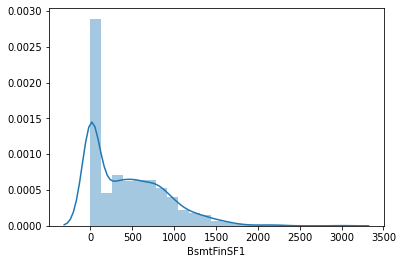

BsmtFinSF2
3.876978959805596


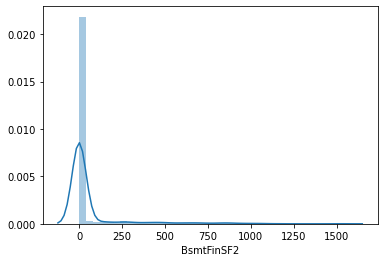

BsmtUnfSF
0.908484219630617


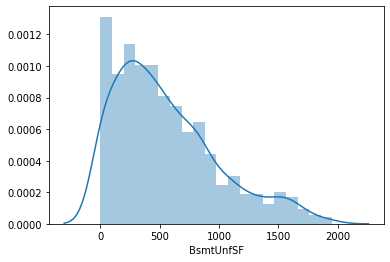

Total_Basement_Area
0.37087888706656297


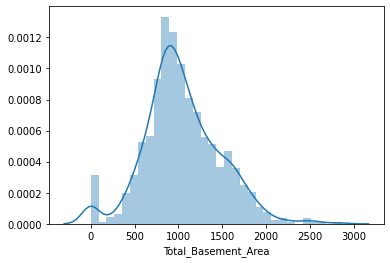

First_Floor_Area
0.9151850295896979


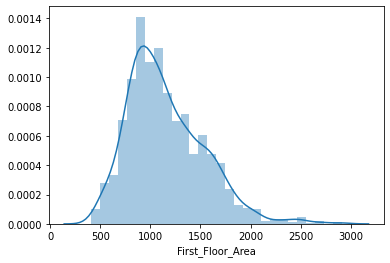

Second_Floor_Area
0.8922292161853349


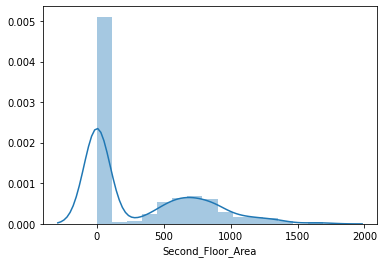

Grade_Living_Area
0.9130892112621019


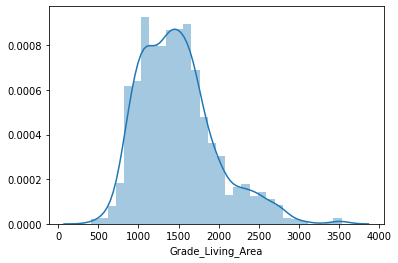

Garage_Area
0.2779790467630085


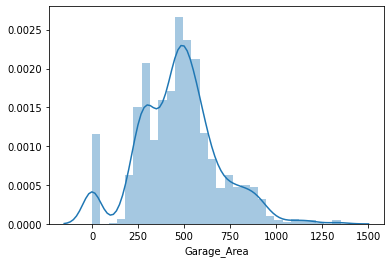

W_Deck_Area
2.1285686872921303


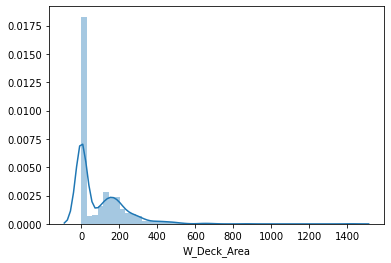

Open_Lobby_Area
1.7060700364073935


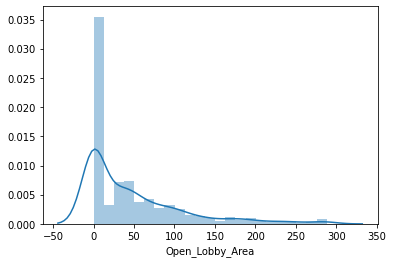

Enclosed_Lobby_Area
4.664370555374258


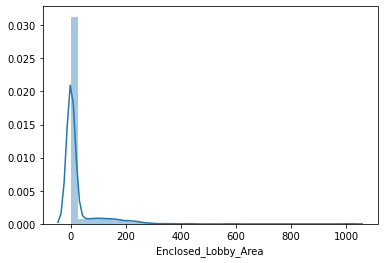

Screen_Lobby_Area
3.7843485688767533


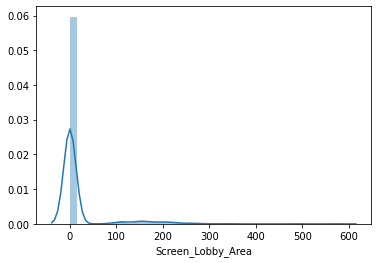

Miscellaneous_Value
20.05454312673225


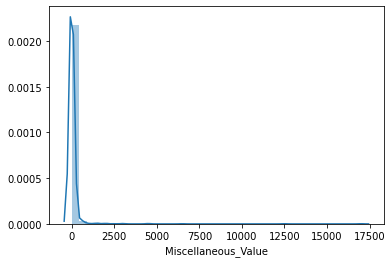

In [155]:
for feature1 in continuous_feature1:
    data=d_ts.copy()      
    print(feature1)
    print(skew(data[feature1]))
    plt.figure()
    sns.distplot(data[feature1])
    plt.show()

In [156]:
d_ts["Brick_Veneer_Area"]=np.sqrt(d_ts["Brick_Veneer_Area"])
d_ts["BsmtFinSF2"]=np.sqrt(d_ts["BsmtFinSF2"])
d_ts["W_Deck_Area"]=np.sqrt(d_ts["W_Deck_Area"])
d_ts["Open_Lobby_Area"]=np.sqrt(d_ts["Open_Lobby_Area"])
d_ts["Enclosed_Lobby_Area"]=np.sqrt(d_ts["Enclosed_Lobby_Area"])
d_ts["Screen_Lobby_Area"]=np.sqrt(d_ts["Screen_Lobby_Area"])
d_ts["Miscellaneous_Value"]=np.sqrt(d_ts["Miscellaneous_Value"])

Lot_Extent
0.30498082418259326


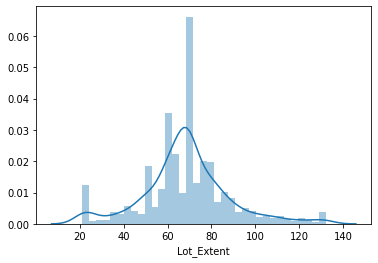

Lot_Size
0.051087972920661515


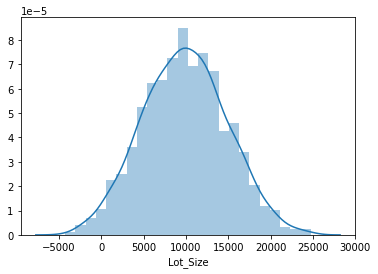

Brick_Veneer_Area
0.9399855510356233


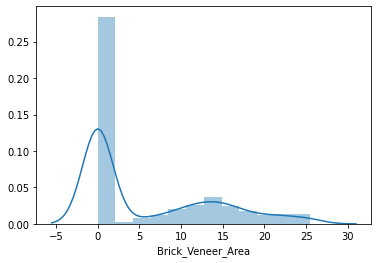

BsmtFinSF1
0.9914466931151434


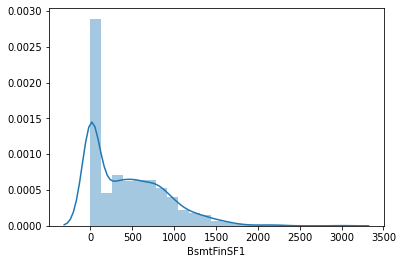

BsmtFinSF2
2.863620500236798


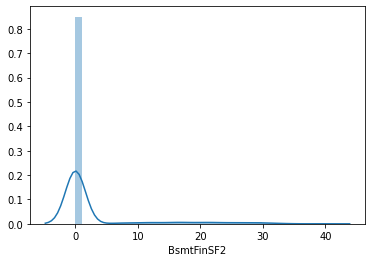

BsmtUnfSF
0.908484219630617


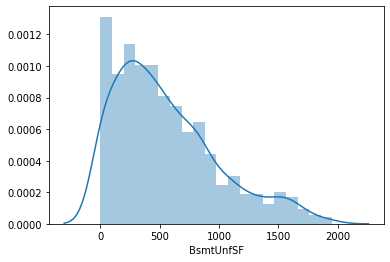

Total_Basement_Area
0.37087888706656297


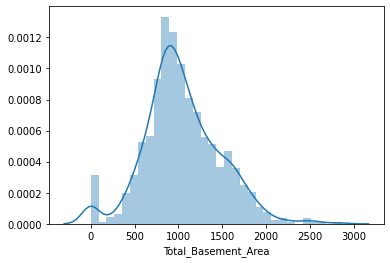

First_Floor_Area
0.9151850295896979


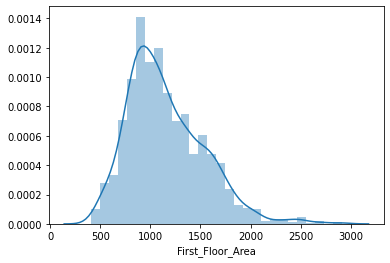

Second_Floor_Area
0.8922292161853349


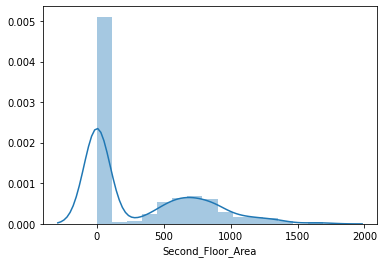

Grade_Living_Area
0.9130892112621019


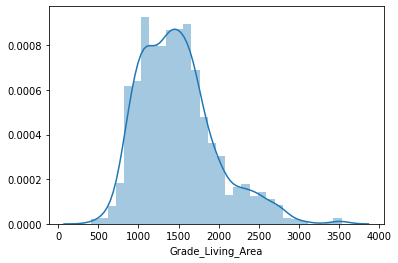

Garage_Area
0.2779790467630085


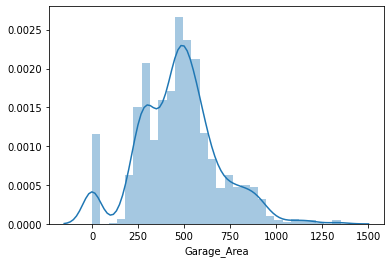

W_Deck_Area
0.5285867006914843


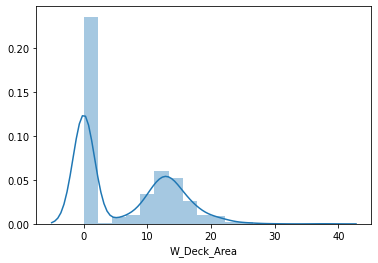

Open_Lobby_Area
0.4886433977465398


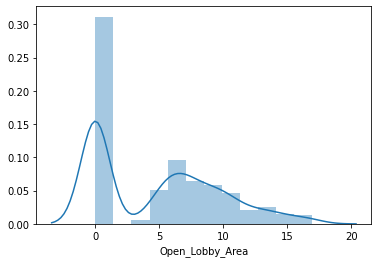

Enclosed_Lobby_Area
2.235721051898161


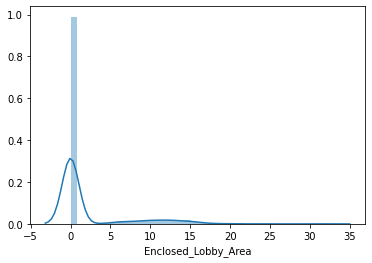

Screen_Lobby_Area
2.9386355540301277


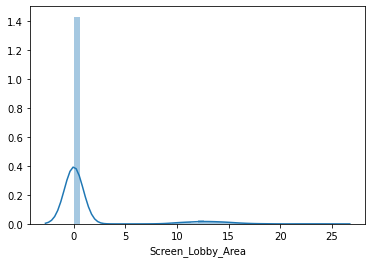

Miscellaneous_Value
9.408631053684426


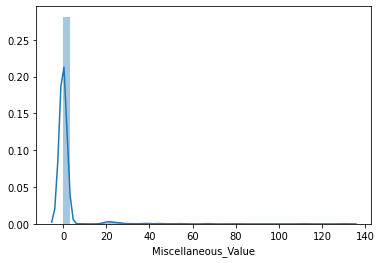

In [157]:
for feature1 in continuous_feature1:
    data=d_ts.copy()      
    print(feature1)
    print(skew(data[feature1]))
    plt.figure()
    sns.distplot(data[feature1])
    plt.show()

In [158]:
scaling_feature=[feature for feature in d_tr.columns if feature not in ['Id','Sale_Price'] ]
len(scaling_feature)

75

In [159]:
feature_scale=[feature for feature in d_tr.columns if feature not in ['Id','Sale_Price']]

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(d_tr[feature_scale])

StandardScaler()

# building a model using feature selection

In [160]:
d_tr.head()

Building_Class  Zoning_Class  Lot_Extent  Lot_Size  Road_Type  \
0              60             3        65.0      8450          1   
1              20             3        80.0      9600          1   
2              60             3        68.0     11250          1   
3              70             3        60.0      9550          1   
4              60             3        84.0     14260          1   

   Property_Shape  Land_Outline  Utility_Type  Lot_Configuration  \
0               3             3             0                  4   
1               3             3             0                  2   
2               0             3             0                  4   
3               0             3             0                  0   
4               0             3             0                  2   

   Property_Slope  Neighborhood  Condition1  Condition2  House_Type  \
0               0             5           2           2           0   
1               0            24           1           2           0   
2               0             5           2           2           0   
3               0             6           2           2           0   
4               0            15           2           2           0   

   House_Design  Overall_Material  House_Condition  Construction_Year  \
0             5                 7                5                  5   
1             2                 6                8                 31   
2             5                 7                5                  7   
3             5                 7                5                 91   
4             5                 8                5                  8   

   Remodel_Year  Roof_Design  Roof_Quality  Exterior1st  Exterior2nd  \
0             5            1             4           12           13   
1            31            1             4            8            8   
2             6            1             4           12           13   
3            36            1             4           13           15   
4             8            1             4           12           13   

   Brick_Veneer_Type  Brick_Veneer_Area  Exterior_Material  \
0                  1          14.000000                  2   
1                  2           0.000000                  3   
2                  1          12.727922                  2   
3                  2           0.000000                  3   
4                  1          18.708287                  2   

   Exterior_Condition  Foundation_Type  Basement_Height  Basement_Condition  \
0                   4                2                2                   3   
1                   4                1                2                   3   
2                   4                2                2                   3   
3                   4                0                3                   1   
4                   4                2                2                   3   

   Exposure_Level  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0               3             2         706             5         0.0   
1               1             0         978             5         0.0   
2               2             2         486             5         0.0   
3               3             0         216             5         0.0   
4               0             2         655             5         0.0   

   BsmtUnfSF  Total_Basement_Area  Heating_Type  Heating_Quality  \
0      150.0                856.0             1                0   
1      284.0               1262.0             1                0   
2      434.0                920.0             1                0   
3      540.0                756.0             1                2   
4      490.0               1145.0             1                0   

   Air_Conditioning  Electrical_System  First_Floor_Area  Second_Floor_Area  \
0                 1                  4             856.0                854   
1                 1             

In [161]:
data_x=d_tr.iloc[:,0:-1]


In [162]:
data_y=d_tr.iloc[:,-1]


In [163]:
import sklearn
from sklearn.model_selection import train_test_split

In [164]:
data_xtrain,data_xtest,data_ytrain,data_ytest=train_test_split(data_x,data_y,test_size=0.3,random_state=101) # 80/20 pattern
data_xtrain.shape,data_xtest.shape,data_ytrain.shape,data_ytest.shape

((1021, 75), (438, 75), (1021,), (438,))

In [220]:
data_ytest

array([359.16569992, 411.703777  , 293.25756597, 398.74804075,
       387.16921365, 397.49213829, 493.96356141, 423.32020977,
       435.83253665, 381.11678   , 372.82703765, 428.95221179,
       558.1218505 , 402.49223595, 359.16569992, 353.55339059,
       489.89794856, 504.97524692, 338.3843968 , 367.42346142,
       324.03703492, 642.26162893, 444.40972087, 456.61800227,
       229.12878475, 331.51168909, 342.05262753, 393.7003937 ,
       327.87192622, 356.37059362, 428.95221179, 364.69165058,
       493.96356141, 421.90046219, 367.42346142, 357.7708764 ,
       606.0478529 , 394.96835316, 634.71332111, 472.75786614,
       419.40433951, 457.05579528, 476.13023428, 364.00549446,
       435.88989435, 391.79076048, 323.88269481, 356.37059362,
       368.72754169, 194.67922334, 352.13633723, 389.87177379,
       387.29833462, 364.69165058, 415.67415123, 282.84271247,
       305.77769703, 407.43097575, 417.13307229, 379.47331922,
       417.13307229, 396.23225512, 327.87192622, 521.53

In [165]:
from sklearn.linear_model import Lasso
l=Lasso()

In [166]:
l.fit(data_xtrain,data_ytrain)

Lasso()

In [167]:
pred=l.predict(data_xtest)
pred

array([455.35330151, 401.59552309, 292.23549234, 403.23167786,
       404.53714221, 435.87082066, 555.51430262, 429.72526   ,
       395.50952861, 389.0791039 , 368.6534658 , 444.76210373,
       475.16913354, 398.40410064, 327.19933366, 325.51642059,
       501.6070559 , 515.95478038, 347.95837054, 356.94414051,
       342.64649311, 623.40123348, 428.3388076 , 459.51980306,
       282.59439507, 299.17494495, 361.40809899, 418.18592839,
       353.33216527, 346.56525387, 466.99419881, 359.01010016,
       514.1454492 , 458.09613081, 369.15663443, 352.31771855,
       572.88189271, 393.72714992, 612.95968985, 468.25701294,
       423.55596273, 436.69789099, 457.43806292, 358.03997899,
       469.87024878, 431.74146064, 340.40394006, 344.2156504 ,
       371.63397967, 246.1991605 , 358.21605121, 384.36925583,
       355.22558728, 366.22299607, 423.94141007, 274.65773615,
       331.33852478, 356.71796546, 428.33025422, 387.13942875,
       431.21839515, 406.45878923, 308.2008681 , 527.46

In [168]:
data_frame=pd.DataFrame({"Importance":list(l.coef_),"columns":list(data_x)})
data_frame

Importance                    columns
0    -0.088861             Building_Class
1    -0.000000               Zoning_Class
2     0.043892                 Lot_Extent
3     0.001627                   Lot_Size
4     0.000000                  Road_Type
5    -0.577584             Property_Shape
6    -0.000000               Land_Outline
7    -0.000000               Utility_Type
8     0.000000          Lot_Configuration
9     0.000000             Property_Slope
10    0.071456               Neighborhood
11   -0.000000                 Condition1
12   -0.000000                 Condition2
13   -0.000000                 House_Type
14    0.000000               House_Design
15   13.450799           Overall_Material
16    7.437904            House_Condition
17   -0.458511          Construction_Year
18   -0.117051               Remodel_Year
19   -0.000000                Roof_Design
20    0.000000               Roof_Quality
21    0.000000                Exterior1st
22    0.045986                Exterior2nd
23    2.727298          Brick_Veneer_Type
24    0.209385          Brick_Veneer_Area
25   -2.455808          Exterior_Material
26    0.000000         Exterior_Condition
27    0.000000            Foundation_Type
28   -4.856534            Basement_Height
29    0.000000         Basement_Condition
30   -1.141121             Exposure_Level
31   -0.000000               BsmtFinType1
32   -0.025687                 BsmtFinSF1
33    0.000000               BsmtFinType2
34   -0.934194                 BsmtFinSF2
35   -0.050351                  BsmtUnfSF
36    0.076093        Total_Basement_Area
37   -0.000000               Heating_Type
38   -1.642662            Heating_Quality
39    0.000000           Air_Conditioning
40    0.000000          Electrical_System
41   -0.275182           First_Floor_Area
42   -0.265490          Second_Floor_Area
43   -0.313828               LowQualFinSF
44    0.331037          Grade_Living_Area
45    0.000000  Underground_Full_Bathroom
46   -0.000000  Underground_Half_Bathroom
47   -0.000000  Full_Bathroom_Above_Grade
48    0.000000  Half_Bathroom_Above_Grade
49   -1.684812        Bedroom_Above_Grade
50   -0.000000        Kitchen_Above_Grade
51   -5.191755            Kitchen_Quality
52   -0.019170          Rooms_Above_Grade
53    2.022167            Functional_Rate
54    2.914823                 Fireplaces
55   -1.759516          Fireplace_Quality
56    0.044938                     Garage
57   -0.045626          Garage_Built_Year
58   -0.000000         Garage_Finish_Year
59    6.404315                Garage_Size
60   -0.001563                Garage_Area
61    0.000000             Garage_Quality
62    0.000000           Garage_Condition
63    0.000000               Pavedd_Drive
64   -0.003743                W_Deck_Area
65    0.020837            Open_Lobby_Area
66    0.017657        Enclosed_Lobby_Area
67    0.020547    Three_Season_Lobby_Area
68    0.428124          Screen_Lobby_Area
69    0.039937                  Pool_Area
70   -0.001441        Miscellaneous_Value
71    0.125276                 Month_Sold
72   -0.000000                  Year_Sold
73   -0.000000                  Sale_Type
74    3.839460             Sale_Condition

In [169]:
new=d_tr[["Building_Class","Lot_Extent","Lot_Size","Property_Shape","Neighborhood","Overall_Material","House_Condition","Construction_Year","Remodel_Year","Exterior2nd","Brick_Veneer_Type","Brick_Veneer_Area","Exterior_Material","Basement_Height","Exposure_Level","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","Total_Basement_Area","Heating_Quality","First_Floor_Area","Second_Floor_Area","LowQualFinSF","Grade_Living_Area","Bedroom_Above_Grade","Kitchen_Quality","Rooms_Above_Grade","Functional_Rate","Fireplaces","Fireplace_Quality","Garage","Garage_Built_Year","Garage_Size","Garage_Area","W_Deck_Area","Open_Lobby_Area","Enclosed_Lobby_Area","Three_Season_Lobby_Area","Screen_Lobby_Area","Pool_Area","Miscellaneous_Value","Month_Sold","Sale_Condition"]]
new.shape

(1459, 43)

In [170]:
ynew=d_tr["Sale_Price"]
ynew

0       456.618002
1       426.028168
2       472.757866
3       374.165739
4       500.000000
5       378.153408
6       554.075807
7       447.213595
8       360.416426
9       343.511281
10      359.861084
11      587.367006
12      379.473319
13      528.677596
14      396.232255
15      363.318042
16      386.005181
17      300.000000
18      398.748041
19      372.827038
20      570.350769
21      373.363094
22      479.583152
23      360.416426
24      392.428337
25      506.260802
26      367.151195
27      553.172667
28      455.521679
29      261.725047
30      200.000000
31      386.458277
32      424.146201
33      406.816912
34      526.782688
35      555.877684
36      380.788655
37      391.152144
38      330.151480
39      286.356421
40      400.000000
41      412.310563
42      379.473319
43      360.901649
44      375.499667
45      565.597030
46      489.577369
47      499.699910
48      336.154726
49      356.370594
50      420.713679
51      338.378486
52      331.

In [171]:
data_xtrain,data_xtest,data_ytrain,data_ytest=train_test_split(new,ynew,test_size=0.2,random_state=101) # 80/20 pattern
data_xtrain.shape,data_xtest.shape,data_ytrain.shape,data_ytest.shape

((1167, 43), (292, 43), (1167,), (292,))

In [172]:
from sklearn import linear_model 
lm=linear_model.LinearRegression()

In [173]:
lm.fit(data_xtrain, data_ytrain)

LinearRegression()

In [174]:
pr=lm.predict(data_xtest)    # prediction for lungcap[y]   it is a target variable 
pr

array([454.31881219, 398.02809714, 289.00353577, 397.63846162,
       407.5119295 , 429.7057188 , 560.46785874, 431.11512094,
       397.28342402, 381.63290855, 368.28250513, 441.69574634,
       480.54867982, 399.95049566, 326.24767939, 320.85256374,
       498.3343482 , 514.94569391, 344.7122831 , 355.94210651,
       341.1468169 , 631.38964249, 427.70969843, 455.51598179,
       279.54896694, 305.82610889, 363.73188652, 415.15668227,
       343.01673307, 348.71850972, 469.41923291, 360.17897256,
       518.2586233 , 464.34476423, 367.59889247, 354.53366944,
       581.62157187, 397.80678435, 618.32334616, 467.70944767,
       422.87838858, 442.6967309 , 453.42913129, 357.41214901,
       470.31010675, 430.43041202, 338.23157244, 333.96651695,
       381.97809048, 245.49303273, 362.00645242, 381.5027713 ,
       346.2893169 , 362.99212208, 419.72160709, 278.66877152,
       326.7574405 , 352.31863863, 427.86652808, 389.54601814,
       430.15949584, 407.4019976 , 308.96482487, 527.13

In [175]:
lm.coef_

array([-1.05445357e-01,  3.63440455e-02,  1.53300112e-03, -8.02771909e-01,
        1.23038711e-01,  1.22626569e+01,  8.51182103e+00, -4.52554857e-01,
       -5.37507031e-02, -1.80561866e-01,  3.63948953e+00,  2.37349084e-01,
       -4.49451113e+00, -6.43844835e+00, -2.09131268e+00, -3.83653258e-02,
       -1.22727974e+00, -6.18928525e-02,  8.86957052e-02, -1.70548869e+00,
       -3.04233026e-01, -2.92169302e-01, -3.37846807e-01,  3.59898997e-01,
       -3.50252990e+00, -5.17561290e+00, -5.49403483e-01,  2.57423117e+00,
        6.10457370e+00, -2.41172662e+00,  1.29333282e-01, -2.84018925e-02,
        8.86970748e+00,  1.27029269e-03, -3.91896096e-03,  2.06069184e-02,
        1.75884261e-02,  1.94966297e-02,  4.01711257e-01,  4.30317336e-02,
       -1.34167607e-03,  2.01465628e-01,  3.97016739e+00])

In [176]:
lm.intercept_

178.73396742638766

In [177]:
rsquare=lm.score(data_xtrain,data_ytrain)
rsquare

0.9187310620693939

In [178]:
adjR2=1-(((1-rsquare)*(1167-1))/(1167-43-1))
adjR2

0.9156192505546868

In [179]:
from sklearn import metrics

In [180]:
MSE=metrics.mean_squared_error(data_ytest,pr)  # it tells overall error in data 
MSE  

1011.7413879922864

In [181]:
RMSE=np.sqrt(MSE)
RMSE

31.807882482056023

In [182]:
error=data_ytest - pr
error

666     -95.153112
104      13.675680
528       4.254030
18        1.109579
1151    -20.342716
60      -32.213581
70      -66.504297
284      -7.794911
860      38.549113
327      -0.516129
786       4.544533
191     -12.743535
218      77.573171
1276      2.541740
713      32.918021
1215     32.700827
621      -8.436400
1054     -9.970447
596      -6.327886
622      11.481355
1384    -17.109782
161      10.871986
1141     16.700022
0         1.102020
1337    -50.420182
90       25.685580
1202    -21.679259
482     -21.456289
1292    -15.144807
194       7.652084
1224    -40.467021
1406      4.512678
1250    -24.295062
534     -42.444302
899      -0.175431
835       3.237207
1228     24.426281
360      -2.838431
515      16.389975
2         5.048418
781      -3.474049
1317     14.359064
501      22.701103
1331      6.593345
109     -34.420212
81      -38.639652
1185    -14.348878
1096     22.404077
569     -13.250549
968     -50.813809
956      -9.870115
862       8.369002
942      41.

In [183]:
abs_error=np.abs(error)
abs_error

666      95.153112
104      13.675680
528       4.254030
18        1.109579
1151     20.342716
60       32.213581
70       66.504297
284       7.794911
860      38.549113
327       0.516129
786       4.544533
191      12.743535
218      77.573171
1276      2.541740
713      32.918021
1215     32.700827
621       8.436400
1054      9.970447
596       6.327886
622      11.481355
1384     17.109782
161      10.871986
1141     16.700022
0         1.102020
1337     50.420182
90       25.685580
1202     21.679259
482      21.456289
1292     15.144807
194       7.652084
1224     40.467021
1406      4.512678
1250     24.295062
534      42.444302
899       0.175431
835       3.237207
1228     24.426281
360       2.838431
515      16.389975
2         5.048418
781       3.474049
1317     14.359064
501      22.701103
1331      6.593345
109      34.420212
81       38.639652
1185     14.348878
1096     22.404077
569      13.250549
968      50.813809
956       9.870115
862       8.369002
942      41.

In [184]:
MAPE=np.mean(abs_error/data_ytest)*100
MAPE

4.790440540739385

In [185]:
def RMSLE1(pred,act):
    total  = 0.0
    for i in range(len(act)):
        pre_val = np.log(pred[i]+1)
        act_val = np.log(act[i]+1)
        total = total + (act_val - pre_val)**2
        global tot_log_err
        tot_log_err = np.sqrt(total/(len(pred)))

In [186]:
data_ytest=np.array(data_ytest)
data_ytest

array([359.16569992, 411.703777  , 293.25756597, 398.74804075,
       387.16921365, 397.49213829, 493.96356141, 423.32020977,
       435.83253665, 381.11678   , 372.82703765, 428.95221179,
       558.1218505 , 402.49223595, 359.16569992, 353.55339059,
       489.89794856, 504.97524692, 338.3843968 , 367.42346142,
       324.03703492, 642.26162893, 444.40972087, 456.61800227,
       229.12878475, 331.51168909, 342.05262753, 393.7003937 ,
       327.87192622, 356.37059362, 428.95221179, 364.69165058,
       493.96356141, 421.90046219, 367.42346142, 357.7708764 ,
       606.0478529 , 394.96835316, 634.71332111, 472.75786614,
       419.40433951, 457.05579528, 476.13023428, 364.00549446,
       435.88989435, 391.79076048, 323.88269481, 356.37059362,
       368.72754169, 194.67922334, 352.13633723, 389.87177379,
       387.29833462, 364.69165058, 415.67415123, 282.84271247,
       305.77769703, 407.43097575, 417.13307229, 379.47331922,
       417.13307229, 396.23225512, 327.87192622, 521.53

In [187]:
RMSLE1(pr,data_ytest)
tot_log_err

0.07230108582503868

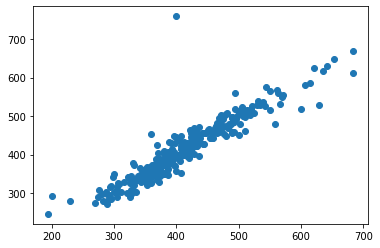

In [188]:
plt.scatter(data_ytest,pr)

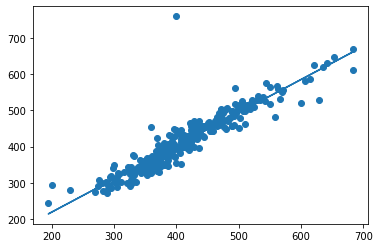

In [189]:
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(data_ytest, pr)

def myfunc(data_ytest):
    return slope * data_ytest + intercept

mymodel = list(map(myfunc, data_ytest))

plt.scatter(data_ytest, pr)
plt.plot(data_ytest, mymodel)
plt.show()

# RF Regressor

In [190]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [191]:
rf.fit(data_xtrain, data_ytrain)

RandomForestRegressor()

In [192]:
pr=rf.predict(data_xtest)    # prediction for lungcap[y]   it is a target variable 
pr

array([446.75054053, 419.8815928 , 291.99672088, 390.30907683,
       402.33602517, 399.23433215, 556.2193097 , 424.06601316,
       407.58857718, 388.14549834, 374.77173365, 425.71119445,
       457.46542567, 398.1865367 , 347.92866921, 344.6842015 ,
       449.43578646, 506.63059786, 354.18151875, 367.27518757,
       330.71700826, 618.81950985, 401.72927033, 448.60490779,
       287.88395154, 312.39474628, 357.05970549, 447.26257211,
       356.9036085 , 348.05409771, 446.90604604, 364.92559293,
       525.92460458, 465.96113629, 367.81330941, 359.74979662,
       596.18935621, 376.51430481, 610.83187126, 451.8014642 ,
       419.26290126, 441.15697918, 457.18593195, 366.14043199,
       431.7070738 , 413.84597271, 337.68227252, 349.98066744,
       370.81175318, 272.41658146, 353.62530136, 378.71856073,
       378.71068219, 410.05995109, 420.6906588 , 294.46326372,
       349.27039928, 365.74989579, 413.35258   , 391.45791374,
       421.13070602, 378.70400421, 327.34663722, 454.48

In [193]:
rsquare1t=rf.score(data_xtest,data_ytest)
rsquare1t

0.8589203795611865

In [194]:
rsquare=rf.score(data_xtrain,data_ytrain)
rsquare

0.9836723012057585

In [196]:
adjR2t=1-(((1-rsquare1t)*(1167-1))/(1167-45-1))
adjR2t

0.8532570584909398

In [197]:
adjR2=1-(((1-rsquare)*(1167-1))/(1167-45-1))
adjR2

0.9830168628063465

In [200]:
MSE=metrics.mean_squared_error(data_ytest,pr)  # it tells overall error in data 
MSE  

929.1880357969161

In [201]:
RMSE=np.sqrt(MSE)
RMSE

30.48258577937436

In [202]:
error=data_ytest - pr
error

array([-8.75848406e+01, -8.17781580e+00,  1.26084510e+00,  8.43896391e+00,
       -1.51668115e+01, -1.74219386e+00, -6.22557483e+01, -7.45803390e-01,
        2.82439595e+01, -7.02871834e+00, -1.94469601e+00,  3.24101734e+00,
        1.00656425e+02,  4.30569925e+00,  1.12370307e+01,  8.86918909e+00,
        4.04621621e+01, -1.65535094e+00, -1.57971219e+01,  1.48273843e-01,
       -6.67997334e+00,  2.34421191e+01,  4.26804505e+01,  8.01309449e+00,
       -5.87551668e+01,  1.91169428e+01, -1.50070780e+01, -5.35621784e+01,
       -2.90316823e+01,  8.31649591e+00, -1.79538342e+01, -2.33942354e-01,
       -3.19610432e+01, -4.40606741e+01, -3.89847990e-01, -1.97892022e+00,
        9.85849669e+00,  1.84540484e+01,  2.38814499e+01,  2.09564019e+01,
        1.41438247e-01,  1.58988161e+01,  1.89443023e+01, -2.13493752e+00,
        4.18282056e+00, -2.20552122e+01, -1.37995777e+01,  6.38992619e+00,
       -2.08421149e+00, -7.77373581e+01, -1.48896412e+00,  1.11532131e+01,
        8.58765243e+00, -

In [203]:
abs_error=np.abs(error)
abs_error

array([8.75848406e+01, 8.17781580e+00, 1.26084510e+00, 8.43896391e+00,
       1.51668115e+01, 1.74219386e+00, 6.22557483e+01, 7.45803390e-01,
       2.82439595e+01, 7.02871834e+00, 1.94469601e+00, 3.24101734e+00,
       1.00656425e+02, 4.30569925e+00, 1.12370307e+01, 8.86918909e+00,
       4.04621621e+01, 1.65535094e+00, 1.57971219e+01, 1.48273843e-01,
       6.67997334e+00, 2.34421191e+01, 4.26804505e+01, 8.01309449e+00,
       5.87551668e+01, 1.91169428e+01, 1.50070780e+01, 5.35621784e+01,
       2.90316823e+01, 8.31649591e+00, 1.79538342e+01, 2.33942354e-01,
       3.19610432e+01, 4.40606741e+01, 3.89847990e-01, 1.97892022e+00,
       9.85849669e+00, 1.84540484e+01, 2.38814499e+01, 2.09564019e+01,
       1.41438247e-01, 1.58988161e+01, 1.89443023e+01, 2.13493752e+00,
       4.18282056e+00, 2.20552122e+01, 1.37995777e+01, 6.38992619e+00,
       2.08421149e+00, 7.77373581e+01, 1.48896412e+00, 1.11532131e+01,
       8.58765243e+00, 4.53683005e+01, 5.01650757e+00, 1.16205512e+01,
      

In [204]:
MAPE=np.mean(abs_error/data_ytest)*100
MAPE

5.1330249207267835

In [205]:
accuracy=100-MAPE

In [206]:
accuracy

94.86697507927322

In [207]:
def RMSLE1(pred,act):
    total  = 0.0
    for i in range(len(act)):
        pre_val = np.log(pred[i]+1)
        act_val = np.log(act[i]+1)
        total = total + (act_val - pre_val)**2
        global tot_log_err
        tot_log_err = np.sqrt(total/(len(pred)))

In [208]:
data_ytest=np.array(data_ytest)
data_ytest

array([359.16569992, 411.703777  , 293.25756597, 398.74804075,
       387.16921365, 397.49213829, 493.96356141, 423.32020977,
       435.83253665, 381.11678   , 372.82703765, 428.95221179,
       558.1218505 , 402.49223595, 359.16569992, 353.55339059,
       489.89794856, 504.97524692, 338.3843968 , 367.42346142,
       324.03703492, 642.26162893, 444.40972087, 456.61800227,
       229.12878475, 331.51168909, 342.05262753, 393.7003937 ,
       327.87192622, 356.37059362, 428.95221179, 364.69165058,
       493.96356141, 421.90046219, 367.42346142, 357.7708764 ,
       606.0478529 , 394.96835316, 634.71332111, 472.75786614,
       419.40433951, 457.05579528, 476.13023428, 364.00549446,
       435.88989435, 391.79076048, 323.88269481, 356.37059362,
       368.72754169, 194.67922334, 352.13633723, 389.87177379,
       387.29833462, 364.69165058, 415.67415123, 282.84271247,
       305.77769703, 407.43097575, 417.13307229, 379.47331922,
       417.13307229, 396.23225512, 327.87192622, 521.53

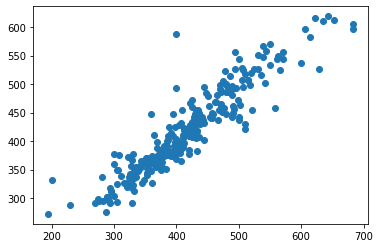

In [209]:
plt.scatter(data_ytest,pr)

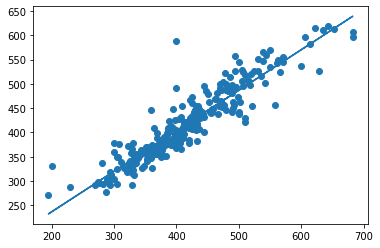

In [210]:
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(data_ytest, pr)

def myfunc(data_ytest):
    return slope * data_ytest + intercept

mymodel = list(map(myfunc, data_ytest))

plt.scatter(data_ytest, pr)
plt.plot(data_ytest, mymodel)
plt.show()

# Cross validation


In [211]:
x=np.array(d_tr[["Building_Class","Lot_Extent","Lot_Size","Property_Shape","Neighborhood","Overall_Material","House_Condition","Construction_Year","Remodel_Year","Exterior2nd","Brick_Veneer_Type","Brick_Veneer_Area","Exterior_Material","Basement_Height","Exposure_Level","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","Total_Basement_Area","Heating_Quality","First_Floor_Area","Second_Floor_Area","LowQualFinSF","Grade_Living_Area","Bedroom_Above_Grade","Kitchen_Quality","Rooms_Above_Grade","Functional_Rate","Fireplaces","Fireplace_Quality","Garage","Garage_Built_Year","Garage_Size","Garage_Area","W_Deck_Area","Open_Lobby_Area","Enclosed_Lobby_Area","Three_Season_Lobby_Area","Screen_Lobby_Area","Pool_Area","Miscellaneous_Value","Month_Sold","Sale_Condition"]])
x.shape

(1459, 43)

In [212]:
y=np.array(d_tr["Sale_Price"])
y.shape

(1459,)

In [213]:
import sklearn
from sklearn.model_selection import train_test_split

In [214]:
data_xtrain,data_xtest,data_ytrain,data_ytest=train_test_split(x,y,test_size=0.3,random_state=101) # 80/20 pattern
data_xtrain.shape,data_xtest.shape,data_ytrain.shape,data_ytest.shape

((1021, 43), (438, 43), (1021,), (438,))

In [215]:
from sklearn import linear_model 
lm=linear_model.LinearRegression()

In [216]:
from sklearn.model_selection import KFold
k=KFold()

In [217]:
model=lm.fit(data_xtrain, data_ytrain)

In [218]:
import sklearn
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,data_xtrain,data_ytrain,scoring="r2",cv=10)
score

array([0.85352543, 0.90762475, 0.89815877, 0.83826377, 0.92663705,
       0.93460516, 0.92455797, 0.90792011, 0.92553445, 0.8688543 ])

In [219]:
print(np.mean(score))

0.8985681752067564
